In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

700it [00:01, 655.73it/s]
100%|██████████| 700/700 [00:08<00:00, 86.92it/s]
8400it [00:00, 225102.57it/s]
7920it [00:00, 216651.04it/s]
720it [00:01, 719.71it/s]
100%|██████████| 720/720 [00:08<00:00, 82.70it/s]
8280it [00:00, 232191.20it/s]
720it [00:01, 693.30it/s]
100%|██████████| 720/720 [00:08<00:00, 81.81it/s]
8280it [00:00, 222143.71it/s]
700it [00:00, 758.38it/s]
100%|██████████| 700/700 [00:08<00:00, 94.78it/s]
8280it [00:00, 233046.60it/s]
509it [00:00, 1073.52it/s]
100%|██████████| 509/509 [00:03<00:00, 189.59it/s]
3664it [00:00, 227430.44it/s]
700it [00:00, 749.60it/s]
100%|██████████| 700/700 [00:07<00:00, 87.59it/s]
8280it [00:00, 62542.70it/s]
700it [00:00, 741.56it/s]
100%|██████████| 700/700 [00:07<00:00, 87.54it/s]
8280it [00:00, 195188.07it/s]
710it [00:02, 264.51it/s]
100%|██████████| 710/710 [00:08<00:00, 84.78it/s]
8280it [00:00, 222482.41it/s]
710it [00:04, 146.19it/s]
100%|██████████| 710/710 [00:08<00:00, 84.60it/s]
8280it [00:00, 214523.85it/s]
710it [00:00, 7

In [8]:
len(data_train), len(data_val), len(data_test)

(8400, 7920, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [7]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [8]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [9]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [10]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.16772


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.067716
Epoch 1...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.09084


100%|██████████| 248/248 [00:20<00:00, 12.39it/s]


Mean val loss: 0.054628


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.087809


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.05673
EarlyStopping counter: 1 out of 5
Epoch 3...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.085862


100%|██████████| 248/248 [00:20<00:00, 12.36it/s]


Mean val loss: 0.051024


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.084325


100%|██████████| 248/248 [00:20<00:00, 12.38it/s]


Mean val loss: 0.036989


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.082453


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.041593
EarlyStopping counter: 1 out of 5
Epoch 6...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.081525


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.037805
EarlyStopping counter: 2 out of 5
Epoch 7...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.080441


100%|██████████| 248/248 [00:19<00:00, 15.21it/s]


Mean val loss: 0.034021


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.080231


100%|██████████| 248/248 [00:19<00:00, 12.40it/s]


Mean val loss: 0.033089


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.079889


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.035374
EarlyStopping counter: 1 out of 5
Epoch 10...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.078609


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.039575
EarlyStopping counter: 2 out of 5
Epoch 11...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.078652


100%|██████████| 248/248 [00:20<00:00, 12.39it/s]


Mean val loss: 0.031172


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 12...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.078357


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.039266
EarlyStopping counter: 1 out of 5
Epoch 13...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.078184


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.040869
EarlyStopping counter: 2 out of 5
Epoch 14...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.077505


100%|██████████| 248/248 [00:19<00:00, 12.61it/s]


Mean val loss: 0.028367


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 15...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.078828


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.031402
EarlyStopping counter: 1 out of 5
Epoch 16...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0772


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.039749
EarlyStopping counter: 2 out of 5
Epoch 17...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.077736


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.033382
EarlyStopping counter: 3 out of 5
Epoch 18...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.078753


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.026881


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 19...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.077464
Epoch    19: reducing learning rate of group 0 to 7.5000e-05.


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.026435


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 20...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.077038


100%|██████████| 248/248 [00:19<00:00, 12.62it/s]


Mean val loss: 0.025664


  0%|          | 0/263 [00:00<?, ?it/s]

Epoch 21...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.076582


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.032262
EarlyStopping counter: 1 out of 5
Epoch 22...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.076262


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.02977
EarlyStopping counter: 2 out of 5
Epoch 23...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.076712


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.032852
EarlyStopping counter: 3 out of 5
Epoch 24...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.076883


  0%|          | 0/263 [00:00<?, ?it/s]

Mean val loss: 0.041899
EarlyStopping counter: 4 out of 5
Epoch 25...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0763
Epoch    25: reducing learning rate of group 0 to 5.6250e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.041825
EarlyStopping counter: 5 out of 5


100%|██████████| 259/259 [02:44<00:00,  1.78it/s]


## Dump experiment results

In [15]:
import pickle
import json

In [16]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [27]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [16]:
model_conf

{'device': 'cpu', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [11]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [17]:
from itertools import chain

In [18]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

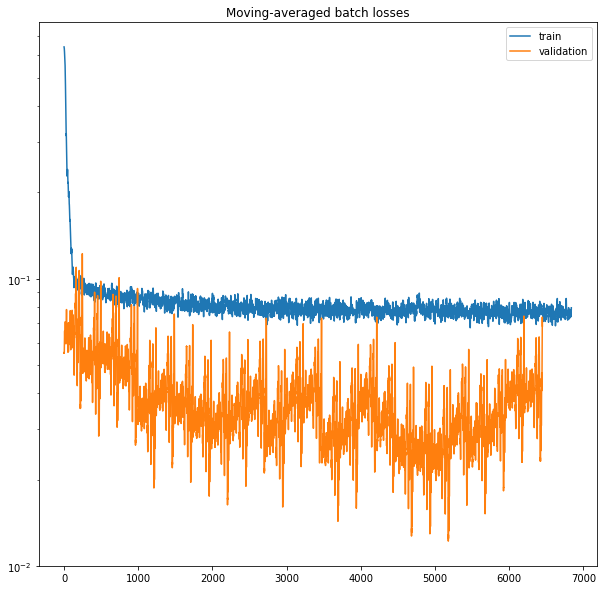

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [21]:
mean_train_loss = [np.mean(item) for item in results['val_losses']]
mean_val_loss = [np.mean(item) for item in results['train_losses']]

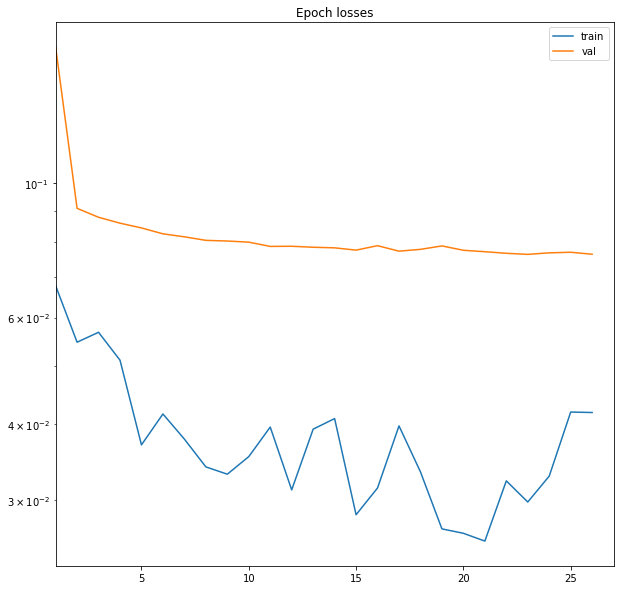

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [23]:
import os

In [24]:
import torch

In [25]:
from visualization_utils import output_to_binary, plot_sample

In [26]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

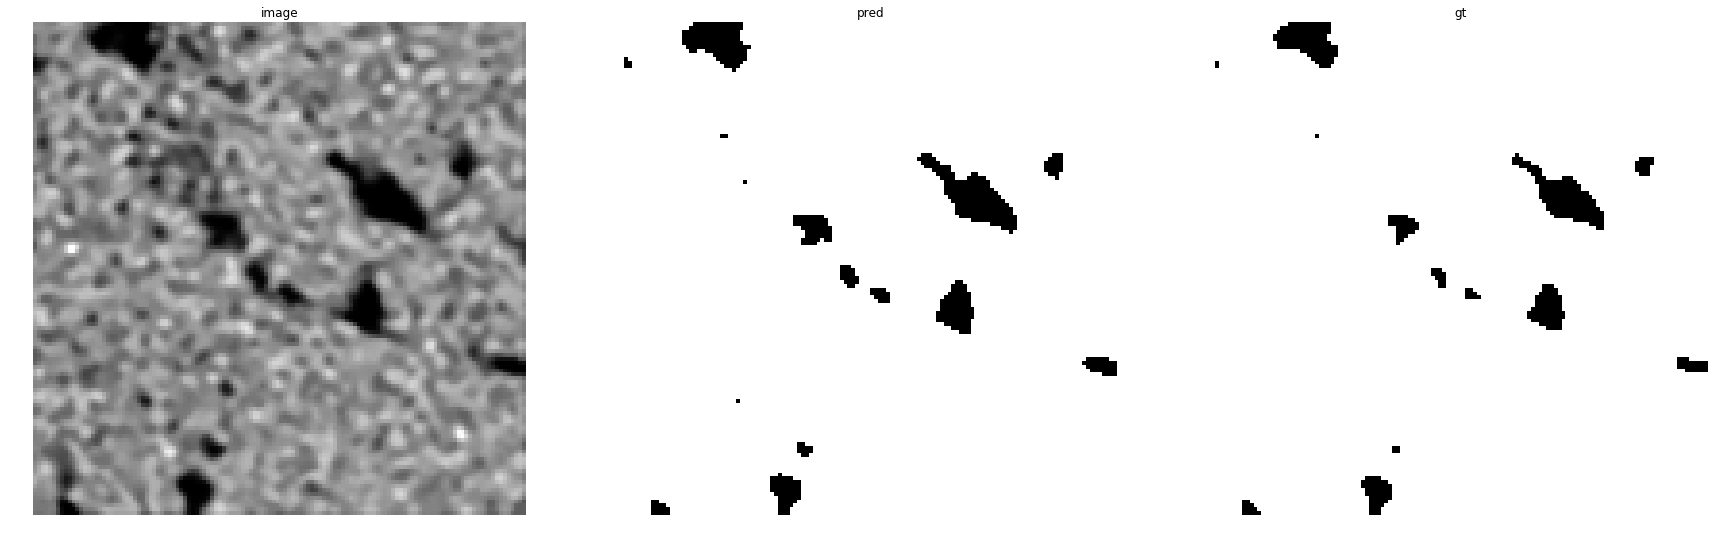

accuracy    : 0.9915771484375
precision   : 1.0
recall      : 0.9912812736921911
f1          : 0.9956215495907101
pr_auc      : 0.9999962207535033
iou         : 0.9912812736921911


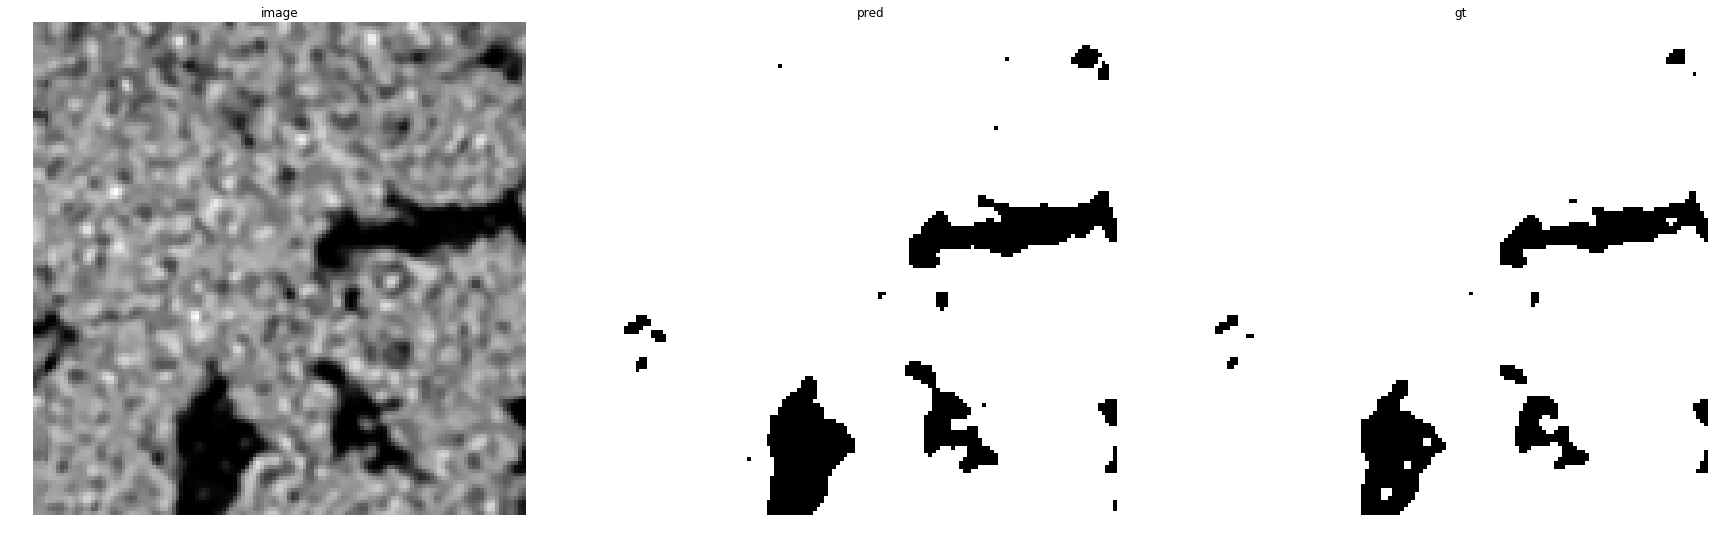

accuracy    : 0.9830322265625
precision   : 1.0
recall      : 0.9817621203175227
f1          : 0.9907971398305084
pr_auc      : 0.9999850554586583
iou         : 0.9817621203175227


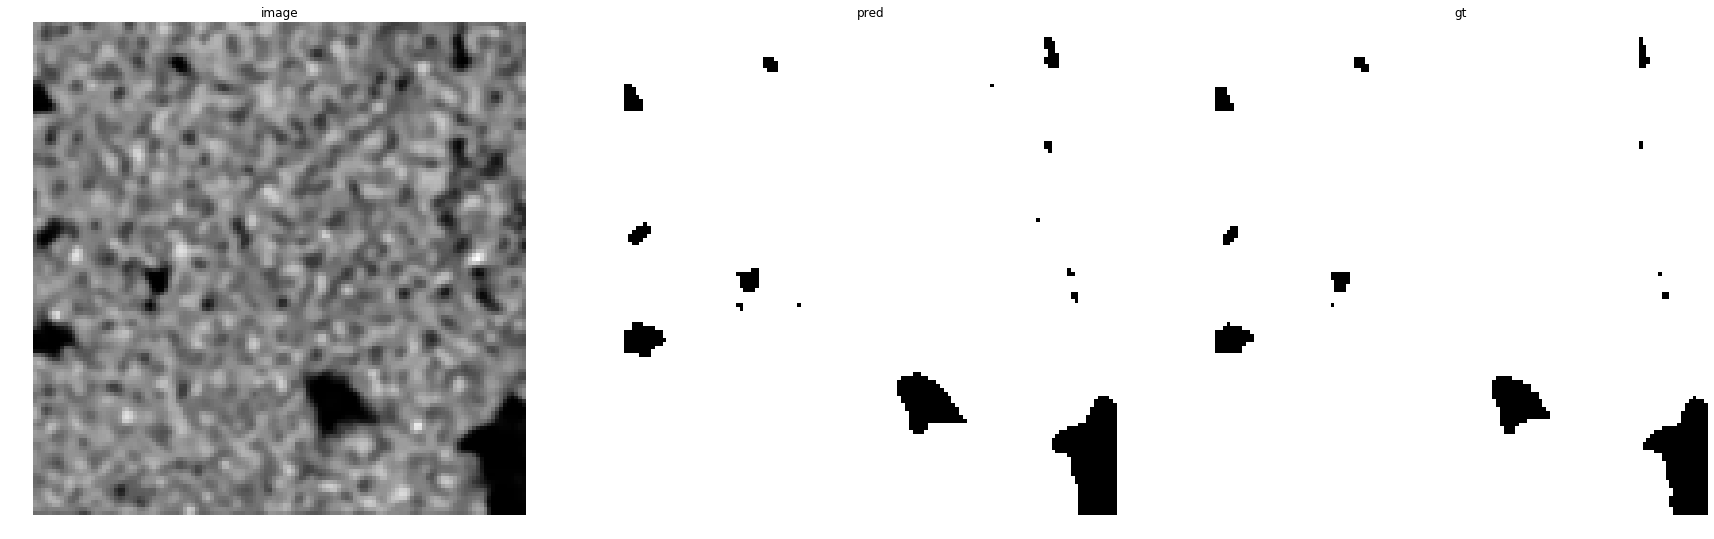

accuracy    : 0.99395751953125
precision   : 1.0
recall      : 0.9937266332932007
f1          : 0.9968534469058894
pr_auc      : 0.9999987600107534
iou         : 0.9937266332932007


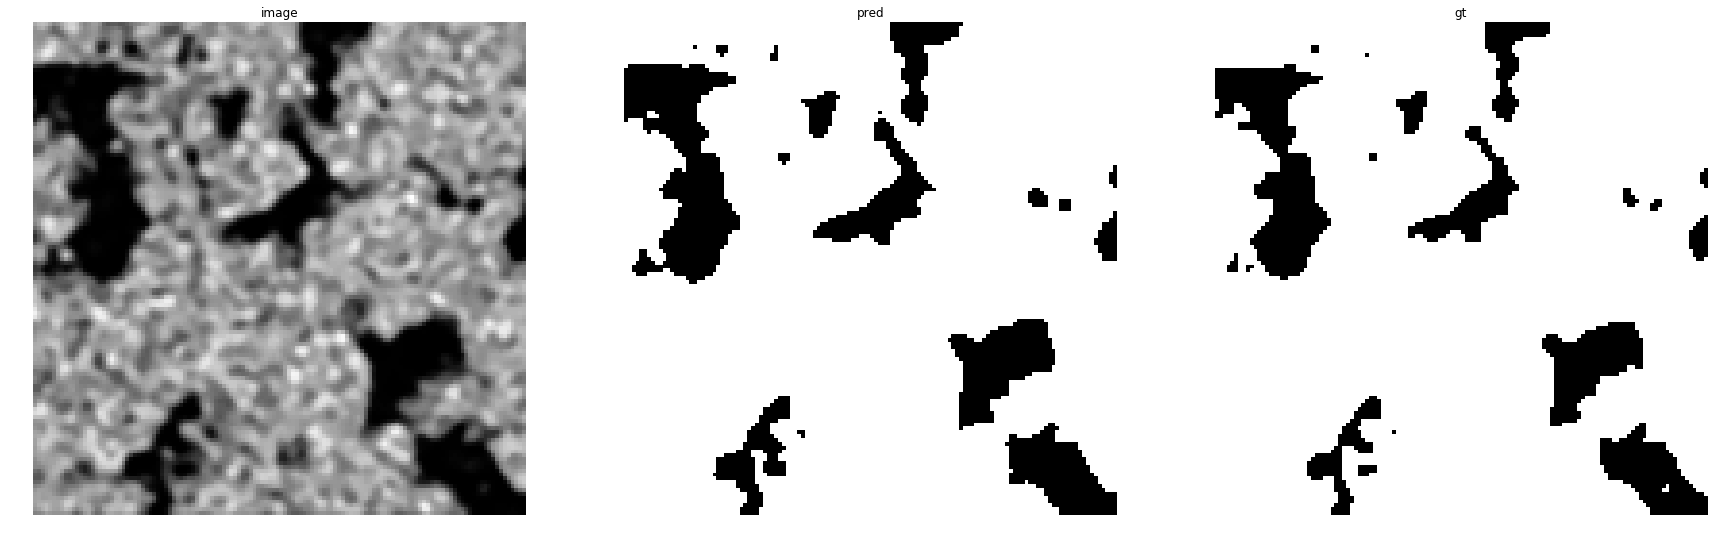

accuracy    : 0.97540283203125
precision   : 1.0
recall      : 0.9714001845149386
f1          : 0.9854926383239138
pr_auc      : 0.9999532378881064
iou         : 0.9714001845149386


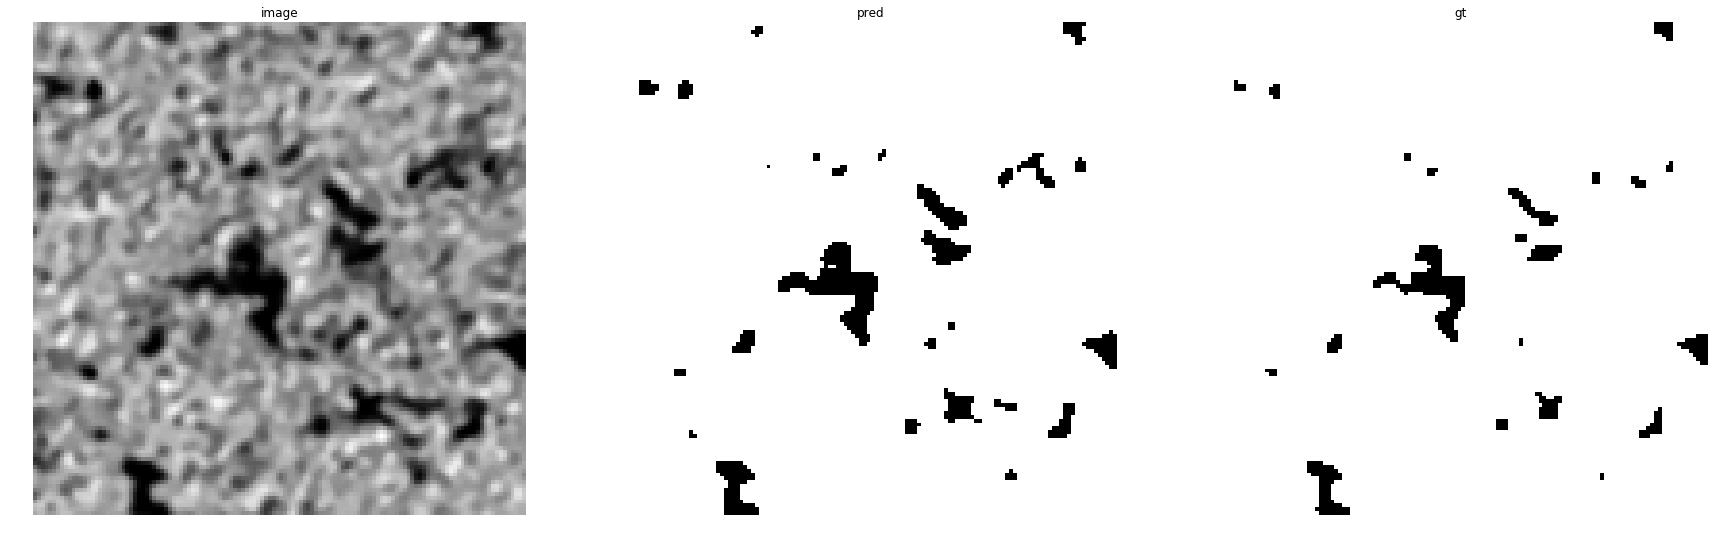

accuracy    : 0.98260498046875
precision   : 1.0
recall      : 0.9820223301583296
f1          : 0.9909296330479614
pr_auc      : 0.9999903126253633
iou         : 0.9820223301583296


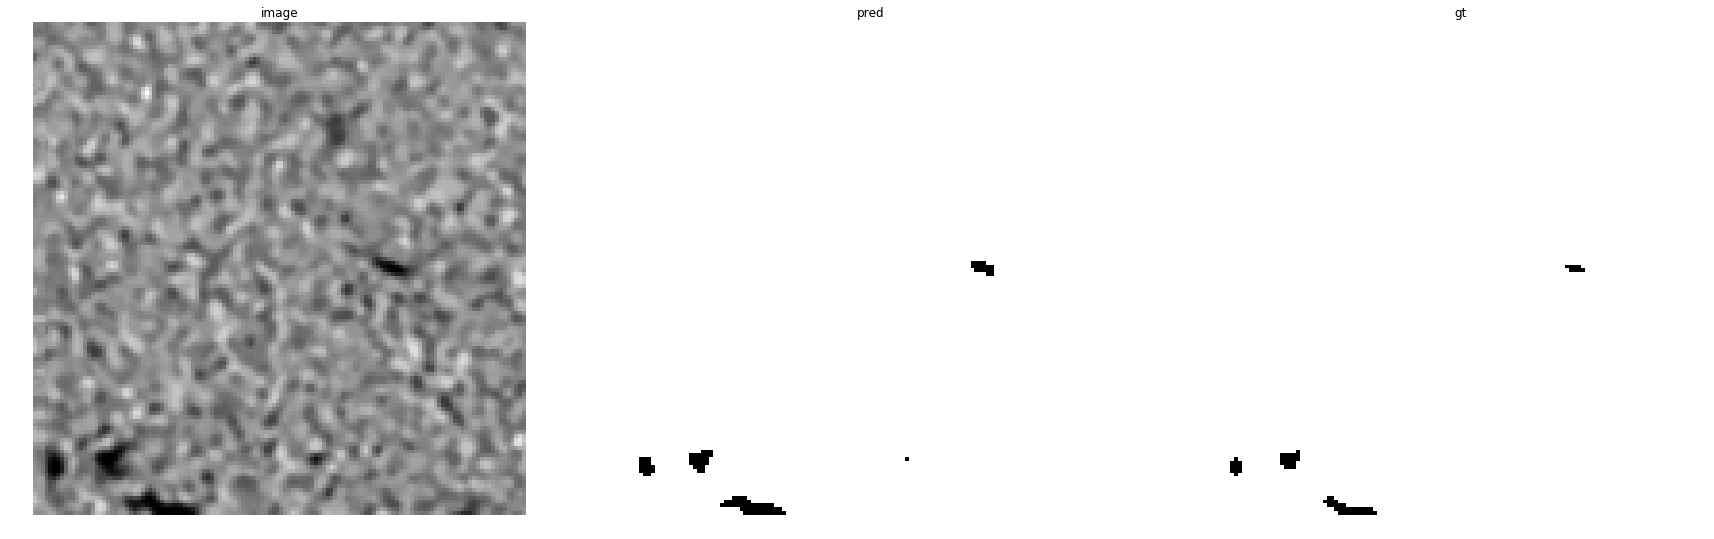

accuracy    : 0.99774169921875
precision   : 1.0
recall      : 0.9977322873253248
f1          : 0.998864856573094
pr_auc      : 0.9999999323943457
iou         : 0.9977322873253248


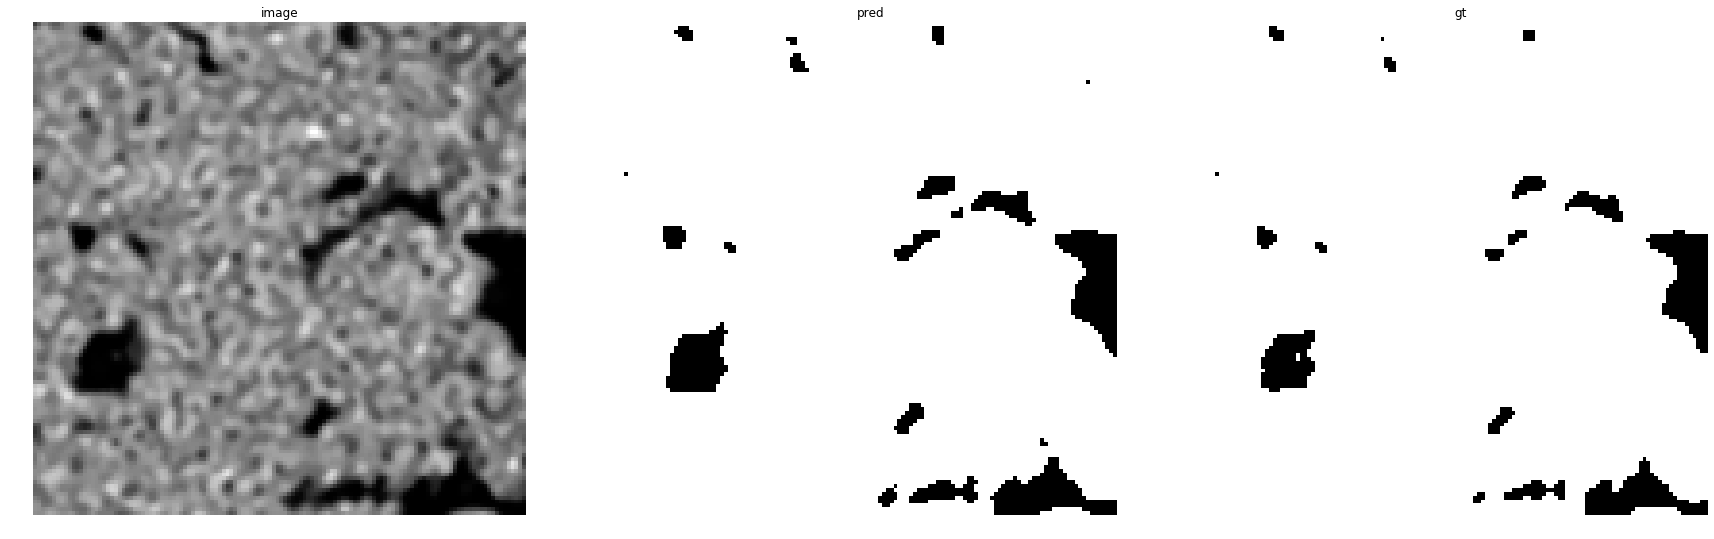

accuracy    : 0.98748779296875
precision   : 1.0
recall      : 0.9867227979274611
f1          : 0.9933170334148329
pr_auc      : 0.9999904028427283
iou         : 0.9867227979274611


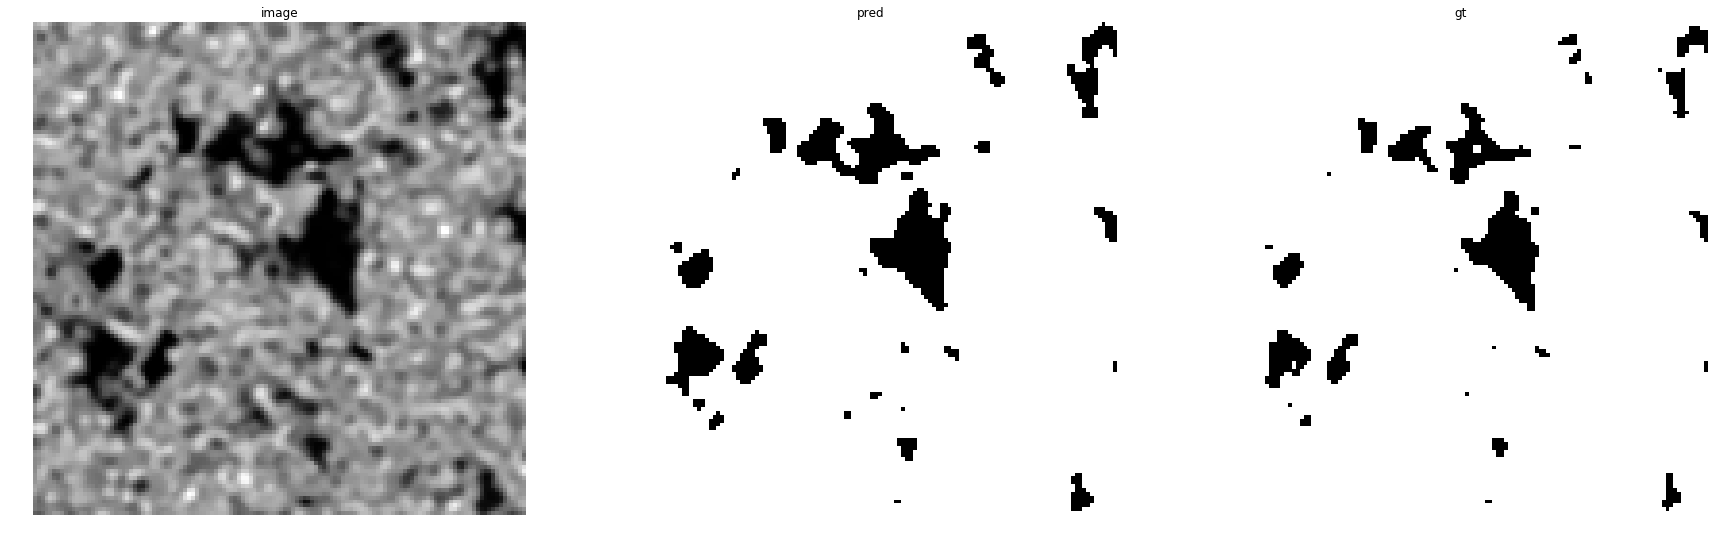

accuracy    : 0.97900390625
precision   : 1.0
recall      : 0.9776869689304015
f1          : 0.9887176123319121
pr_auc      : 0.9999744818993468
iou         : 0.9776869689304015


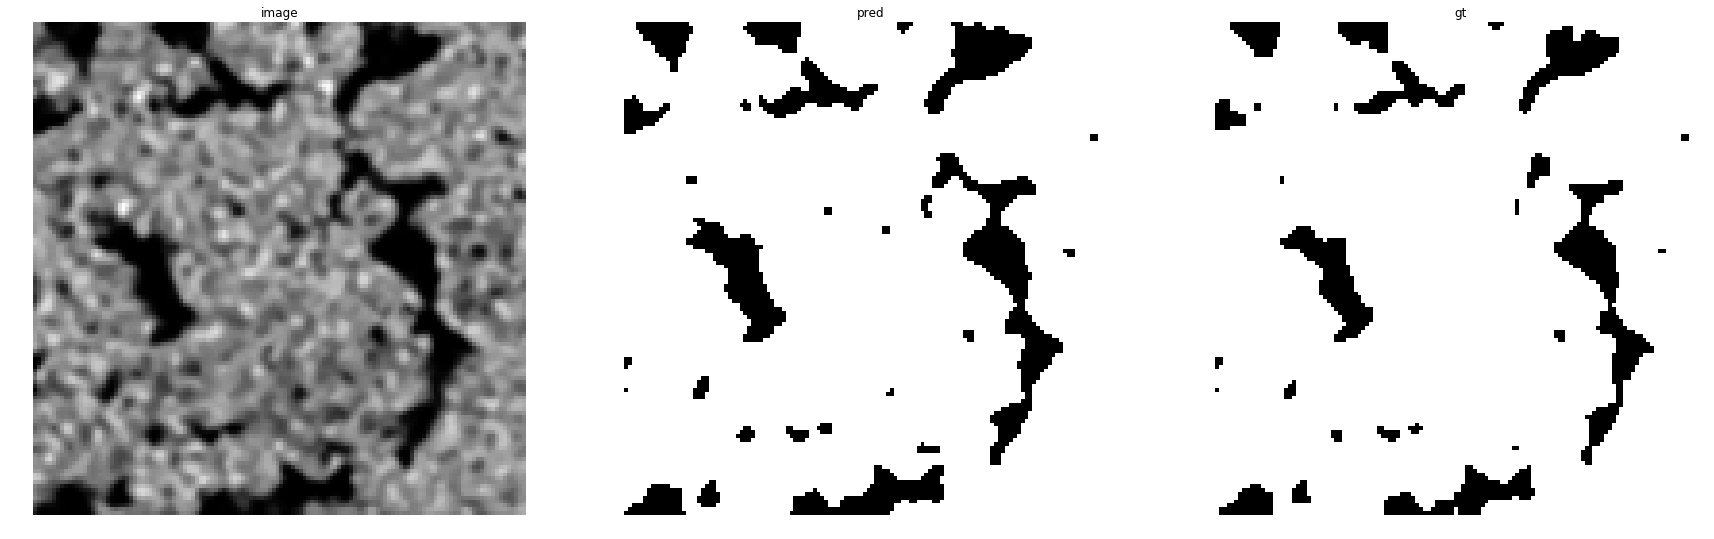

accuracy    : 0.97442626953125
precision   : 1.0
recall      : 0.9713758710206313
f1          : 0.9854801261392383
pr_auc      : 0.999954652087543
iou         : 0.9713758710206313


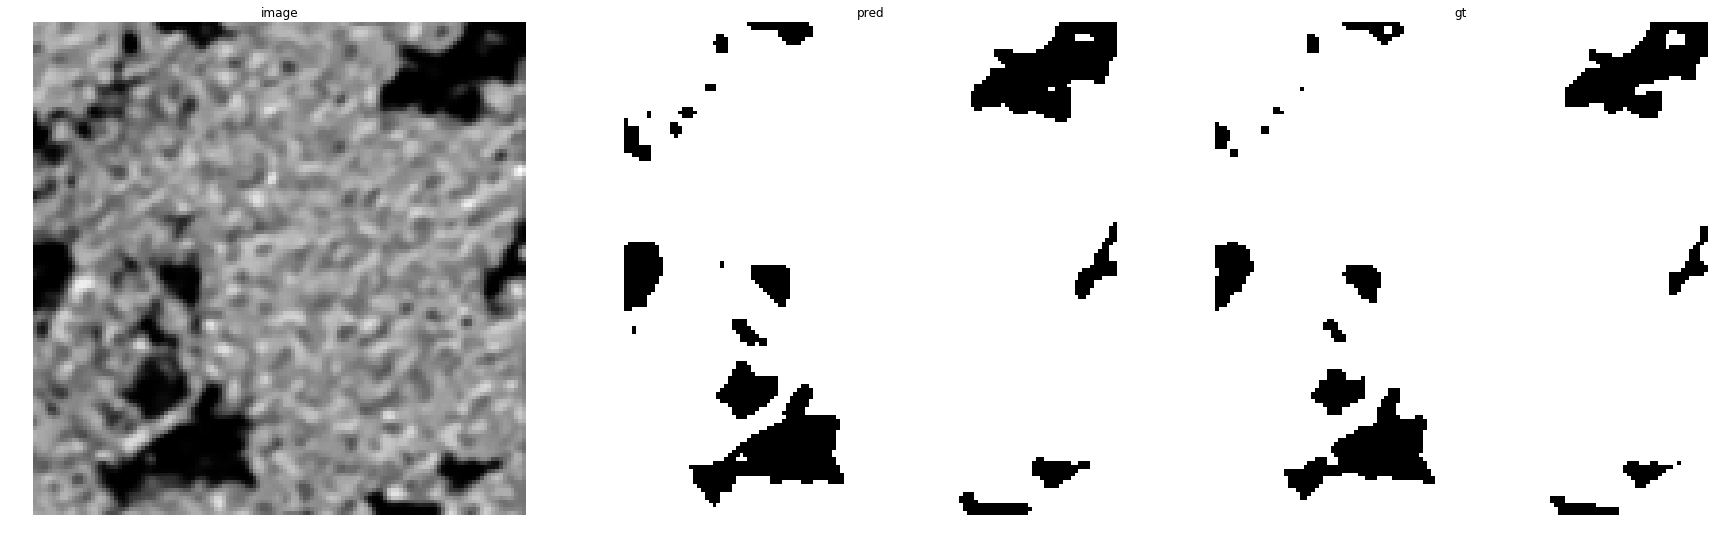

accuracy    : 0.97955322265625
precision   : 1.0
recall      : 0.9774623250807319
f1          : 0.988602728540809
pr_auc      : 0.9999763866063237
iou         : 0.9774623250807319


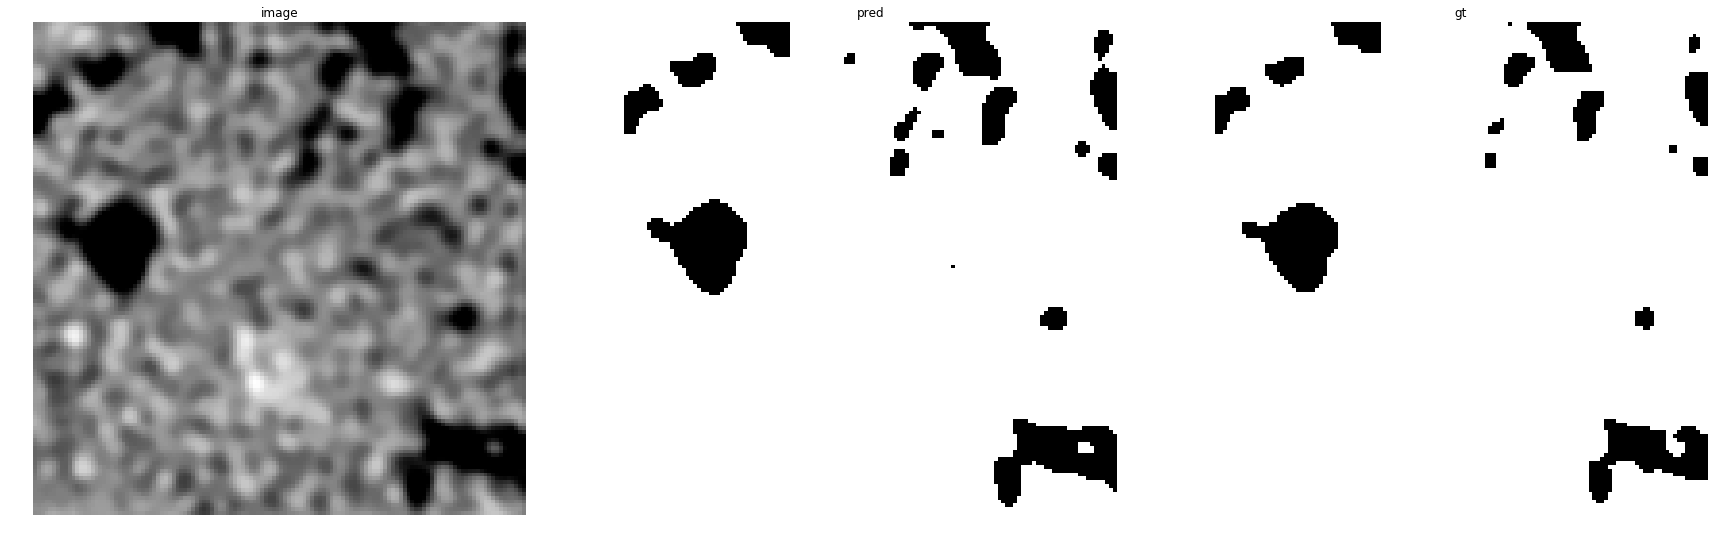

accuracy    : 0.9818115234375
precision   : 1.0
recall      : 0.9802452767649984
f1          : 0.9900241028387787
pr_auc      : 0.9999556549098805
iou         : 0.9802452767649984


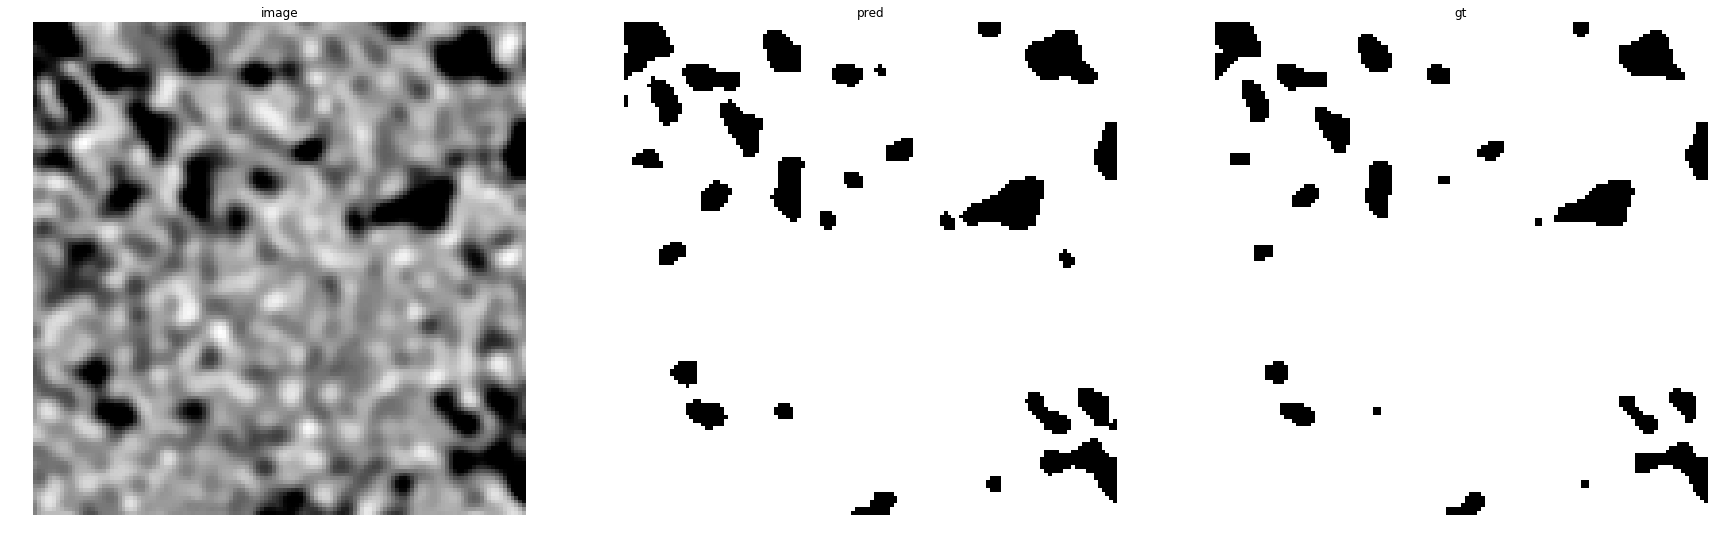

accuracy    : 0.975341796875
precision   : 1.0
recall      : 0.9732237539766702
f1          : 0.9864302028751847
pr_auc      : 0.9999464484132035
iou         : 0.9732237539766702


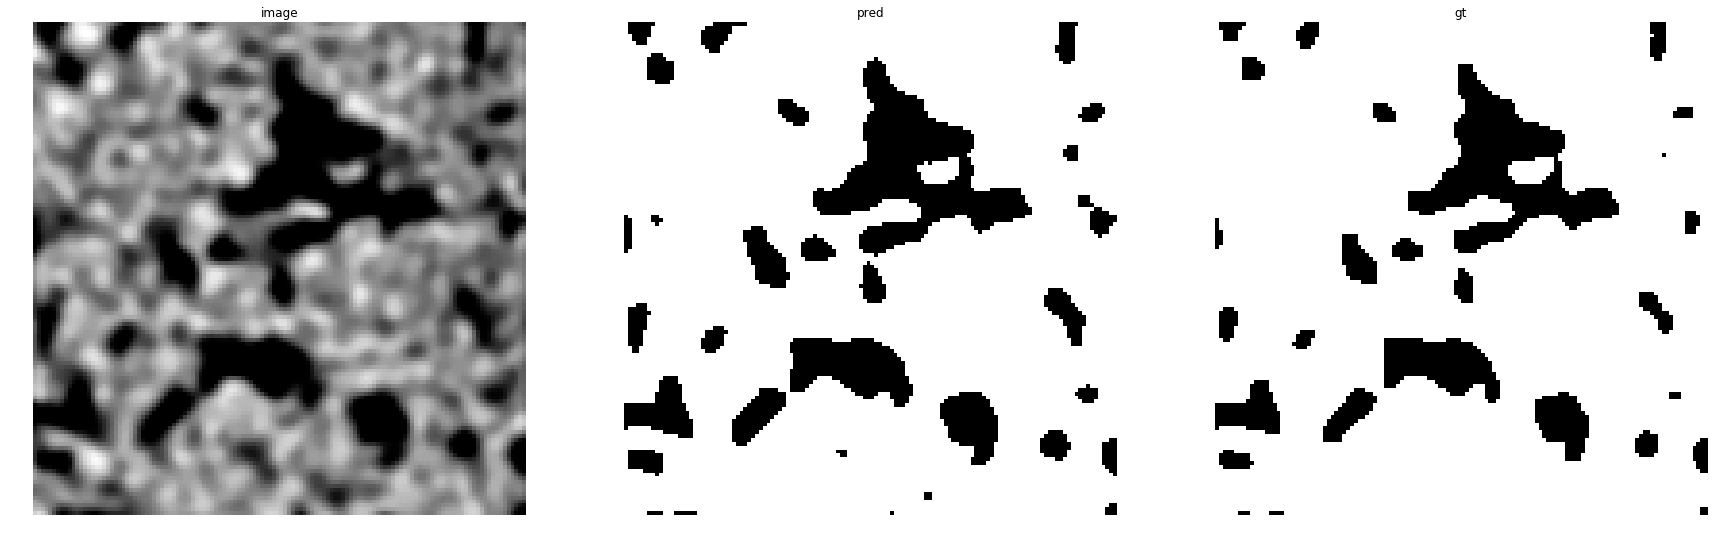

accuracy    : 0.9676513671875
precision   : 1.0
recall      : 0.9623445825932504
f1          : 0.9808110065170166
pr_auc      : 0.9998701717918073
iou         : 0.9623445825932504


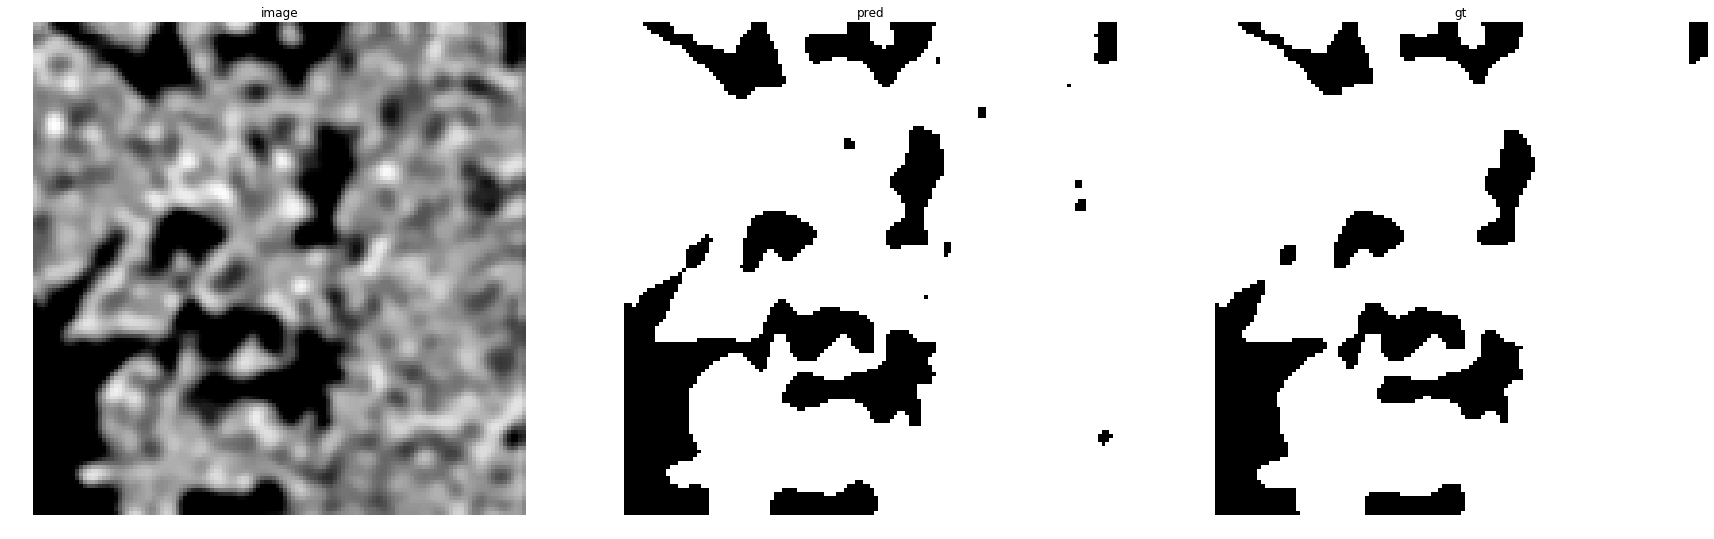

accuracy    : 0.975830078125
precision   : 1.0
recall      : 0.9708502024291498
f1          : 0.9852095316351683
pr_auc      : 0.9999266364574316
iou         : 0.9708502024291498


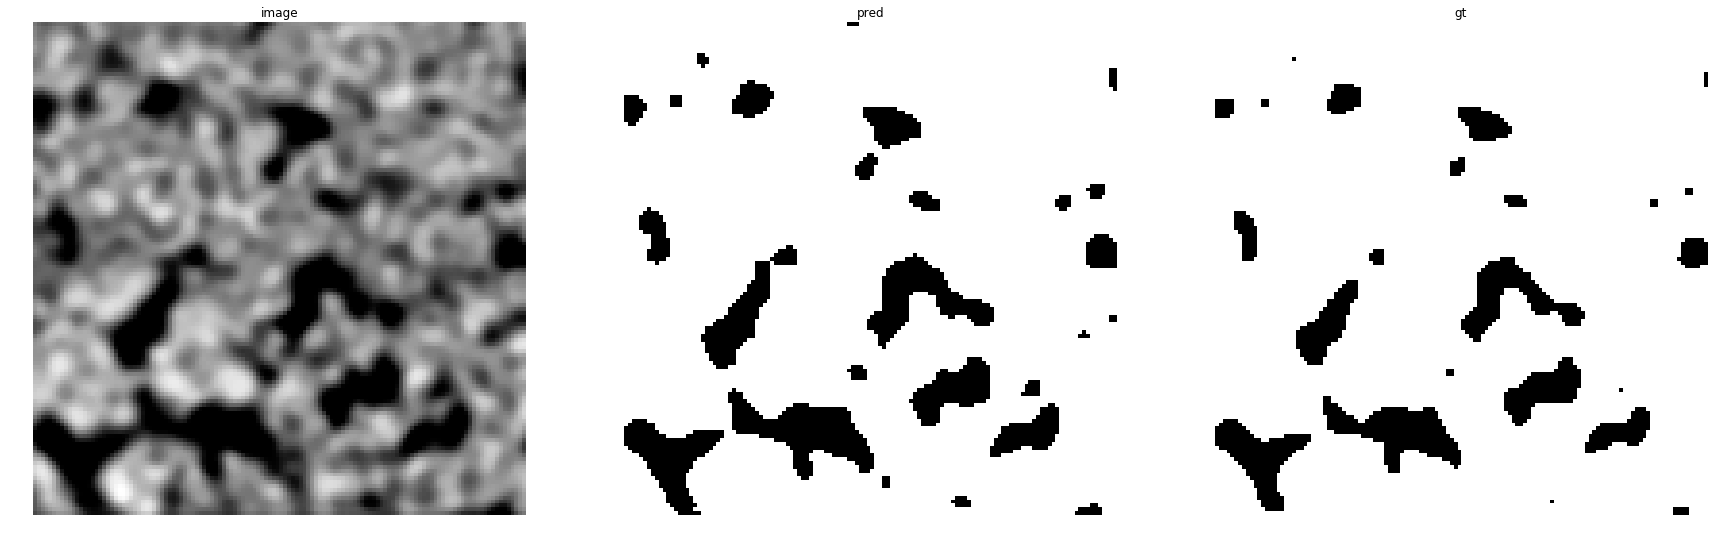

accuracy    : 0.969970703125
precision   : 1.0
recall      : 0.9666304937601736
f1          : 0.9830321423644641
pr_auc      : 0.9999077208448084
iou         : 0.9666304937601736


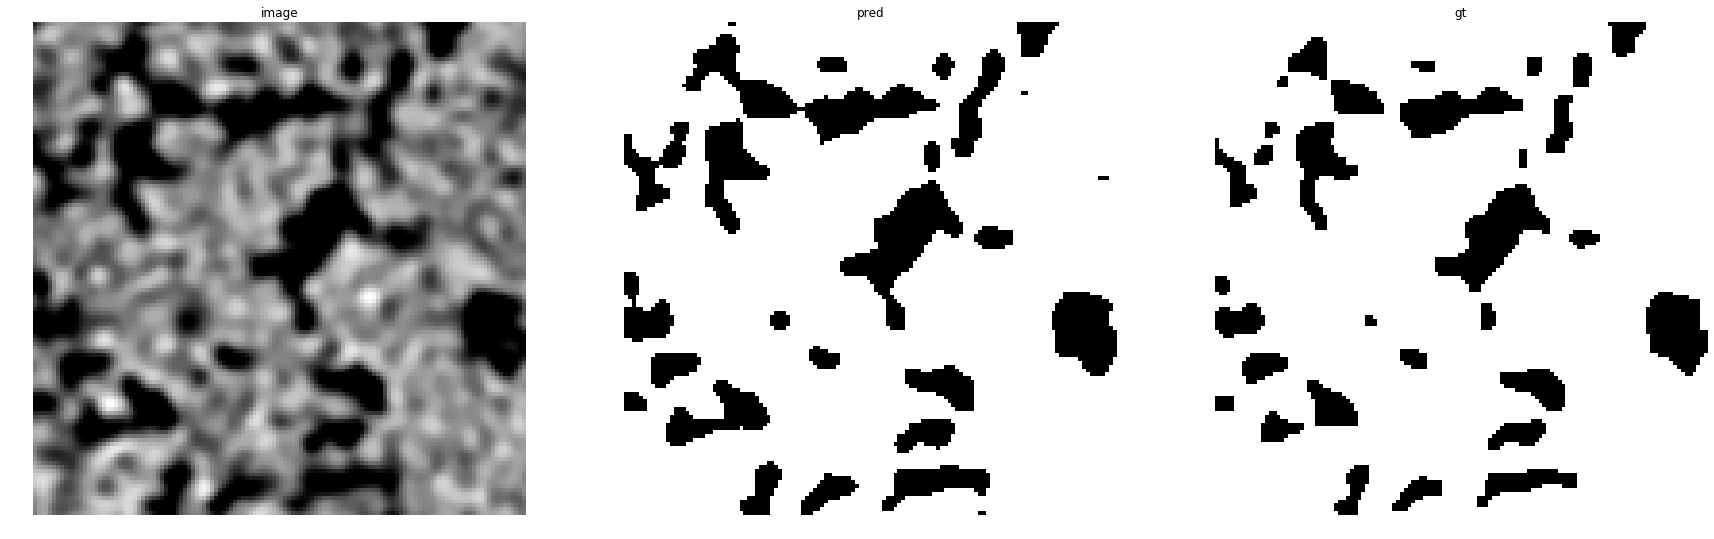

accuracy    : 0.96099853515625
precision   : 1.0
recall      : 0.954180410153449
f1          : 0.97655304003229
pr_auc      : 0.9998251061004435
iou         : 0.954180410153449


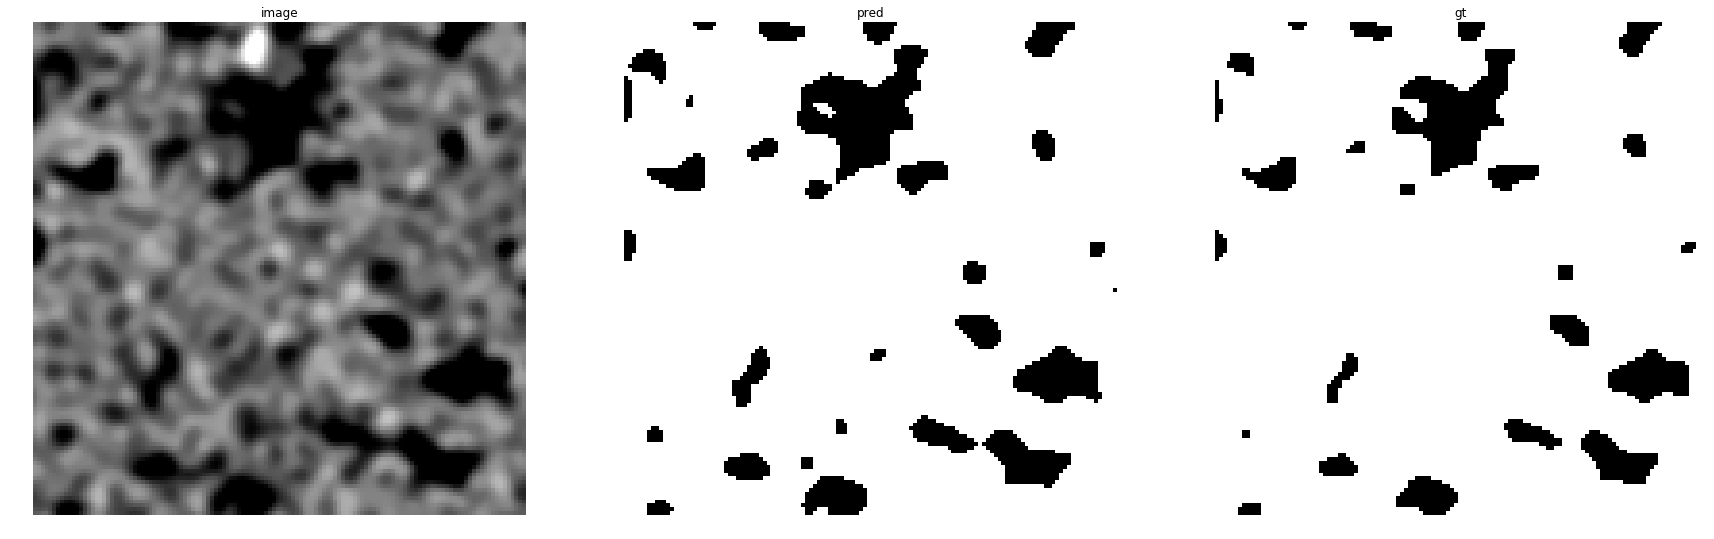

accuracy    : 0.97113037109375
precision   : 1.0
recall      : 0.9679539295392954
f1          : 0.9837160464075464
pr_auc      : 0.9999378885957895
iou         : 0.9679539295392954


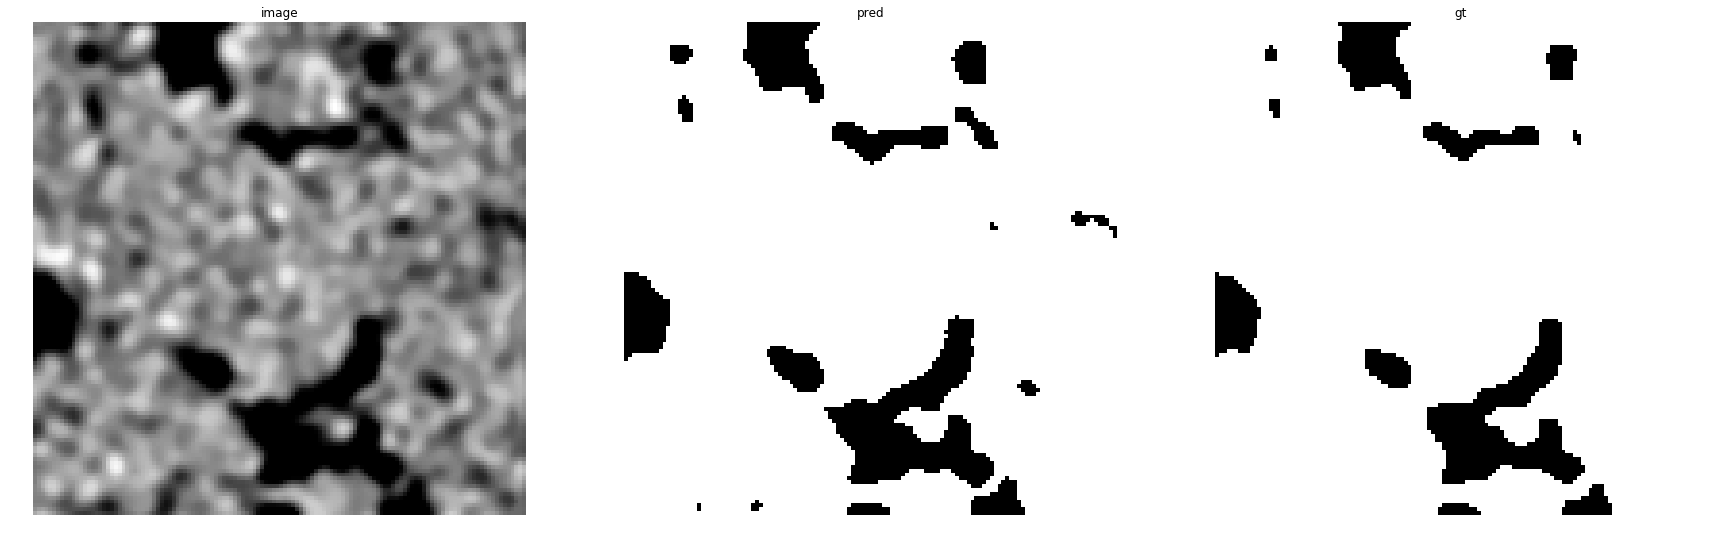

accuracy    : 0.977783203125
precision   : 1.0
recall      : 0.9753671245855045
f1          : 0.9875299760191846
pr_auc      : 0.999930062833011
iou         : 0.9753671245855045


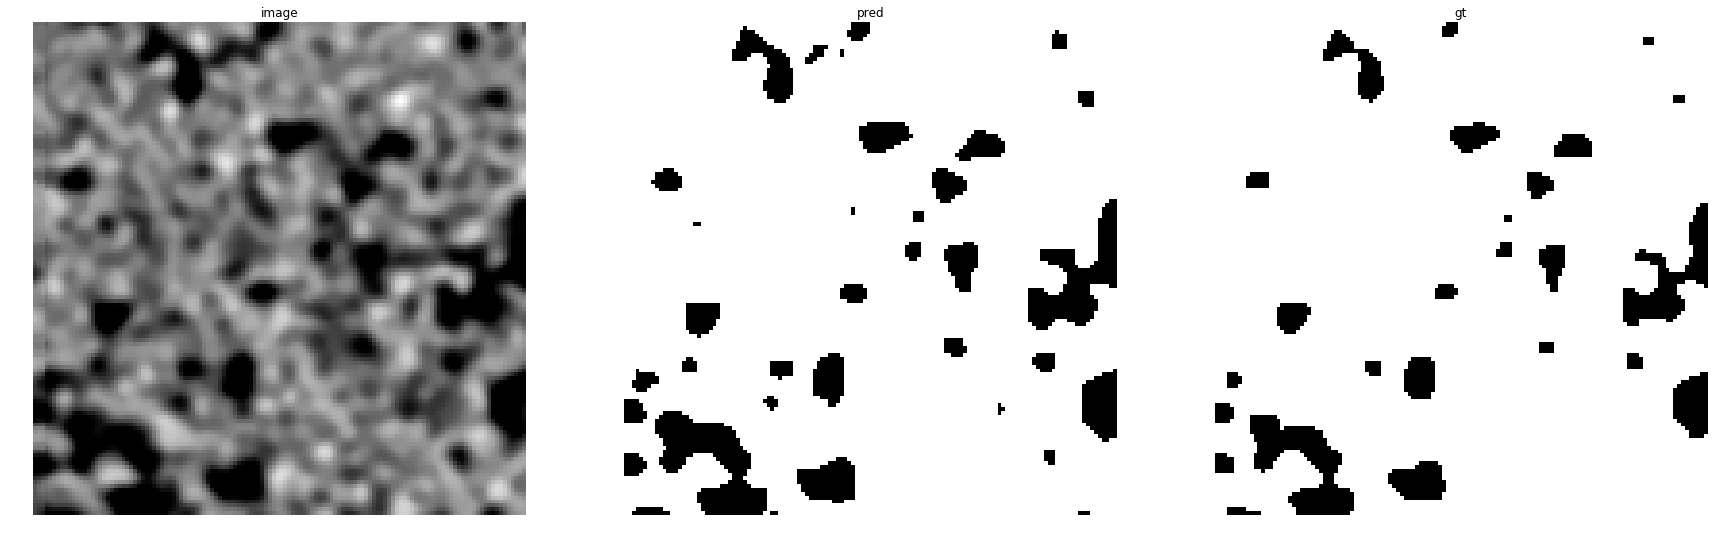

accuracy    : 0.97119140625
precision   : 1.0
recall      : 0.9682646406239495
f1          : 0.9838764774202364
pr_auc      : 0.9999133633549322
iou         : 0.9682646406239495


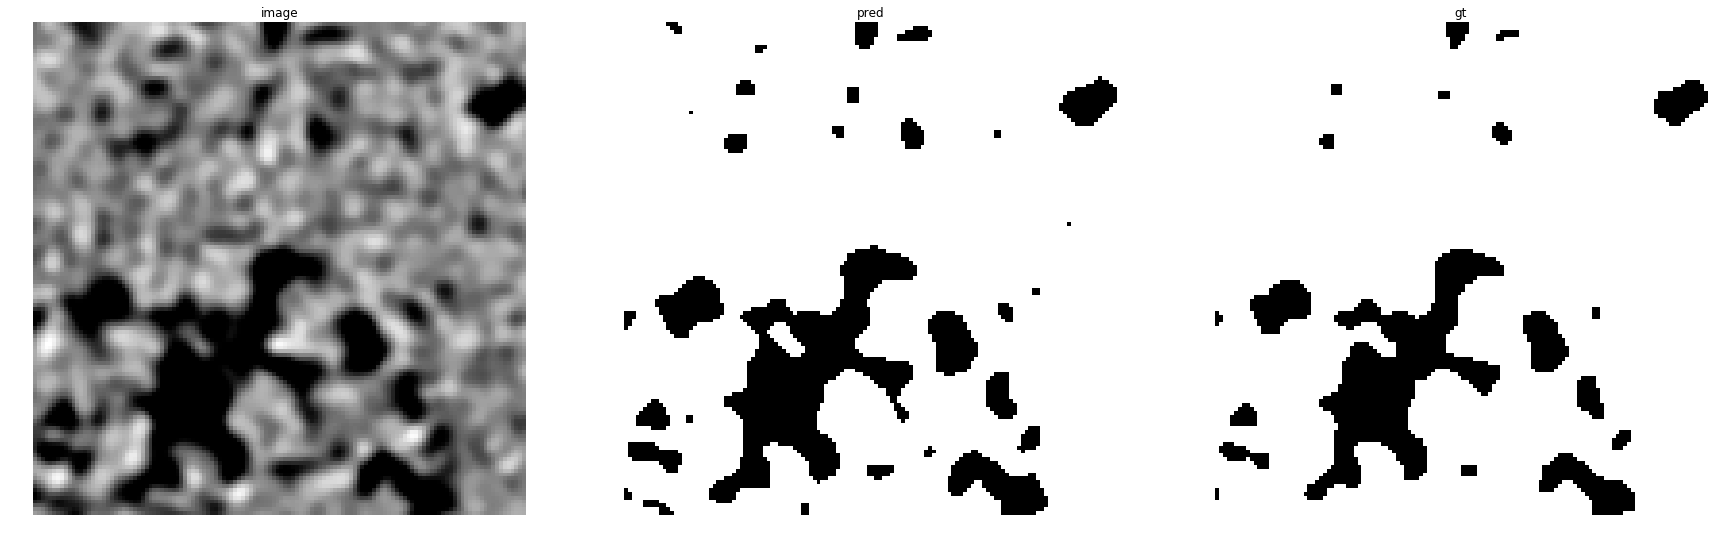

accuracy    : 0.970947265625
precision   : 1.0
recall      : 0.9667574551295481
f1          : 0.9830977913500462
pr_auc      : 0.9999207126213798
iou         : 0.9667574551295481


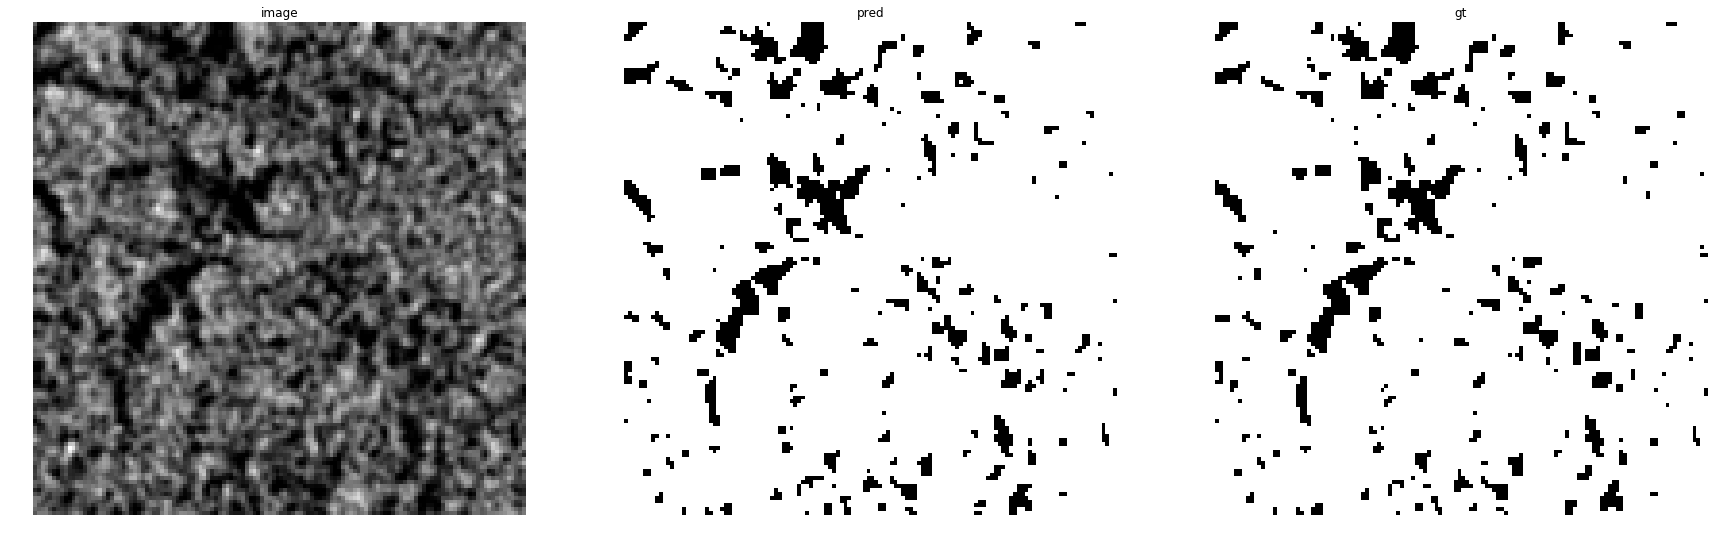

accuracy    : 0.98773193359375
precision   : 0.9941200324412003
recall      : 0.9923092491398502
f1          : 0.993213815456295
pr_auc      : 0.9998636952275001
iou         : 0.9865191146881288


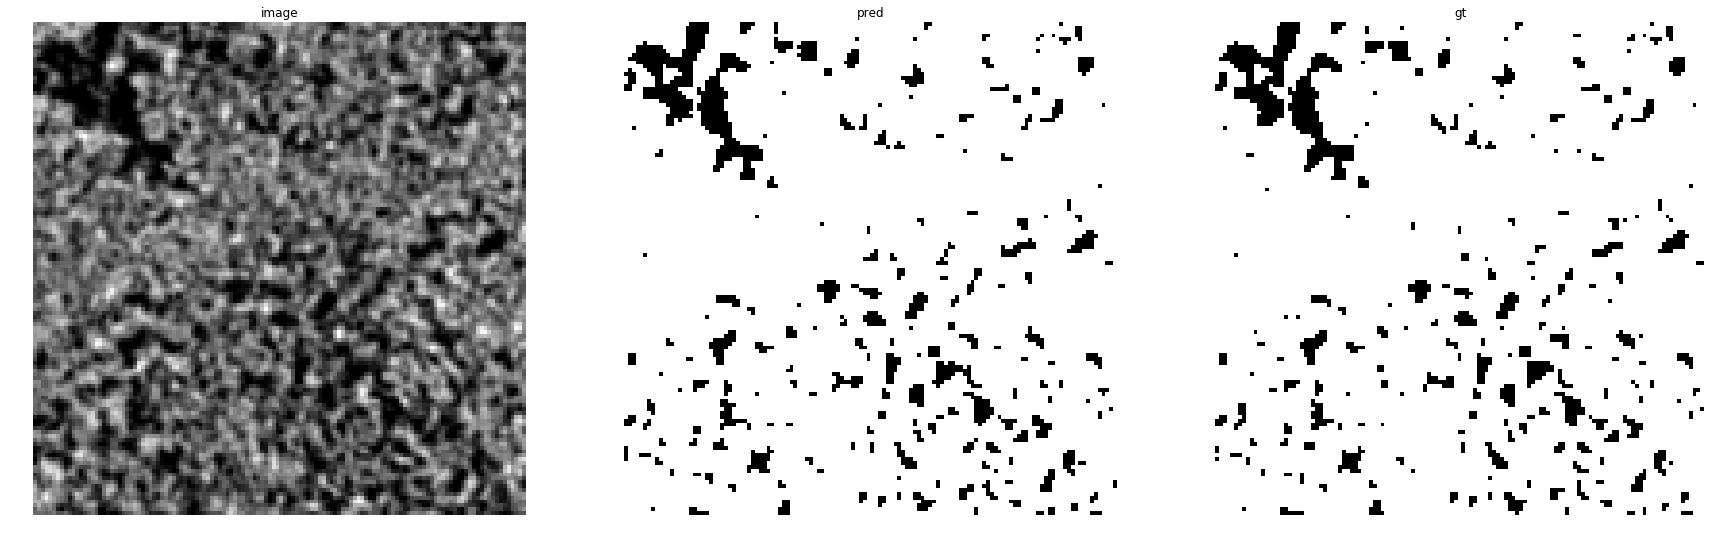

accuracy    : 0.9901123046875
precision   : 0.9954821308159136
recall      : 0.9936061381074168
f1          : 0.9945432497978981
pr_auc      : 0.9998954028815439
iou         : 0.989145728643216


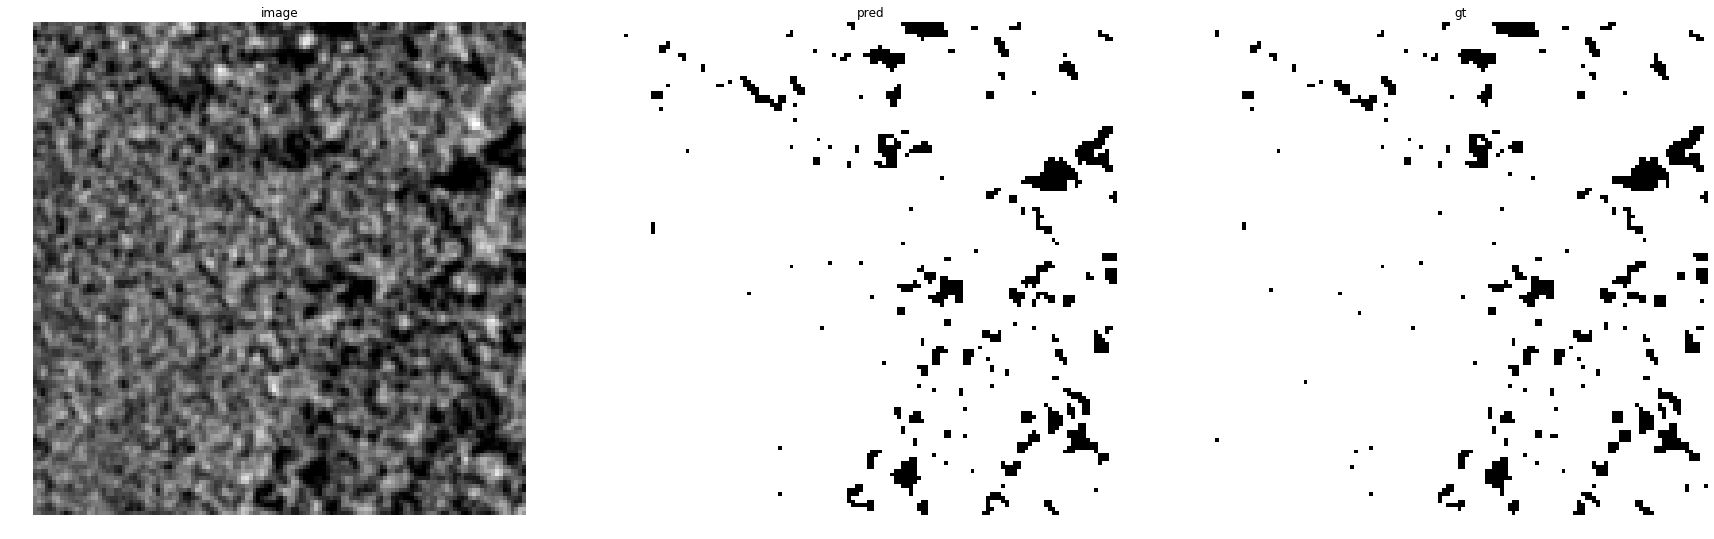

accuracy    : 0.99334716796875
precision   : 0.9967538791144582
recall      : 0.996171814170776
f1          : 0.9964627616420575
pr_auc      : 0.9999568703240613
iou         : 0.9929504591902729


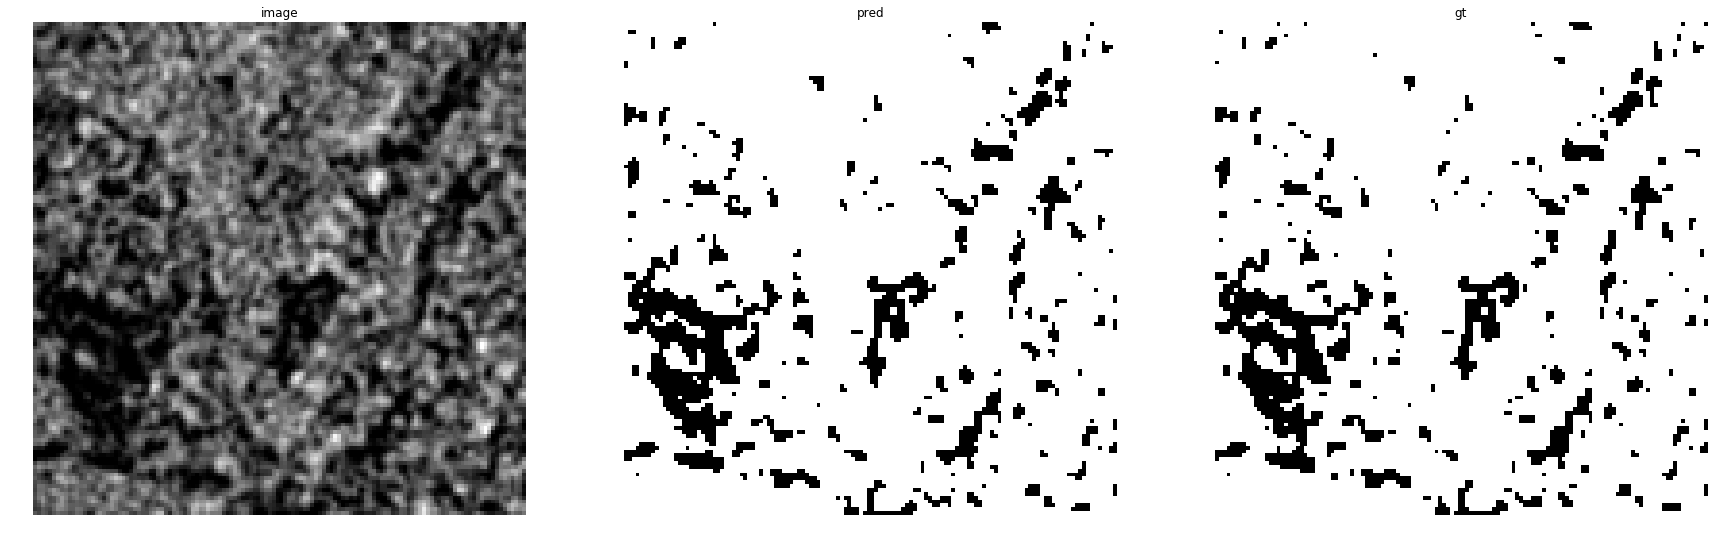

accuracy    : 0.98785400390625
precision   : 0.9935533599607596
recall      : 0.992510149797004
f1          : 0.9930314808978533
pr_auc      : 0.9998434541064788
iou         : 0.9861594102100432


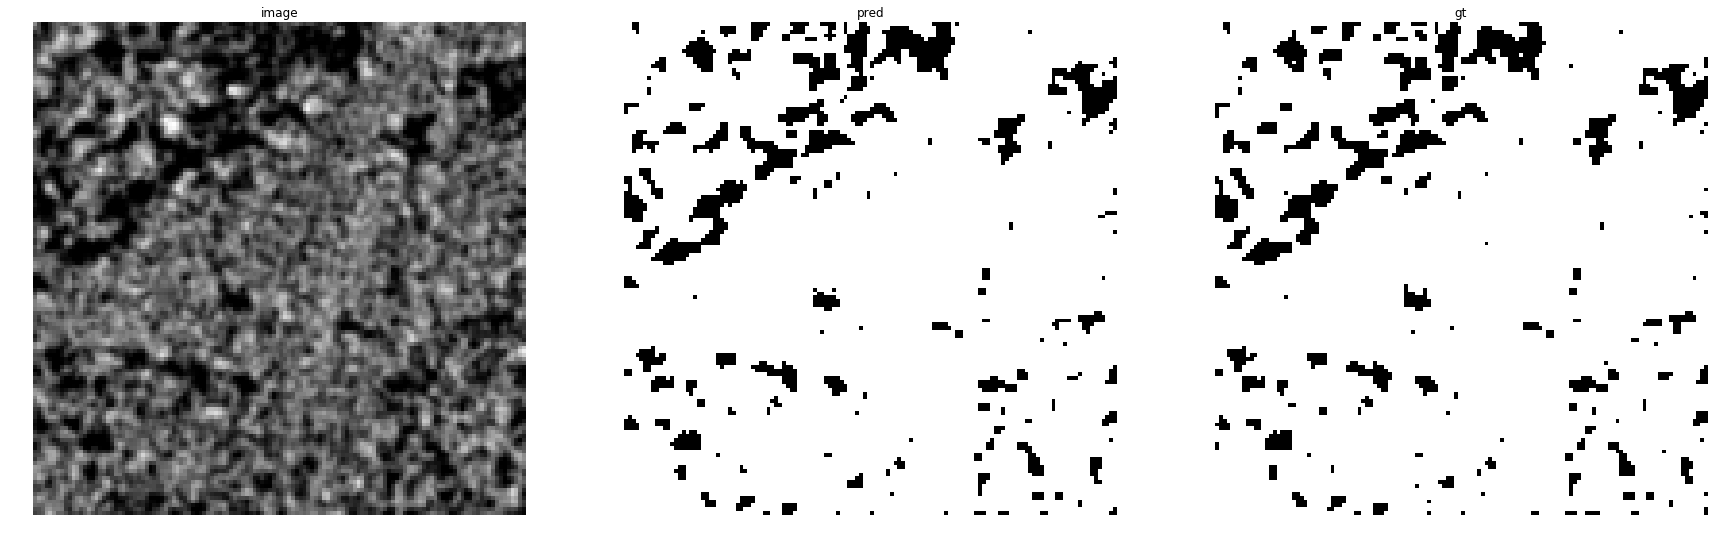

accuracy    : 0.9898681640625
precision   : 0.9941840574751967
recall      : 0.994456231606324
f1          : 0.9943201259152809
pr_auc      : 0.9999004702397121
iou         : 0.988704409363092


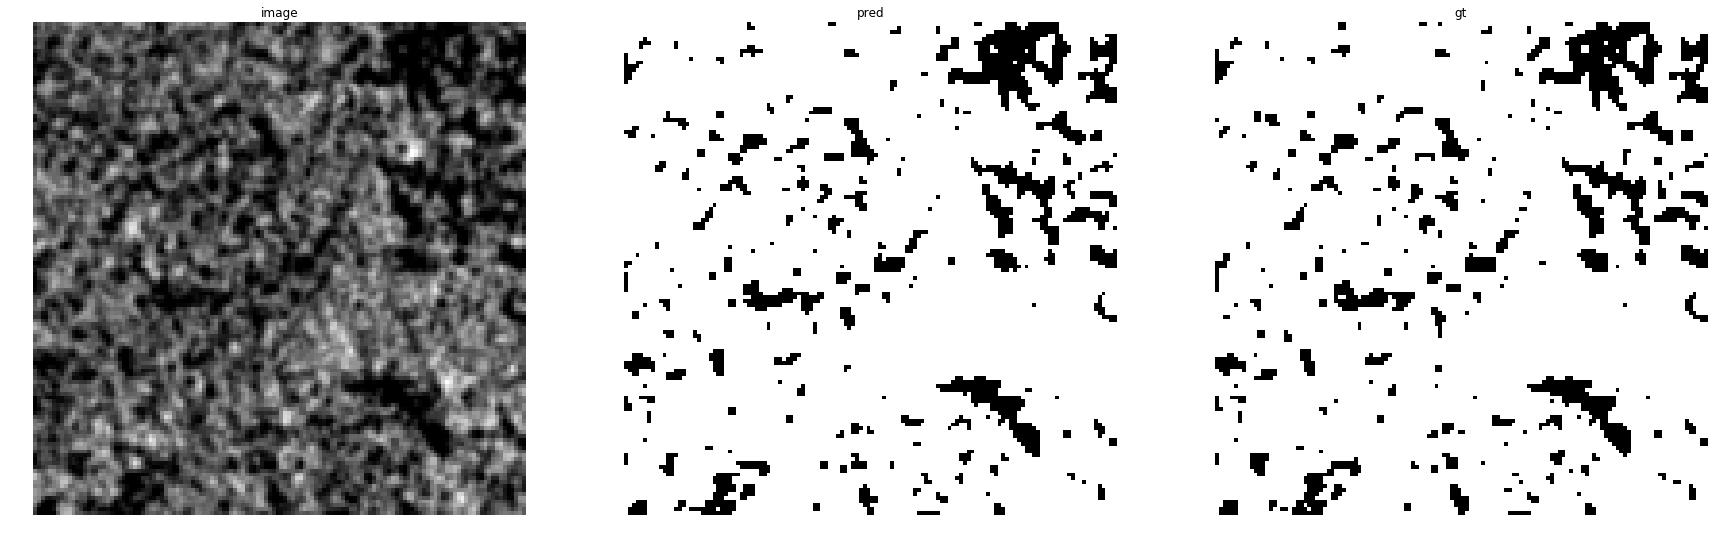

accuracy    : 0.98577880859375
precision   : 0.9903879640593439
recall      : 0.9933631409808579
f1          : 0.9918733214746609
pr_auc      : 0.9997958117041911
iou         : 0.9838776639911431


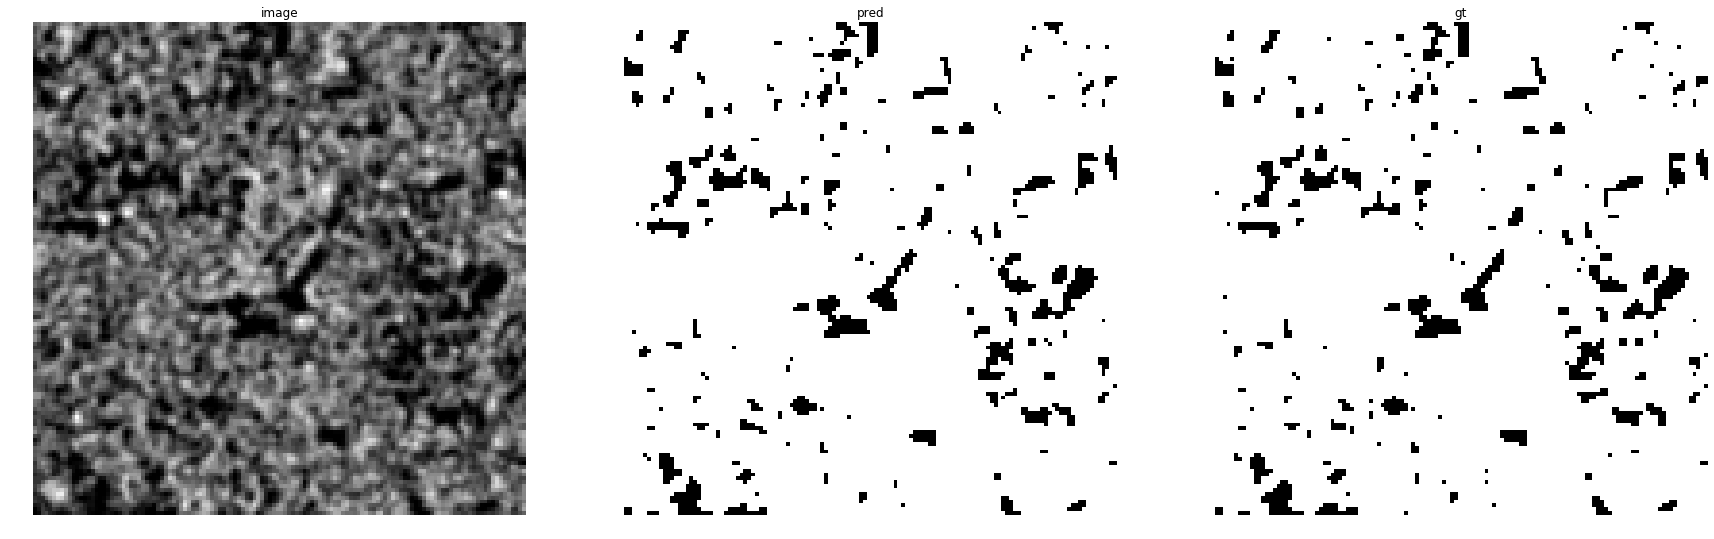

accuracy    : 0.9901123046875
precision   : 0.9932365227770041
recall      : 0.9960103730301216
f1          : 0.994621513944223
pr_auc      : 0.9999077074557523
iou         : 0.9893005745987715


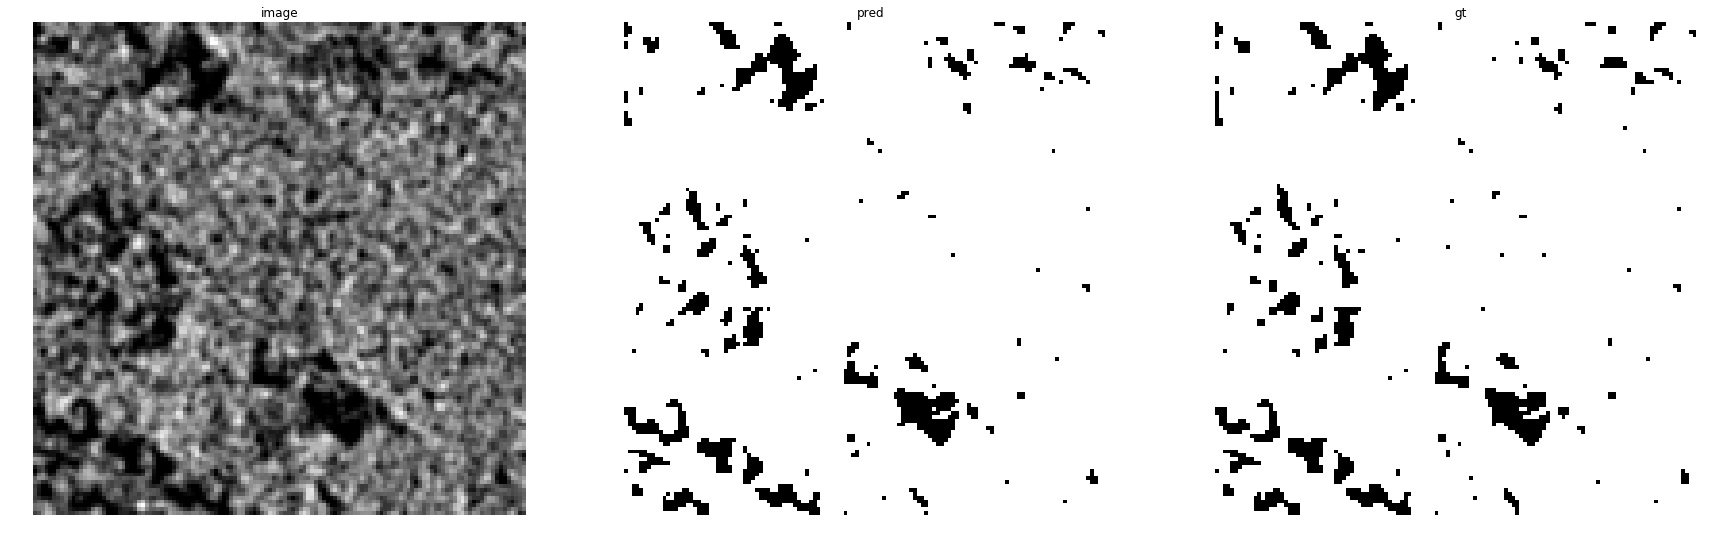

accuracy    : 0.99273681640625
precision   : 0.9958696649839376
recall      : 0.9963269054178145
f1          : 0.9960982327289419
pr_auc      : 0.9999511020188325
iou         : 0.9922267946959304


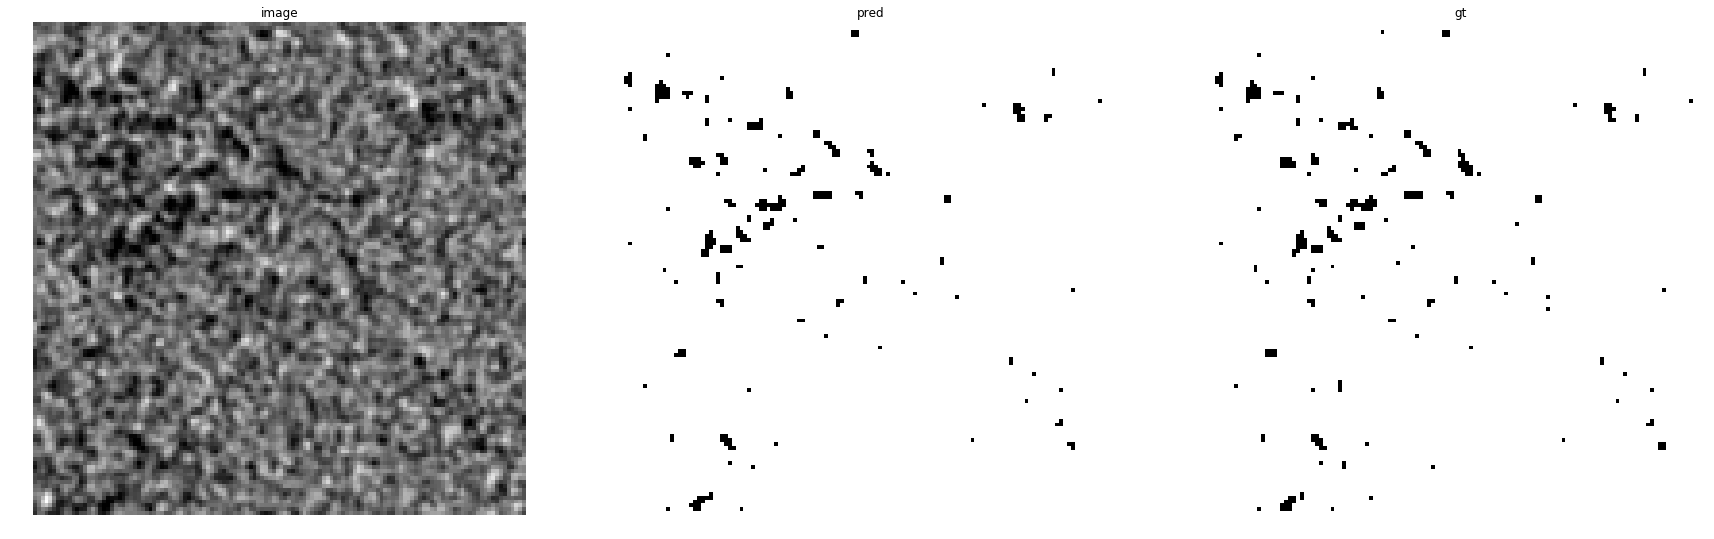

accuracy    : 0.997314453125
precision   : 0.9981995405724219
recall      : 0.9990679177282048
f1          : 0.9986335403726708
pr_auc      : 0.9999924914736501
iou         : 0.997270810073192


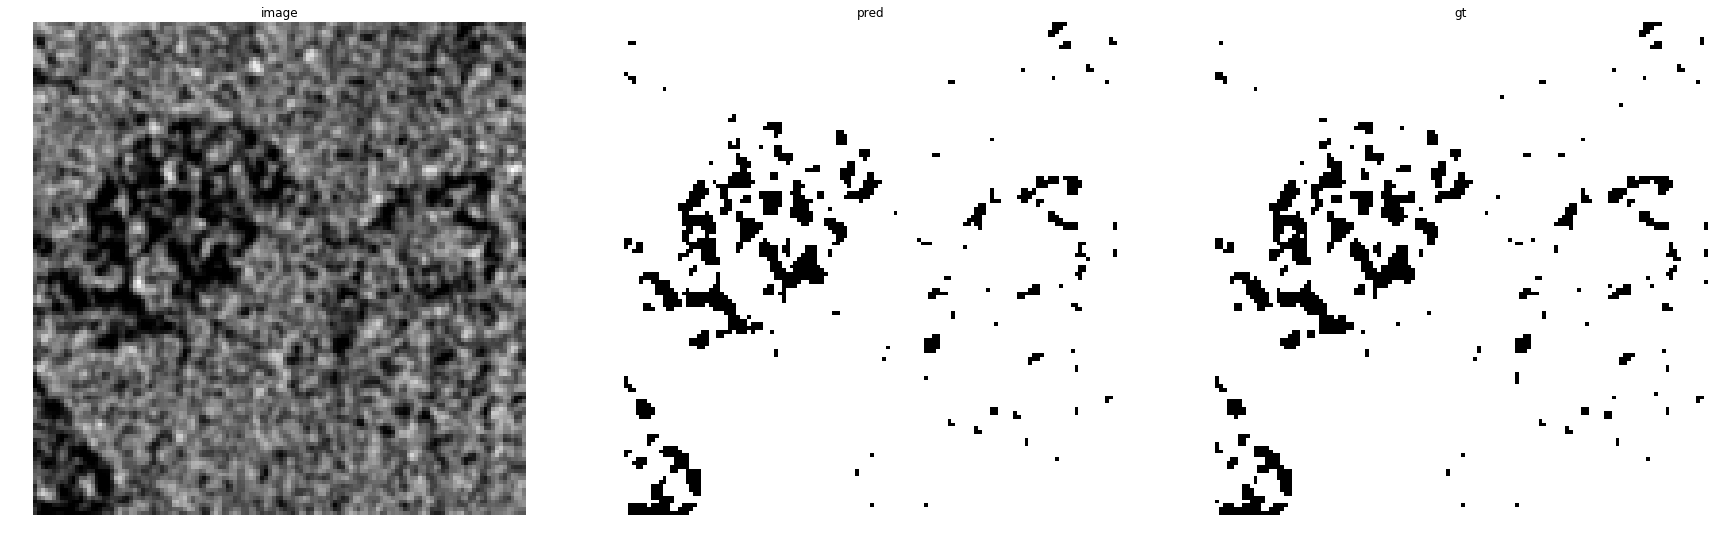

accuracy    : 0.99169921875
precision   : 0.9942815827527277
recall      : 0.9967712177121771
f1          : 0.995524843698585
pr_auc      : 0.9999469012449111
iou         : 0.9910895629954792


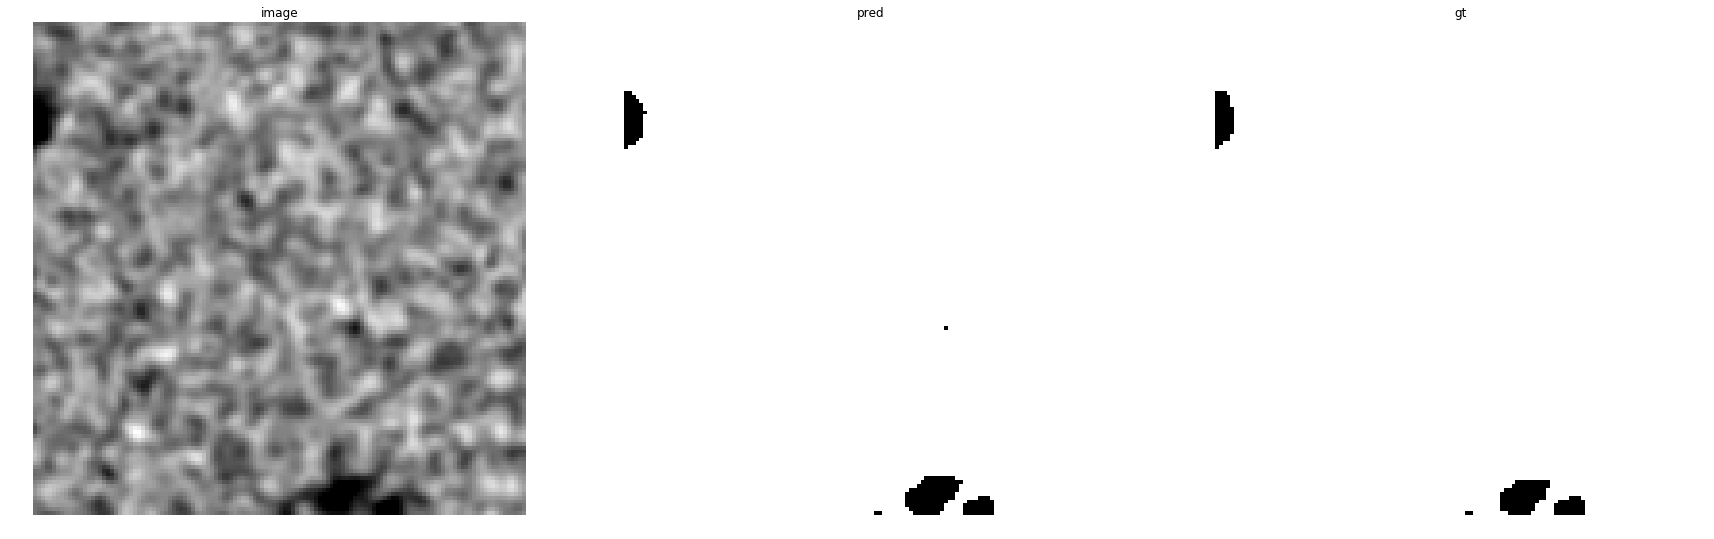

accuracy    : 0.99847412109375
precision   : 0.9998763753245148
recall      : 0.9985801592690907
f1          : 0.9992278469283751
pr_auc      : 0.9999996036462908
iou         : 0.9984568853774458


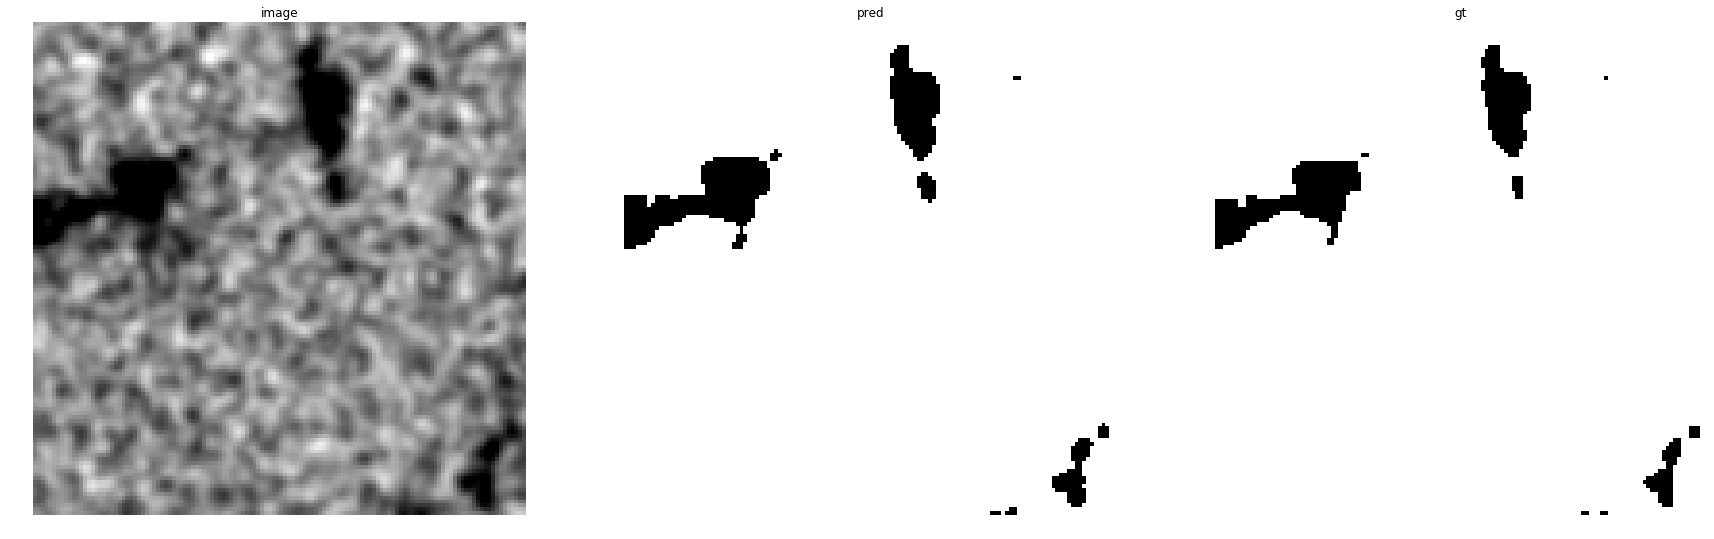

accuracy    : 0.993408203125
precision   : 0.999806750837413
recall      : 0.9932804300524767
f1          : 0.9965329052969502
pr_auc      : 0.9999940605588955
iou         : 0.9930897690191312


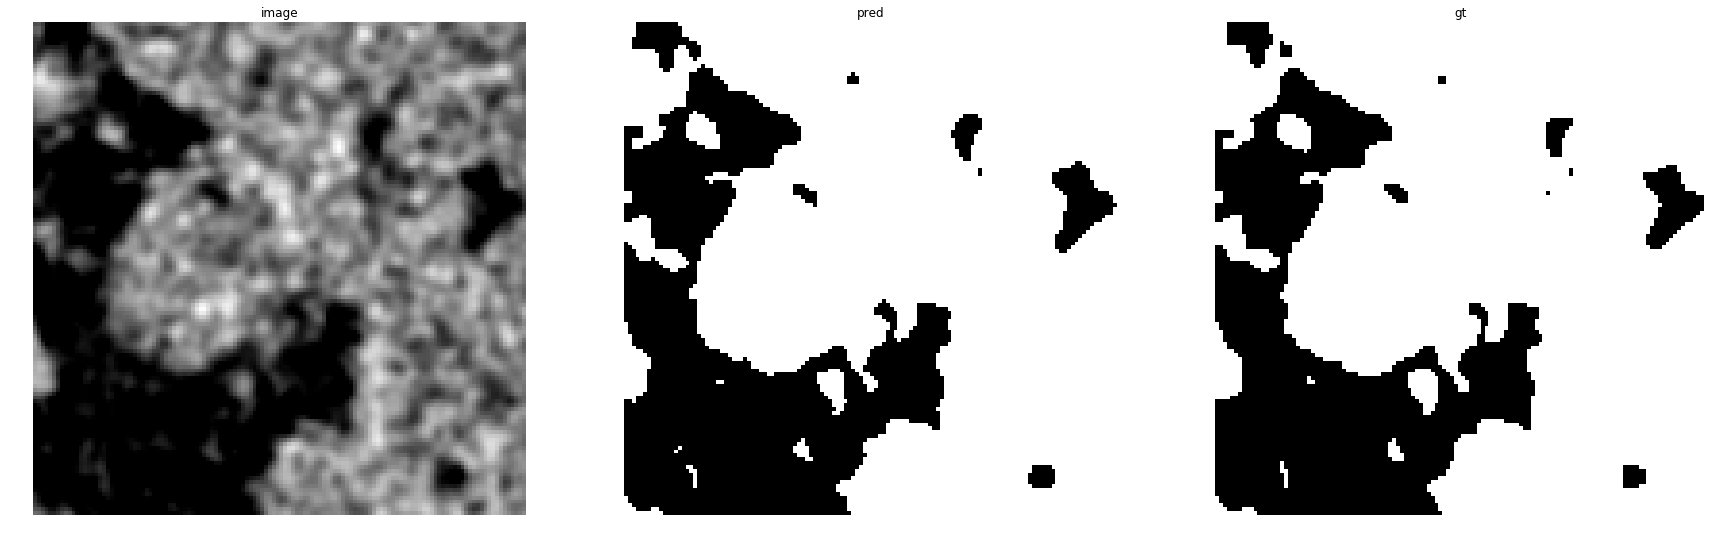

accuracy    : 0.987060546875
precision   : 0.9985235365641827
recall      : 0.9833219295244612
f1          : 0.9908644316125139
pr_auc      : 0.9998863315776402
iou         : 0.9818942693654454


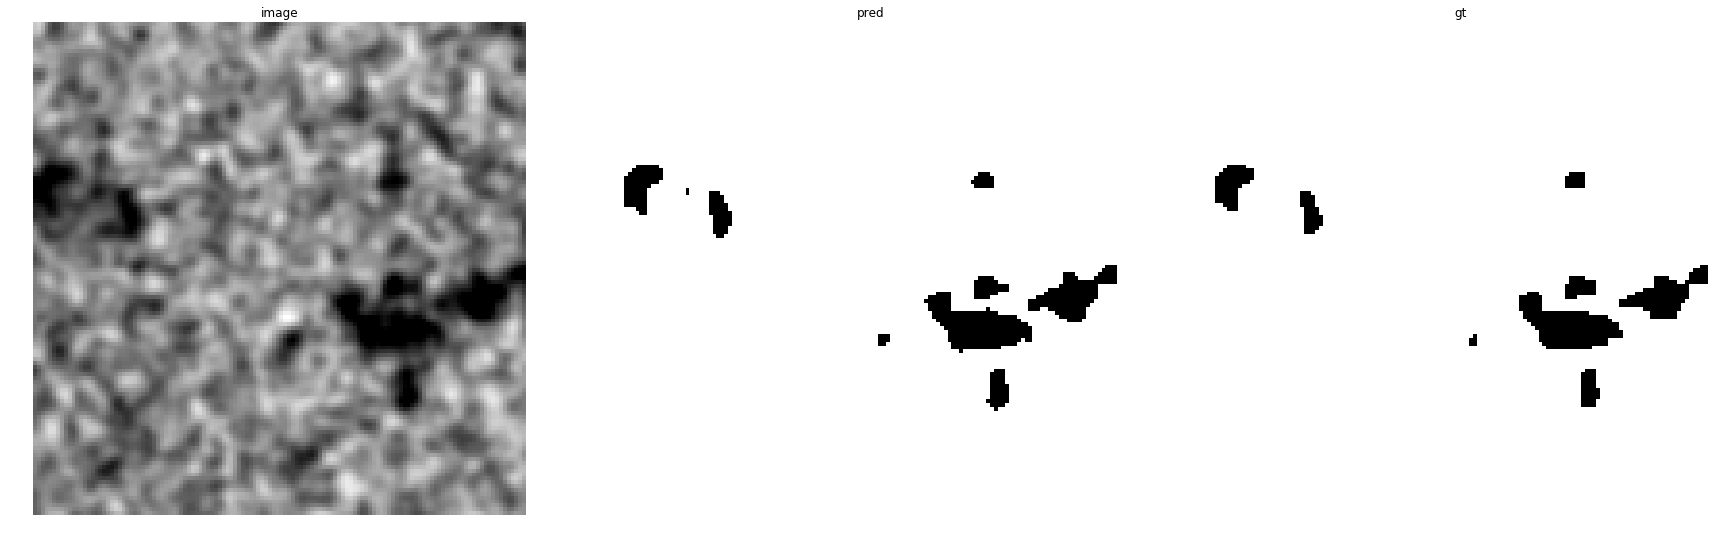

accuracy    : 0.99639892578125
precision   : 0.9996189266433788
recall      : 0.9966438703140831
f1          : 0.9981291815962202
pr_auc      : 0.9999941597637773
iou         : 0.9962653500443094


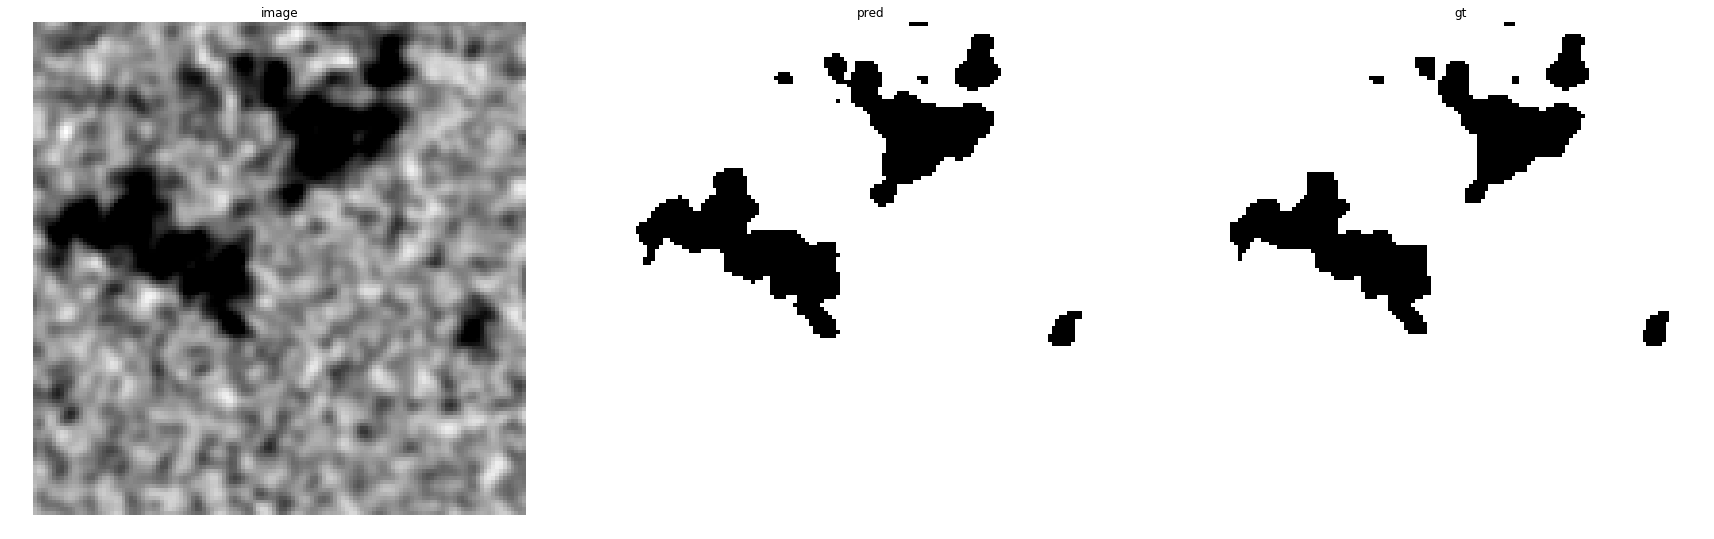

accuracy    : 0.9915771484375
precision   : 0.9997955010224949
recall      : 0.9908796108633968
f1          : 0.9953175895765474
pr_auc      : 0.9999832685397771
iou         : 0.9906788247213779


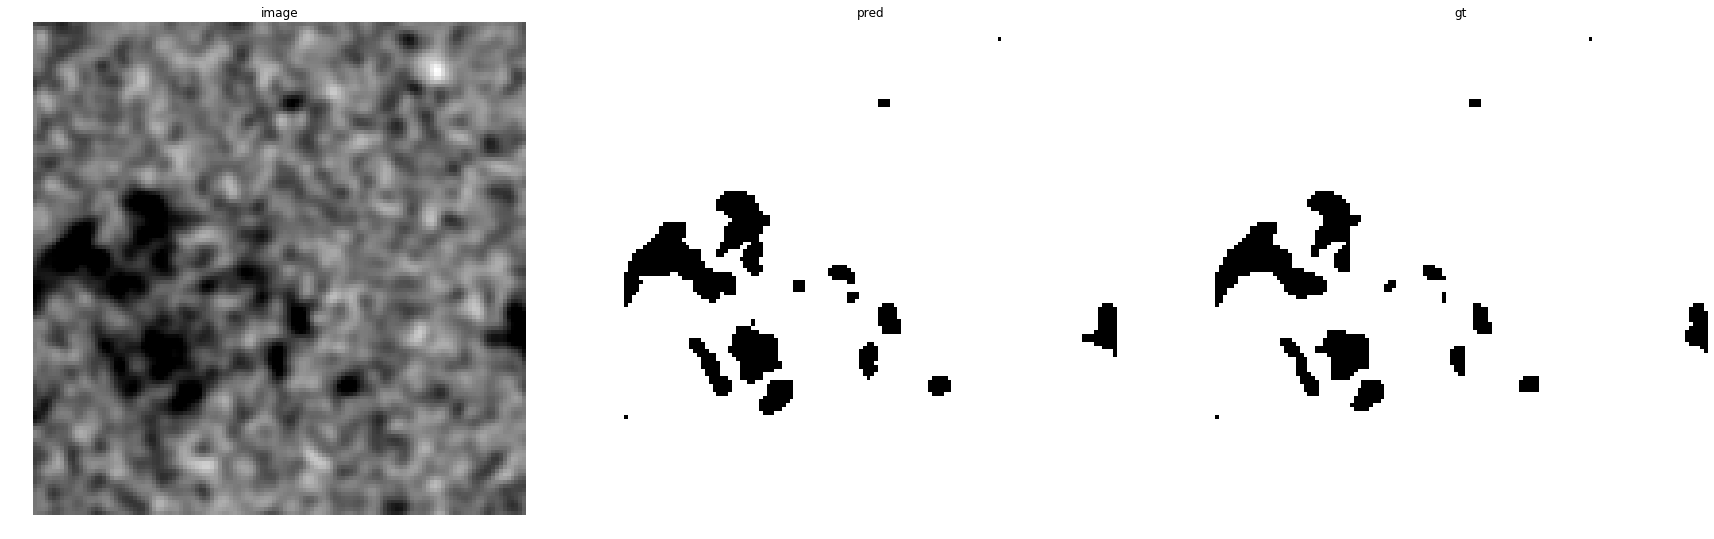

accuracy    : 0.99090576171875
precision   : 0.999351869855467
recall      : 0.9910656896773364
f1          : 0.9951915319327459
pr_auc      : 0.9999803122539167
iou         : 0.9904290853031861


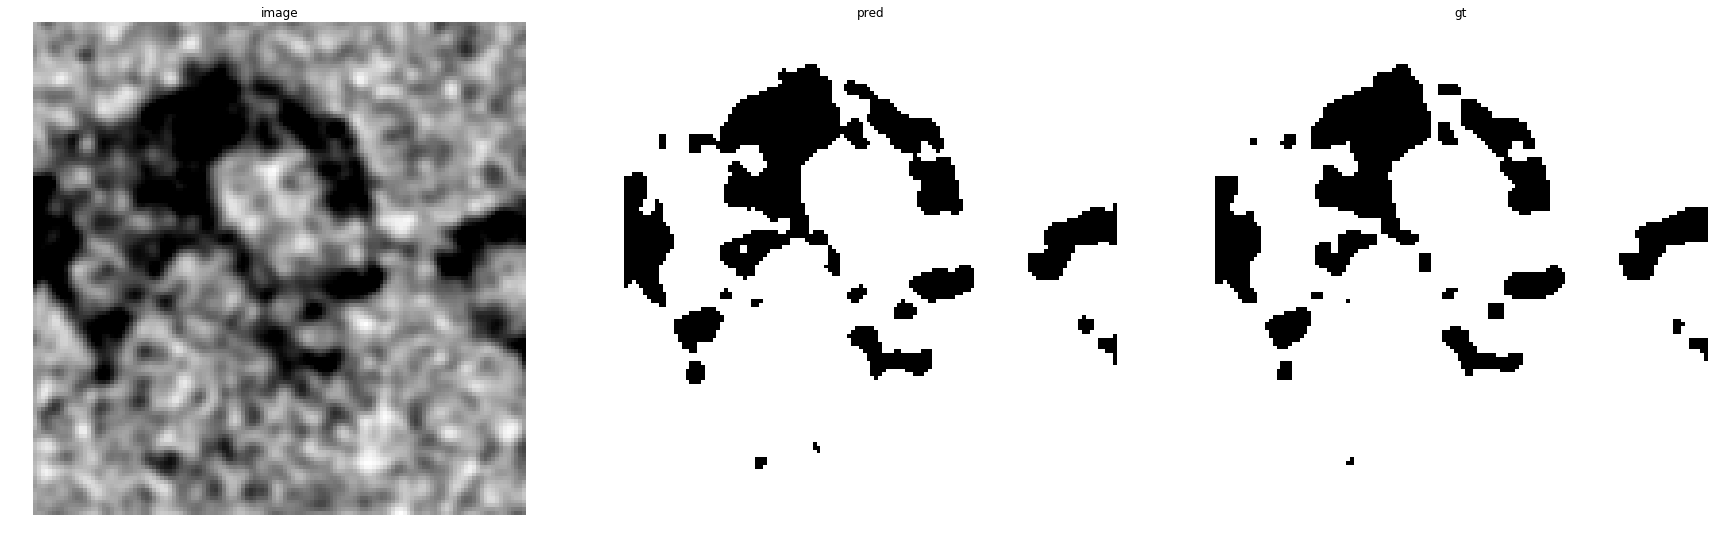

accuracy    : 0.9832763671875
precision   : 0.9992858673141469
recall      : 0.981482780388581
f1          : 0.9903043170559094
pr_auc      : 0.9999194432176544
iou         : 0.9807948412420271


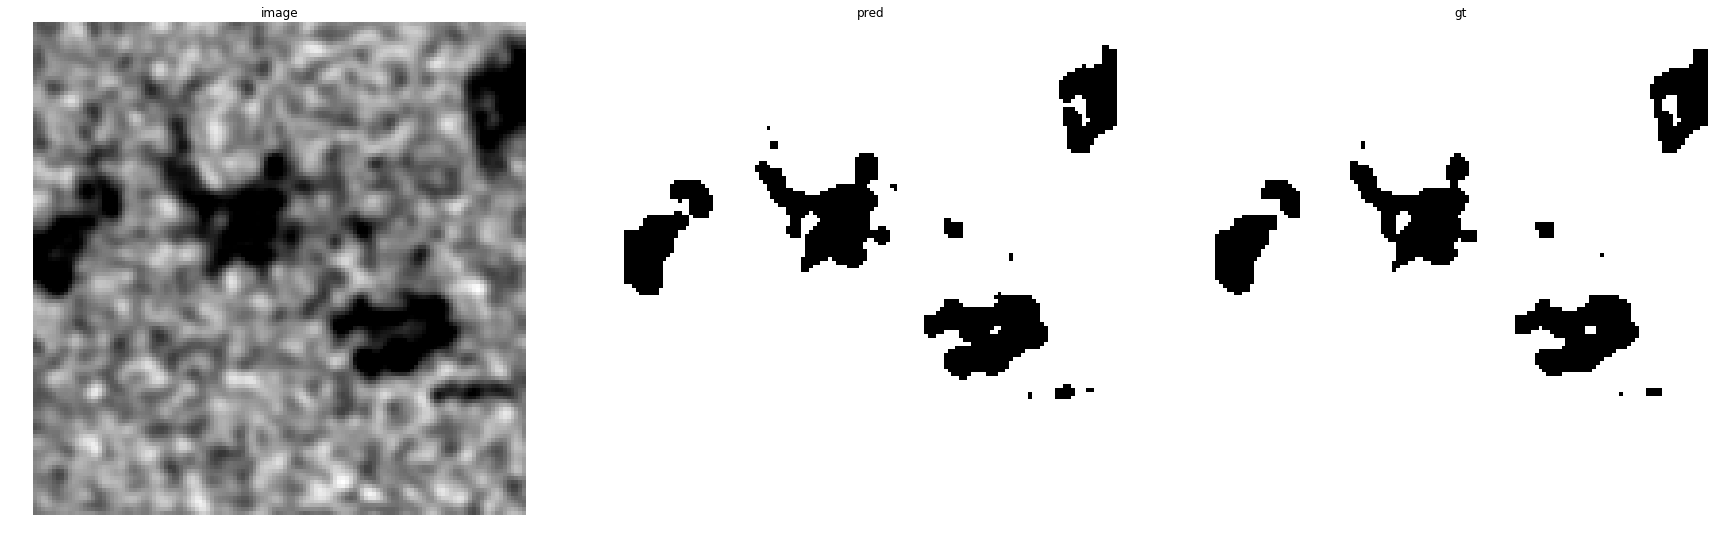

accuracy    : 0.99005126953125
precision   : 0.9989873759535544
recall      : 0.9900976849993309
f1          : 0.9945226654121443
pr_auc      : 0.9999665073291722
iou         : 0.9891050063498429


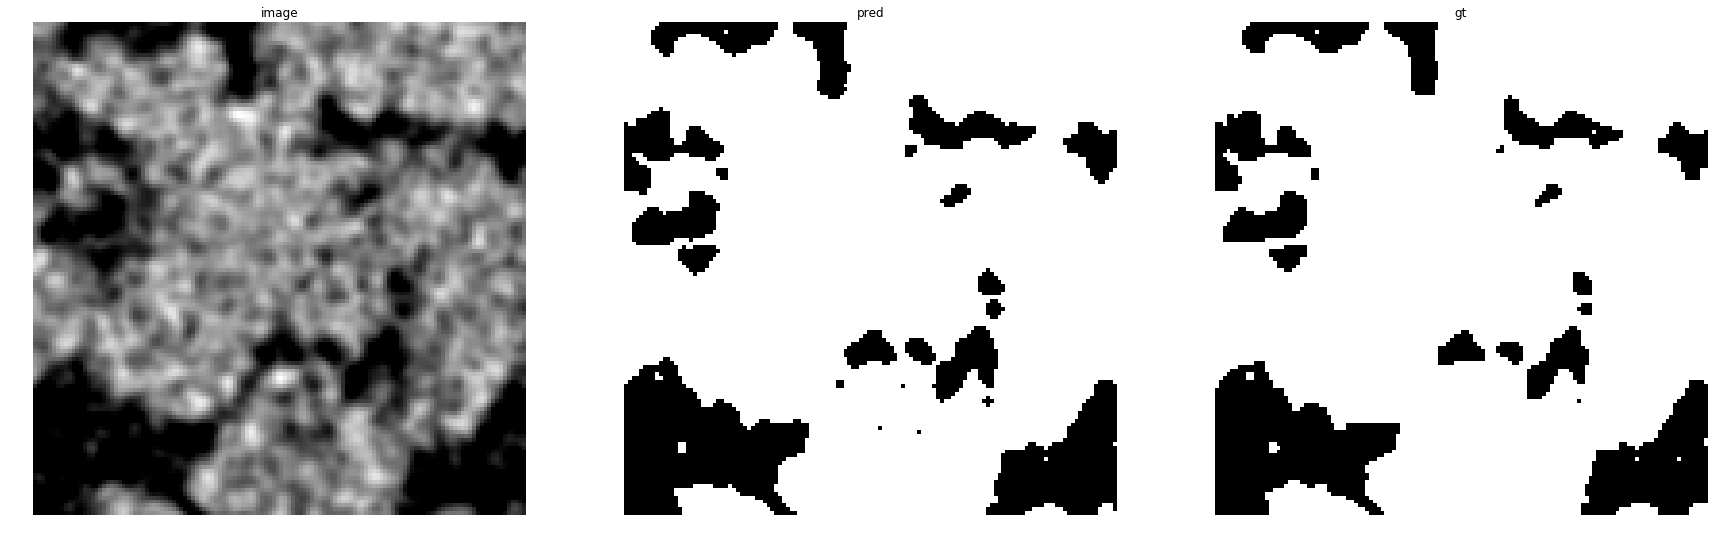

accuracy    : 0.98284912109375
precision   : 0.9993782544493666
recall      : 0.9792110874200426
f1          : 0.9891918919958459
pr_auc      : 0.9999190788803414
iou         : 0.9786149162861492


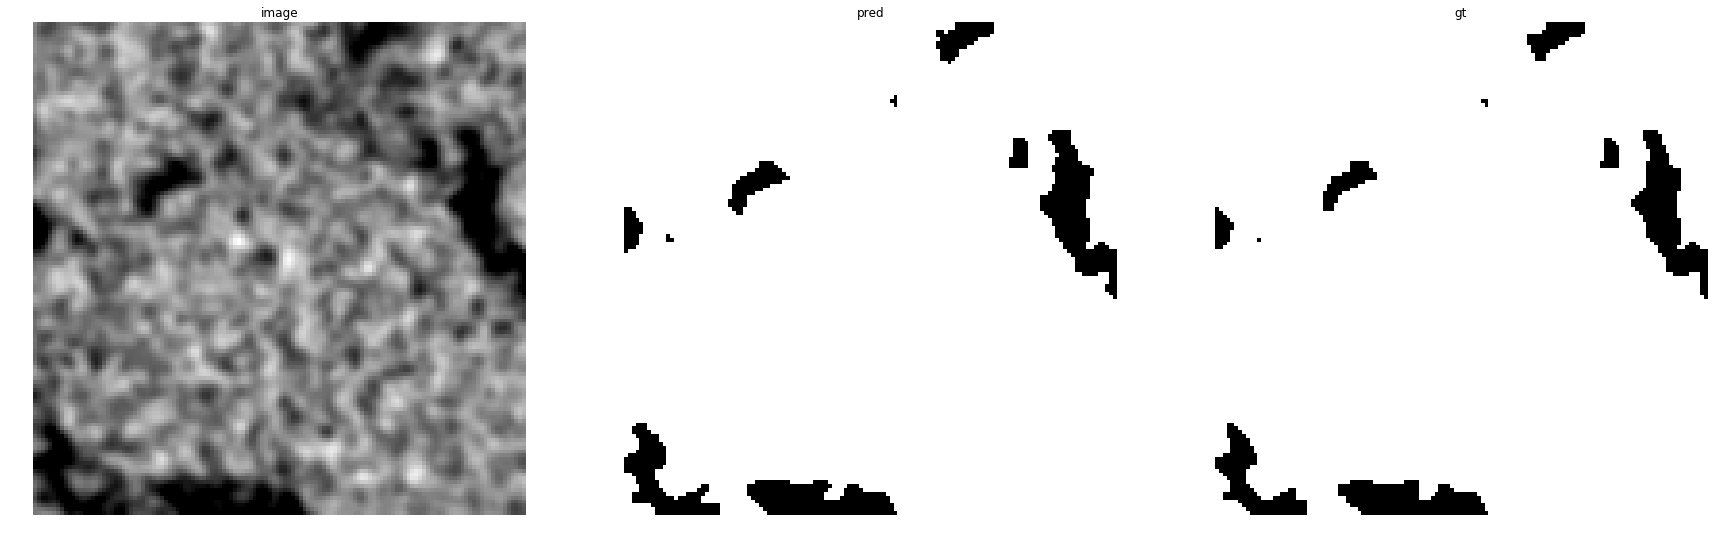

accuracy    : 0.9935302734375
precision   : 0.9993446920052425
recall      : 0.993744298188453
f1          : 0.9965366268052015
pr_auc      : 0.9999875023276472
iou         : 0.9930971607189373


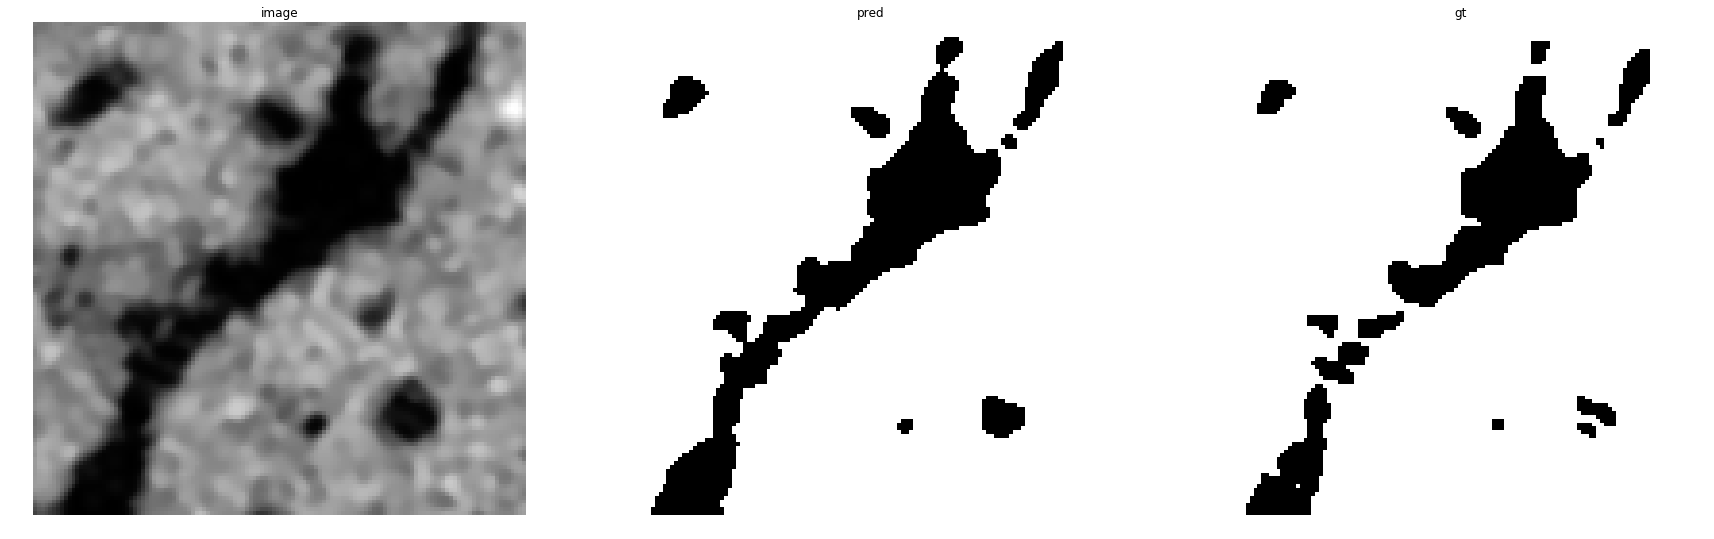

accuracy    : 0.97381591796875
precision   : 1.0
recall      : 0.9703319502074689
f1          : 0.984942613456881
pr_auc      : 0.9999106328064824
iou         : 0.9703319502074689


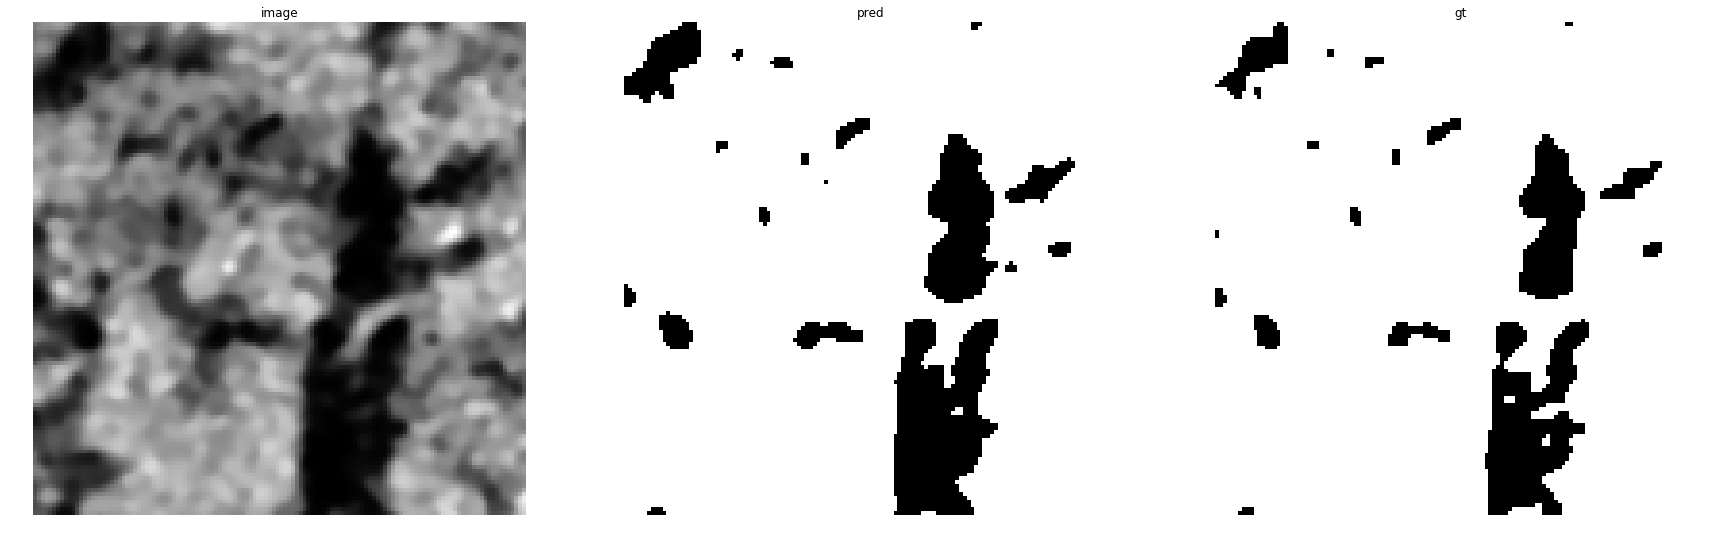

accuracy    : 0.973876953125
precision   : 0.9995783259540375
recall      : 0.9711847046773643
f1          : 0.9851769758260027
pr_auc      : 0.999822706896366
iou         : 0.9707869769981571


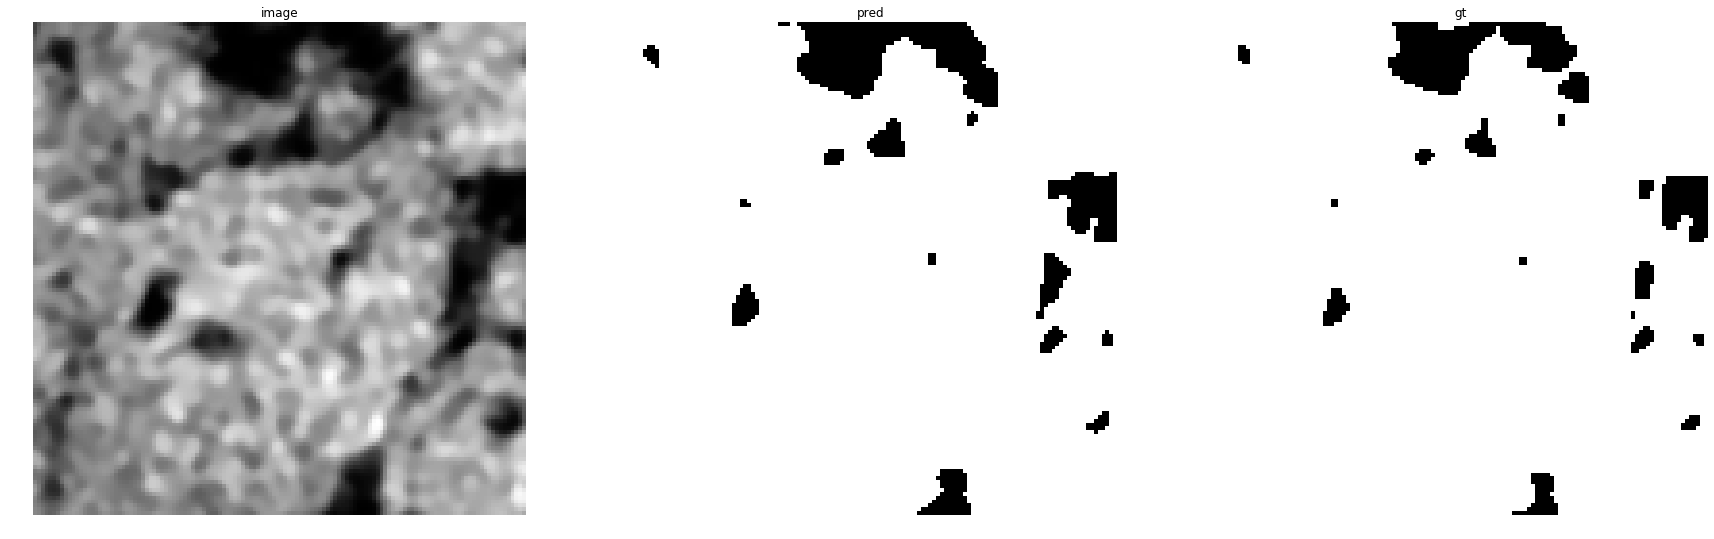

accuracy    : 0.98480224609375
precision   : 1.0
recall      : 0.9837520391517129
f1          : 0.9918094799513174
pr_auc      : 0.9999495320354136
iou         : 0.9837520391517129


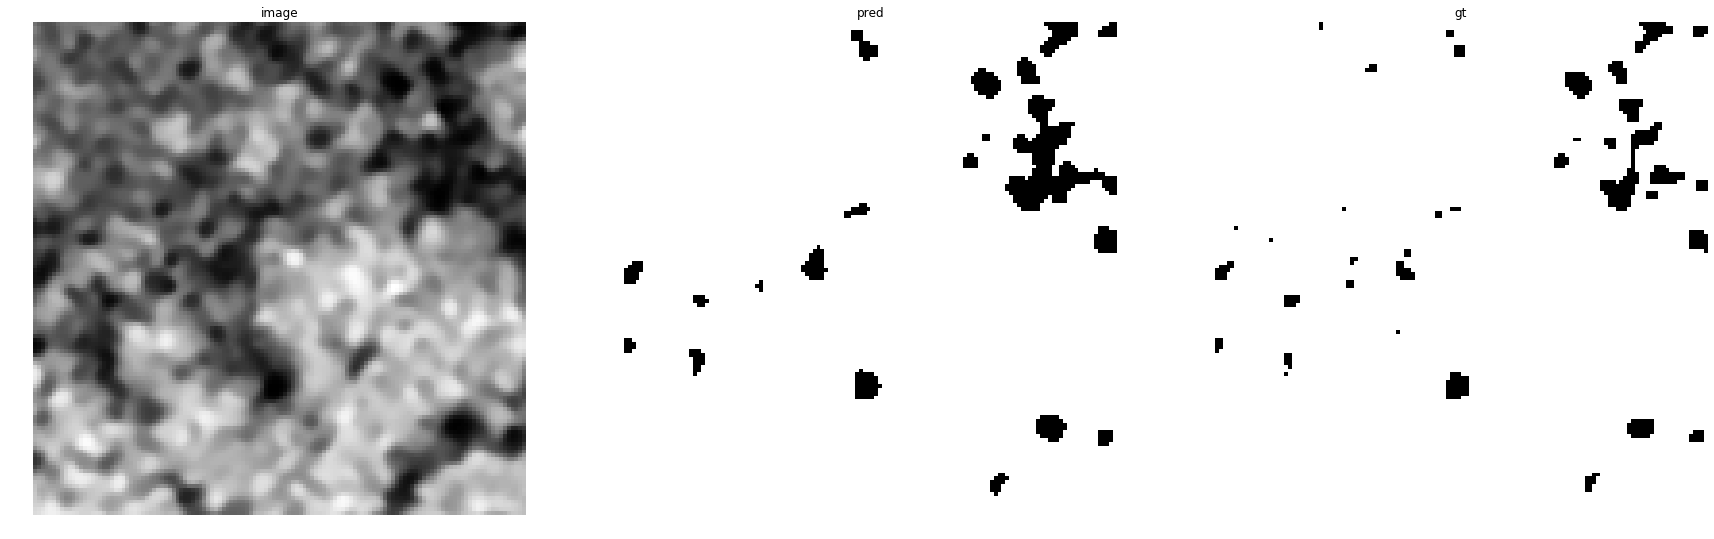

accuracy    : 0.98187255859375
precision   : 0.9987179487179487
recall      : 0.9825313741565239
f1          : 0.9905585402295197
pr_auc      : 0.999908432364223
iou         : 0.9812936952824841


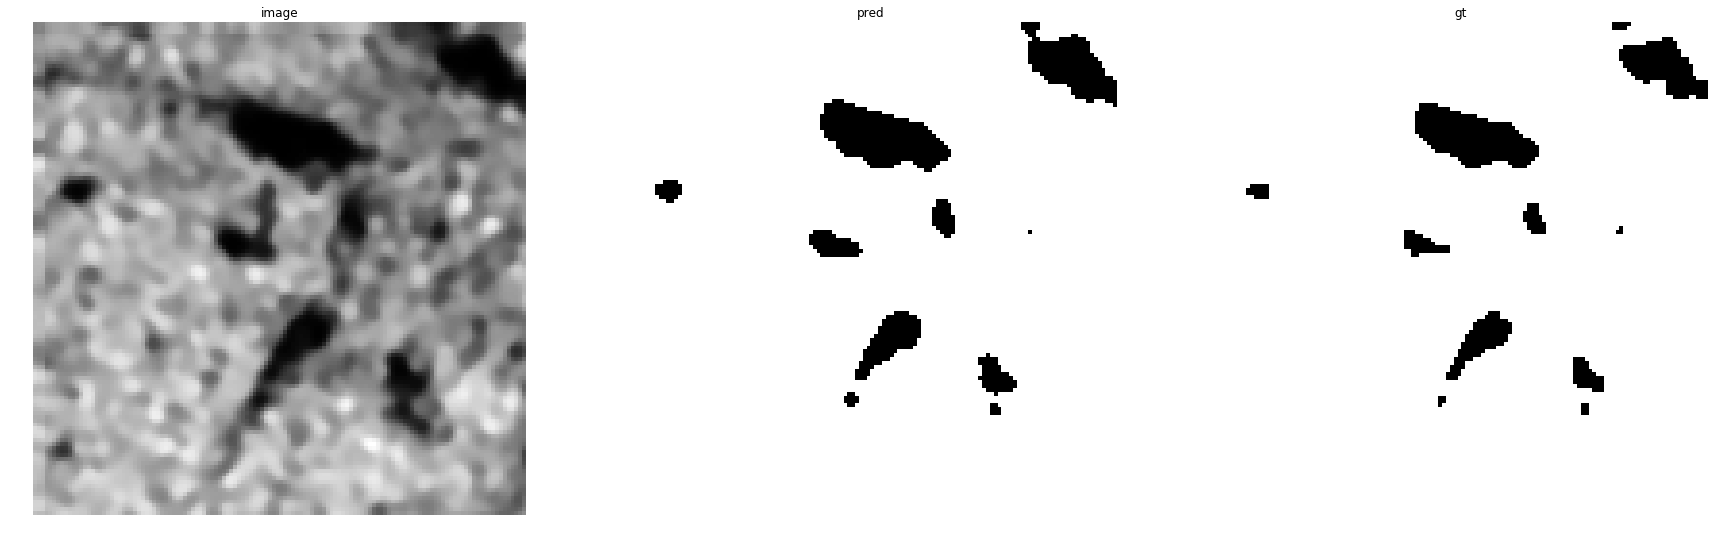

accuracy    : 0.98834228515625
precision   : 0.9998696898618713
recall      : 0.987833923398777
f1          : 0.9938153676780105
pr_auc      : 0.9999856015771922
iou         : 0.9877067644976508


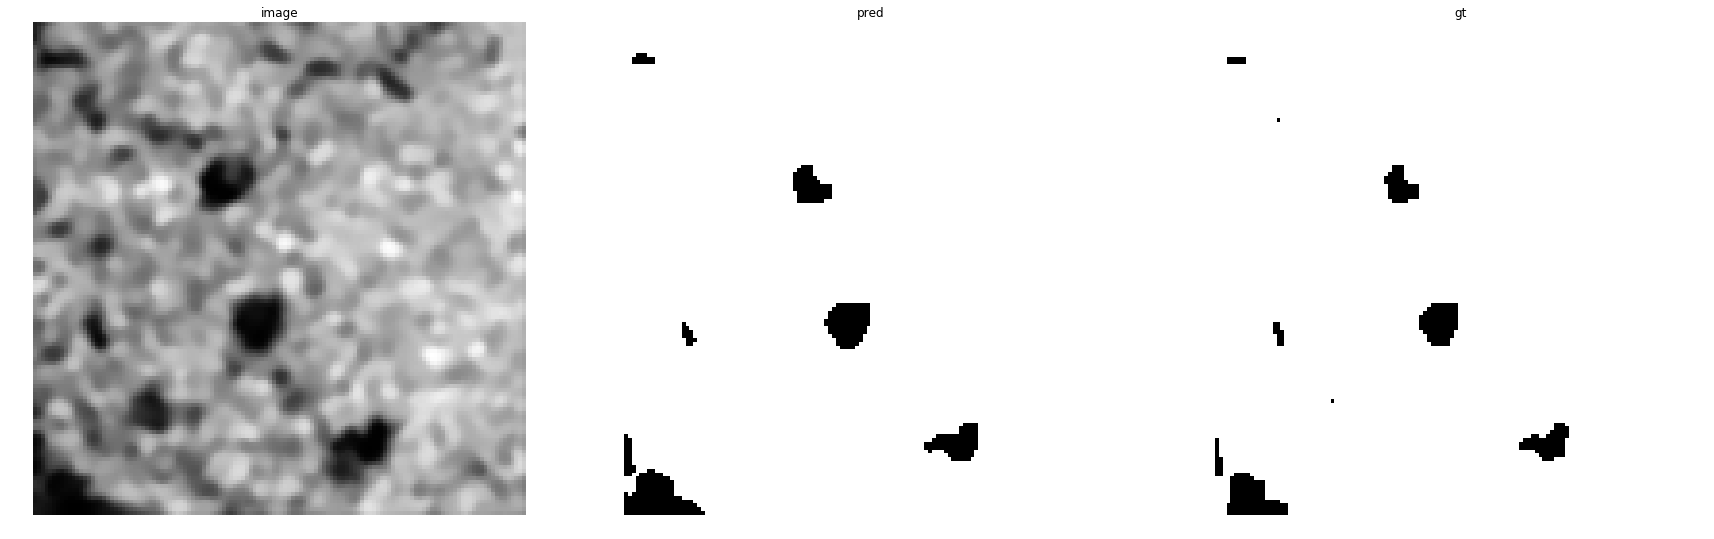

accuracy    : 0.993896484375
precision   : 0.9998114867412341
recall      : 0.9939405297351325
f1          : 0.996867364200238
pr_auc      : 0.9999908296082045
iou         : 0.993754293922928


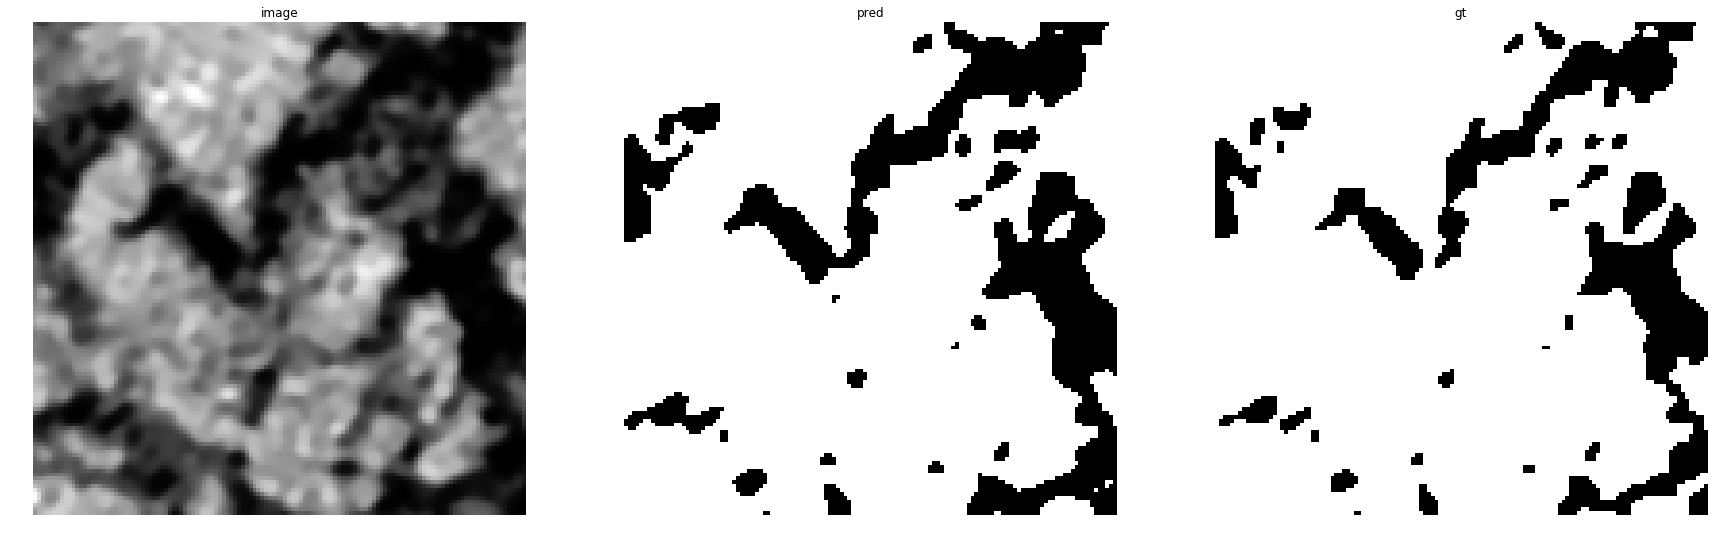

accuracy    : 0.95513916015625
precision   : 0.9999218566851605
recall      : 0.9457501847745751
f1          : 0.9720818931135337
pr_auc      : 0.9995838027627706
iou         : 0.9456802897051215


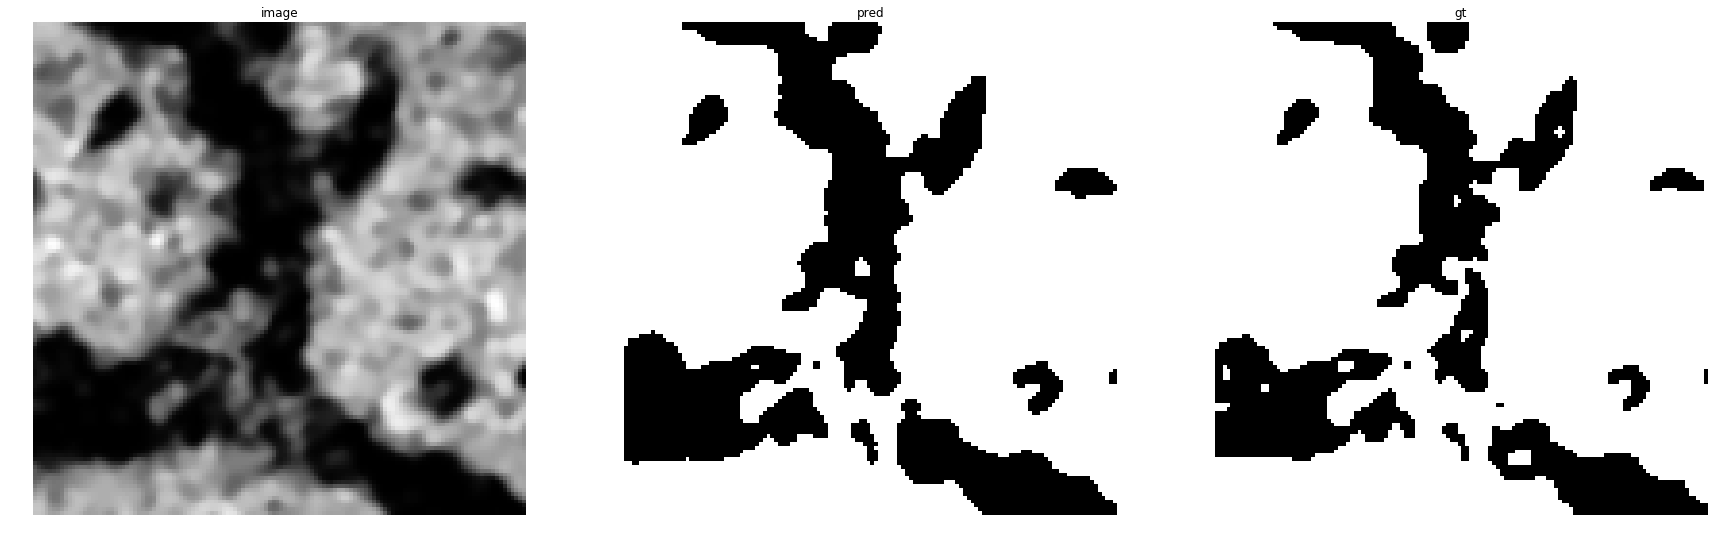

accuracy    : 0.95654296875
precision   : 0.9999150670969934
recall      : 0.9430471002883691
f1          : 0.9706488581086652
pr_auc      : 0.9995705023750576
iou         : 0.9429715658790548


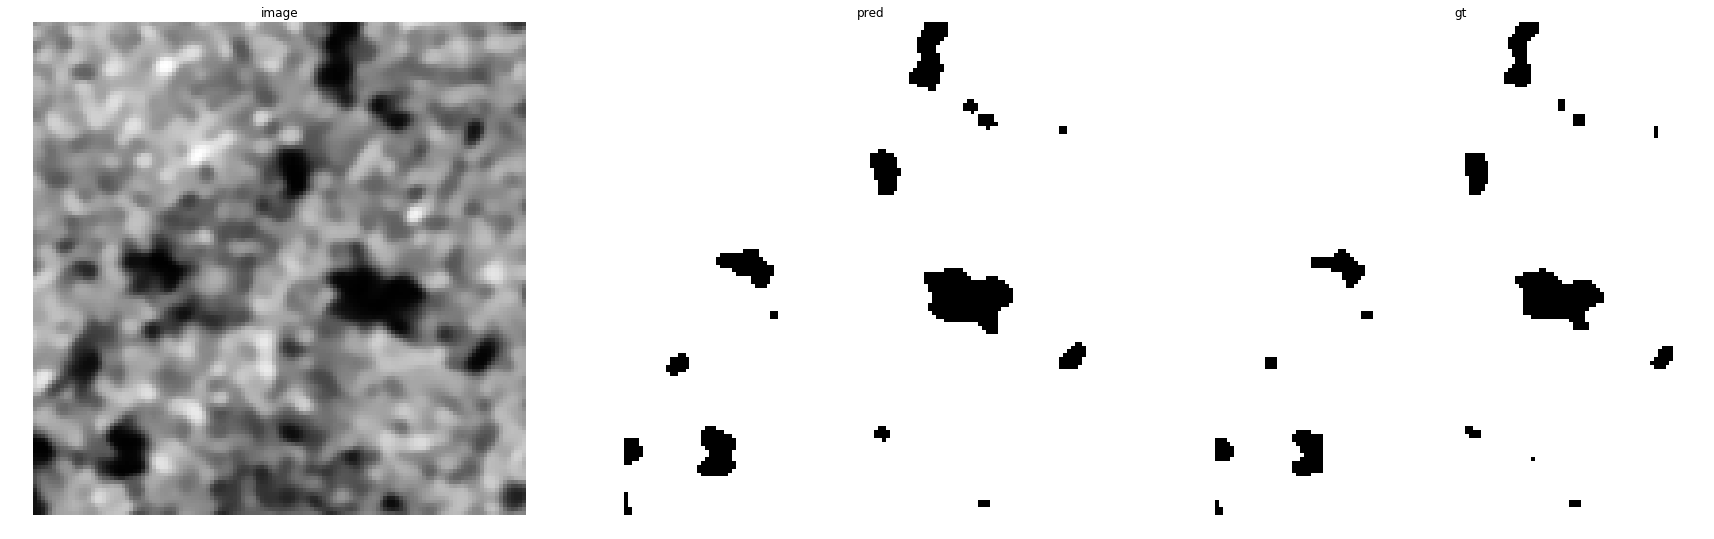

accuracy    : 0.99005126953125
precision   : 0.999679856575746
recall      : 0.9899816118191618
f1          : 0.9948070980279716
pr_auc      : 0.9999851728079874
iou         : 0.9896678498985801


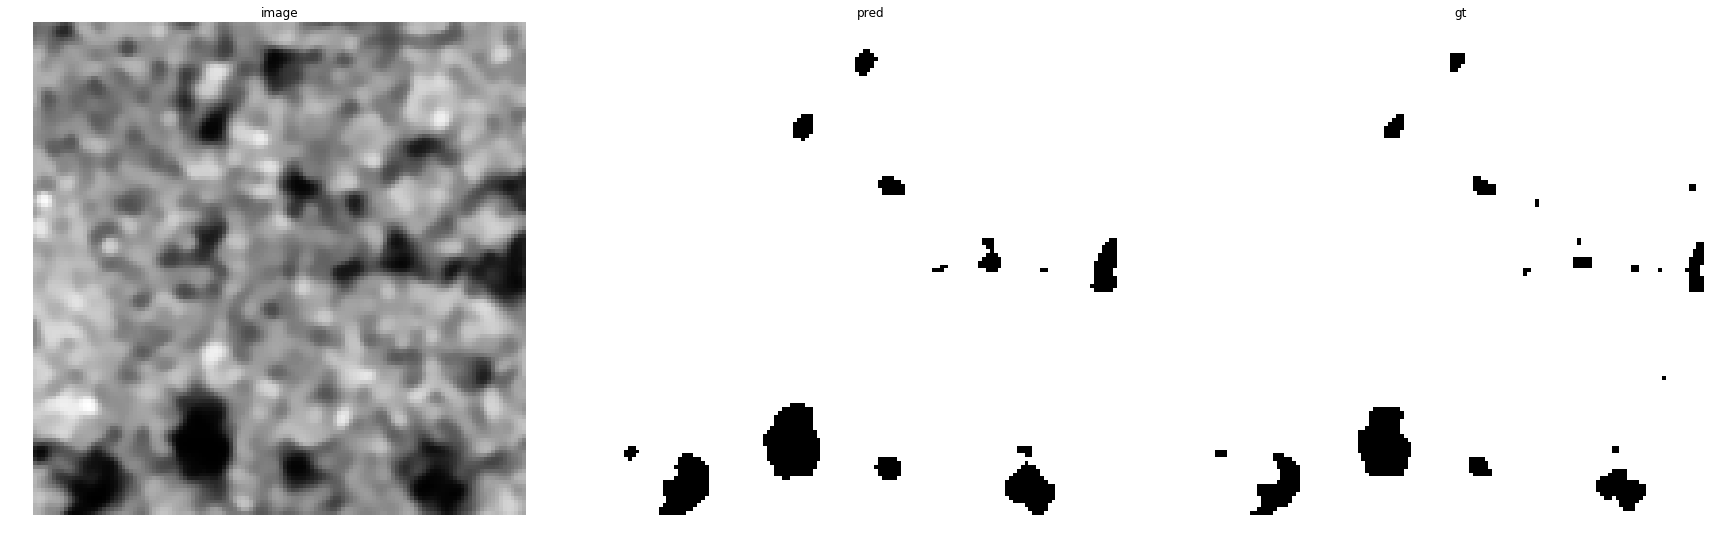

accuracy    : 0.98883056640625
precision   : 0.9992977528089888
recall      : 0.98913112164297
f1          : 0.9941884467591858
pr_auc      : 0.9999640001854907
iou         : 0.9884440515281637


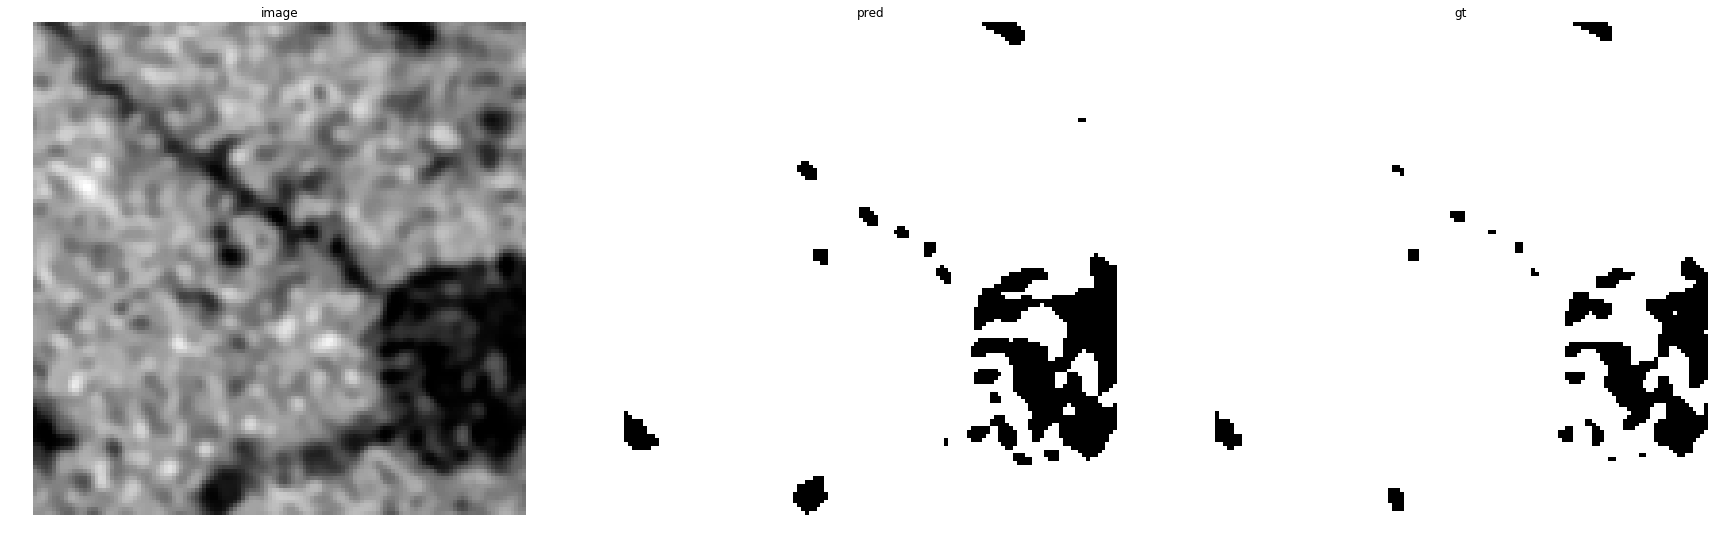

accuracy    : 0.97552490234375
precision   : 1.0
recall      : 0.9740082966035779
f1          : 0.9868330323428008
pr_auc      : 0.9999656921388567
iou         : 0.9740082966035779


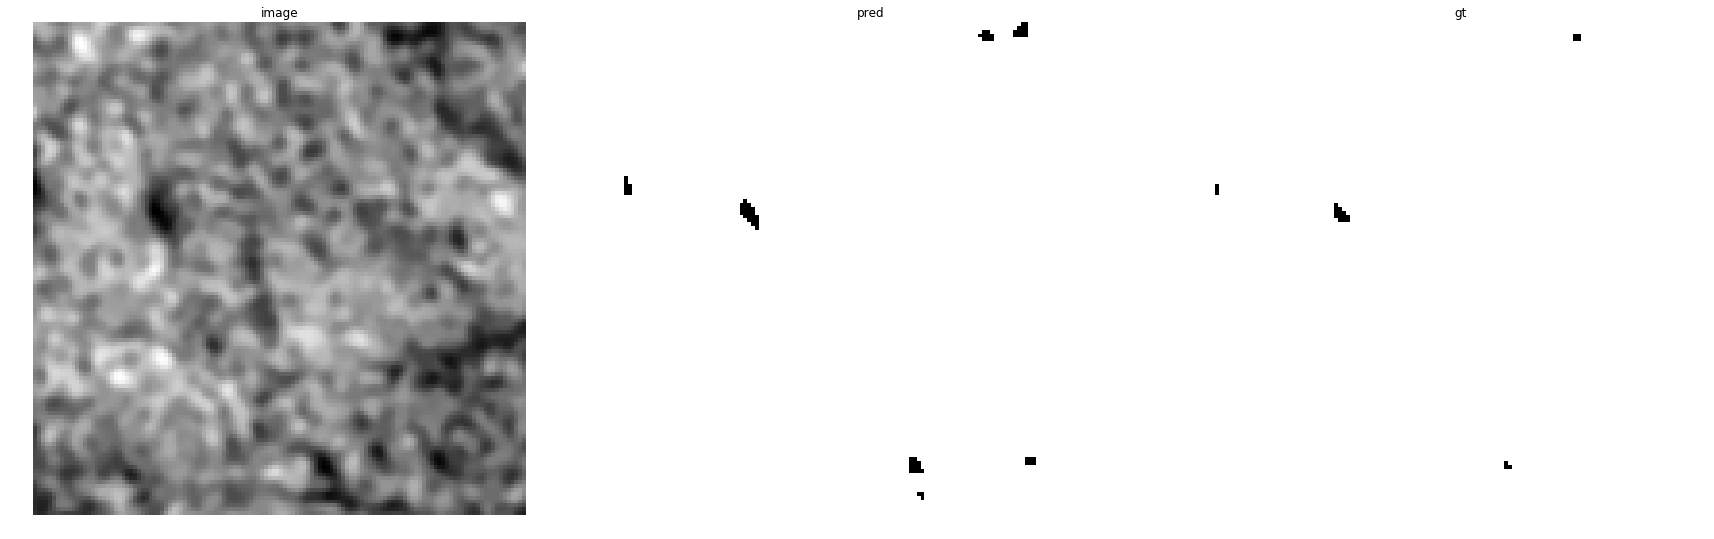

accuracy    : 0.9969482421875
precision   : 1.0
recall      : 0.9969439520811686
f1          : 0.9984696376101861
pr_auc      : 0.9999996674744523
iou         : 0.9969439520811686


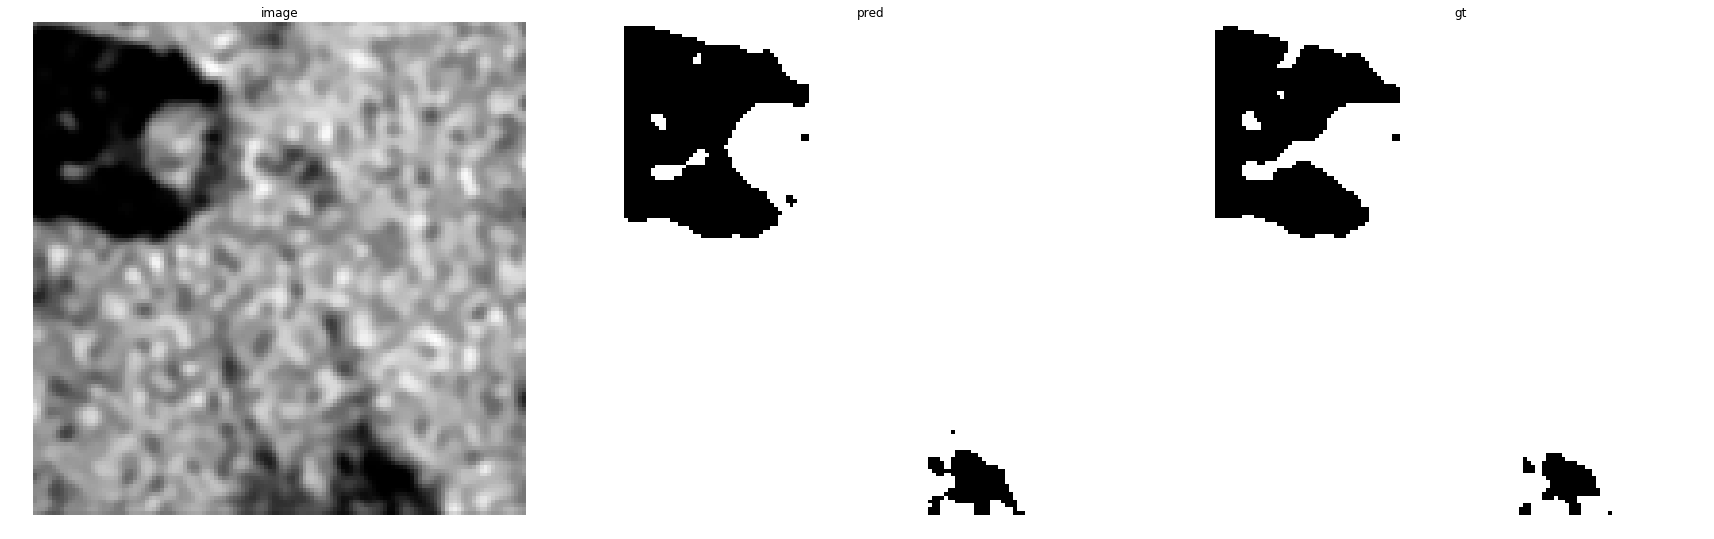

accuracy    : 0.9871826171875
precision   : 1.0
recall      : 0.98565965583174
f1          : 0.992778045257583
pr_auc      : 0.9999790062142426
iou         : 0.98565965583174


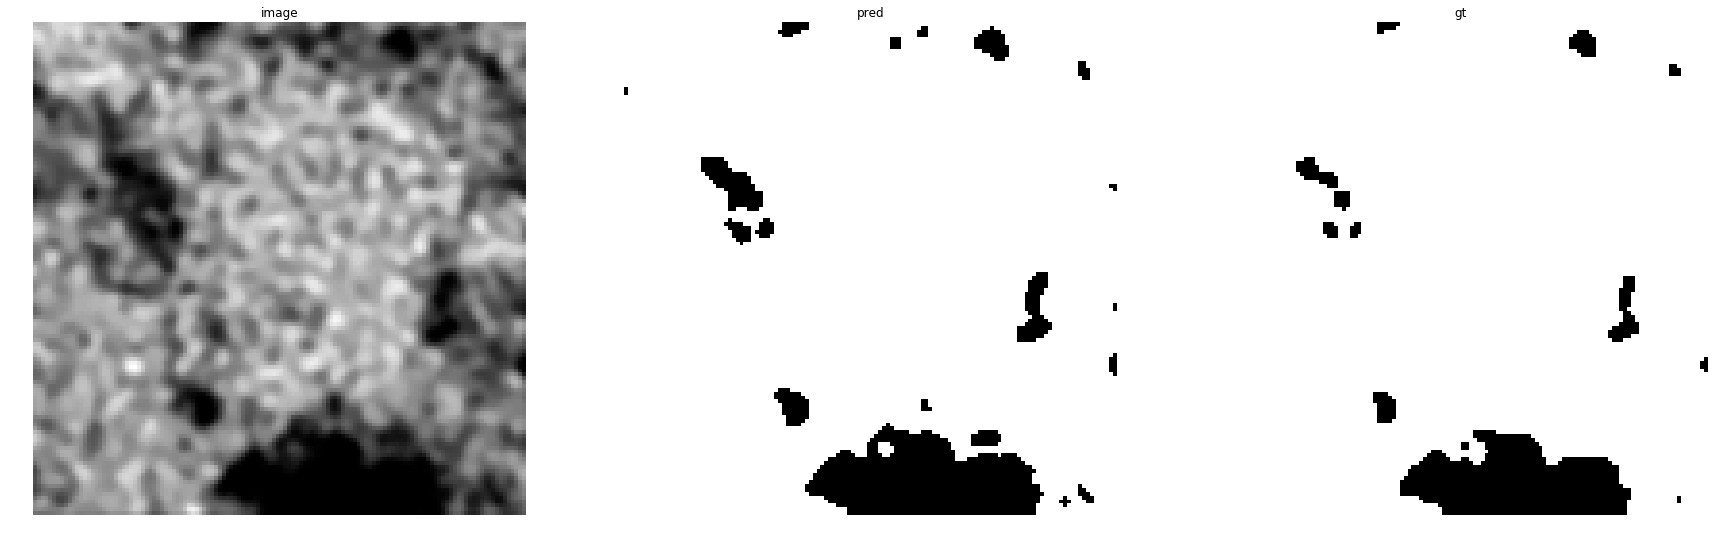

accuracy    : 0.981201171875
precision   : 1.0
recall      : 0.9797780841704419
f1          : 0.9897857663991511
pr_auc      : 0.9999740580410026
iou         : 0.9797780841704419


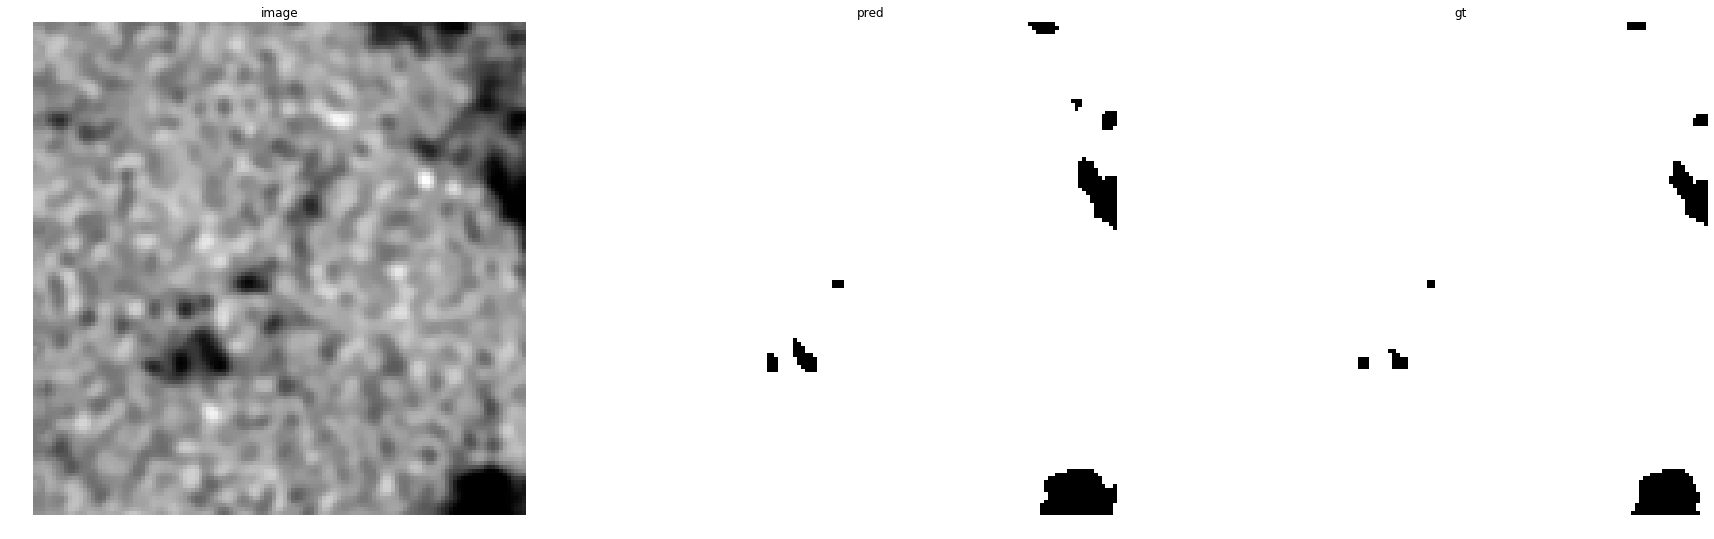

accuracy    : 0.9947509765625
precision   : 1.0
recall      : 0.9946487461887873
f1          : 0.9973171949089094
pr_auc      : 0.9999977337764723
iou         : 0.9946487461887873


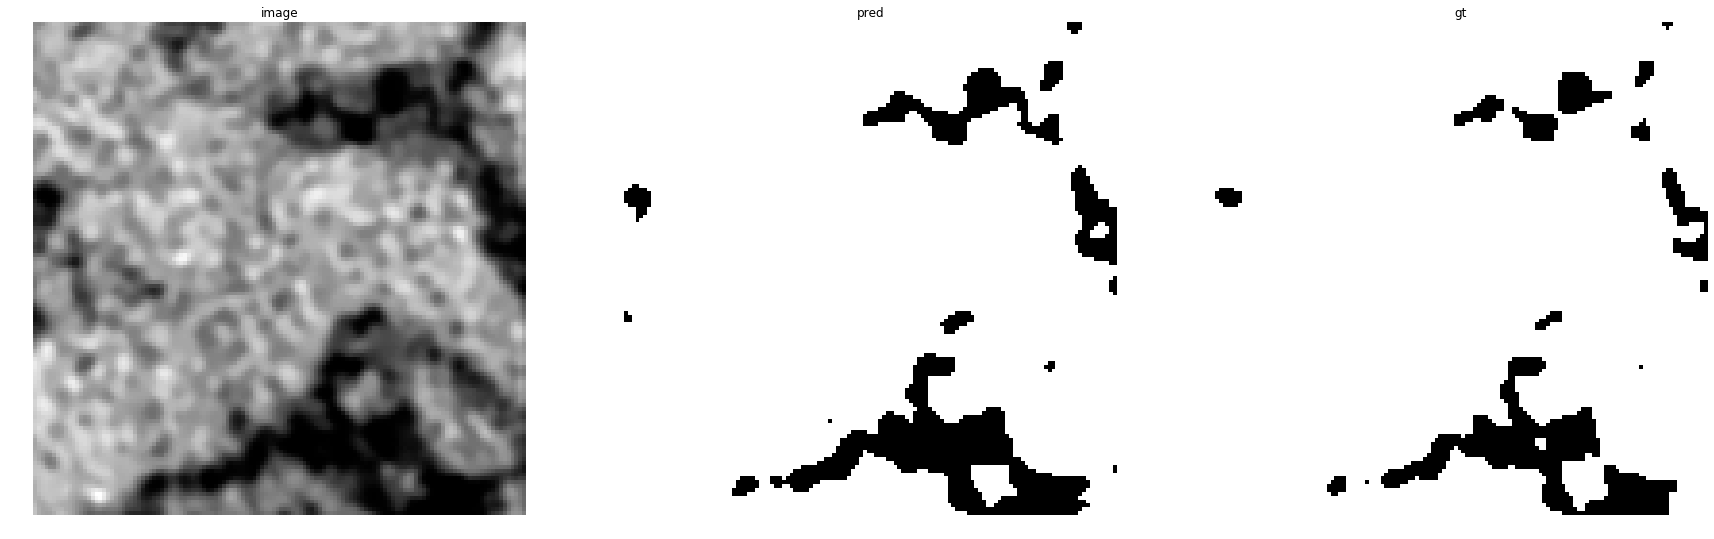

accuracy    : 0.97412109375
precision   : 1.0
recall      : 0.9717953834896561
f1          : 0.9856959719317184
pr_auc      : 0.9999399171780524
iou         : 0.9717953834896561


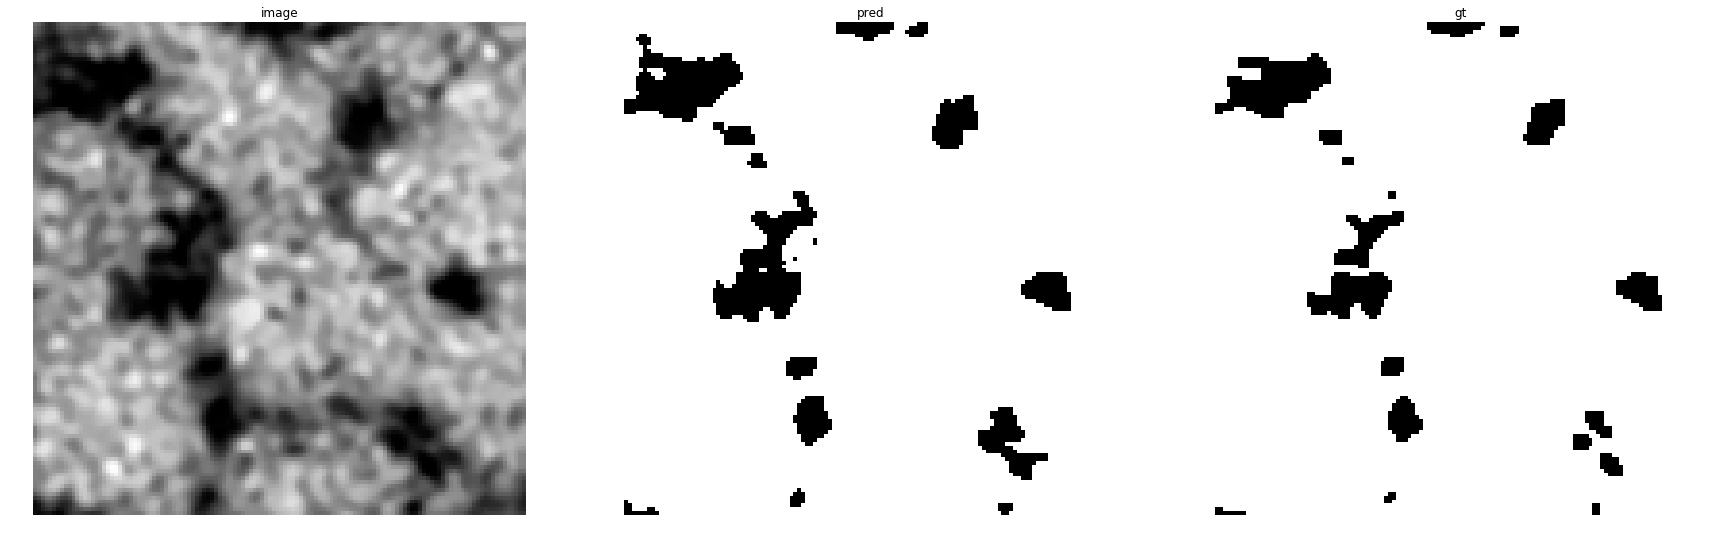

accuracy    : 0.97772216796875
precision   : 1.0
recall      : 0.9761609300502906
f1          : 0.9879366758105561
pr_auc      : 0.9999542423684669
iou         : 0.9761609300502906


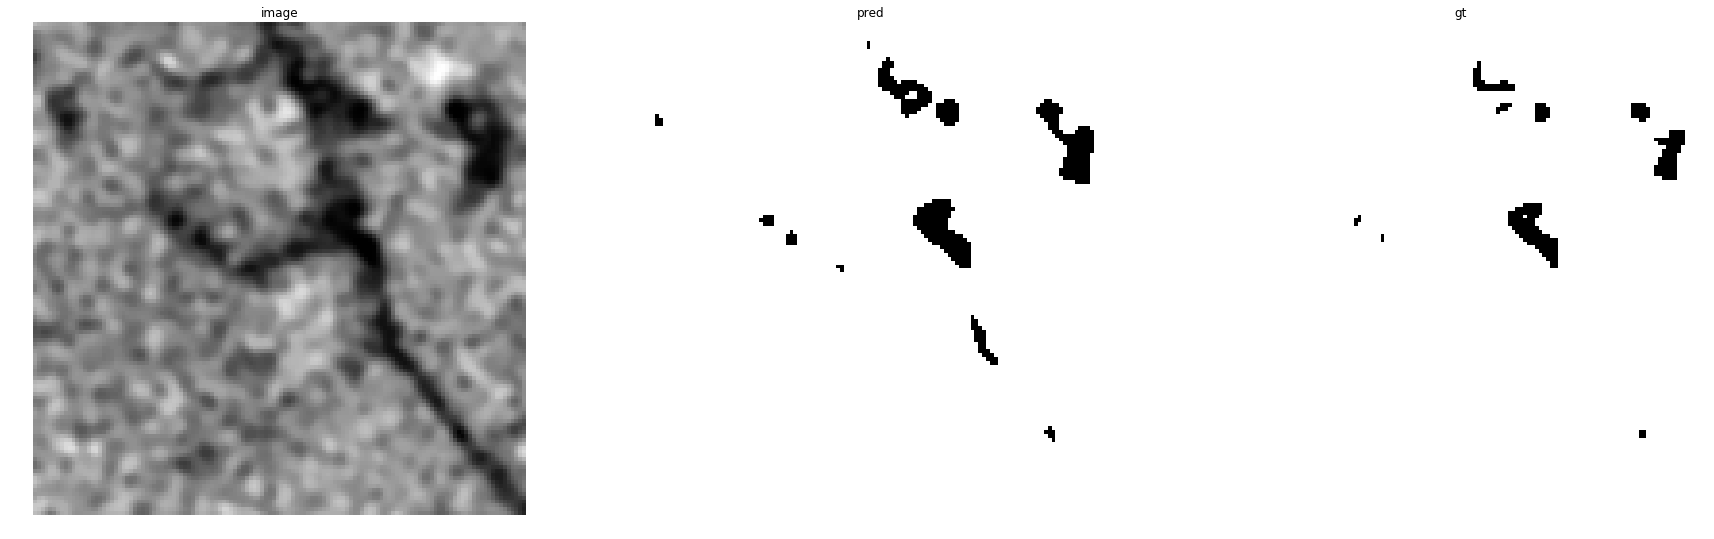

accuracy    : 0.98687744140625
precision   : 1.0
recall      : 0.9866650127147554
f1          : 0.9932877524897755
pr_auc      : 0.9999904572512952
iou         : 0.9866650127147554


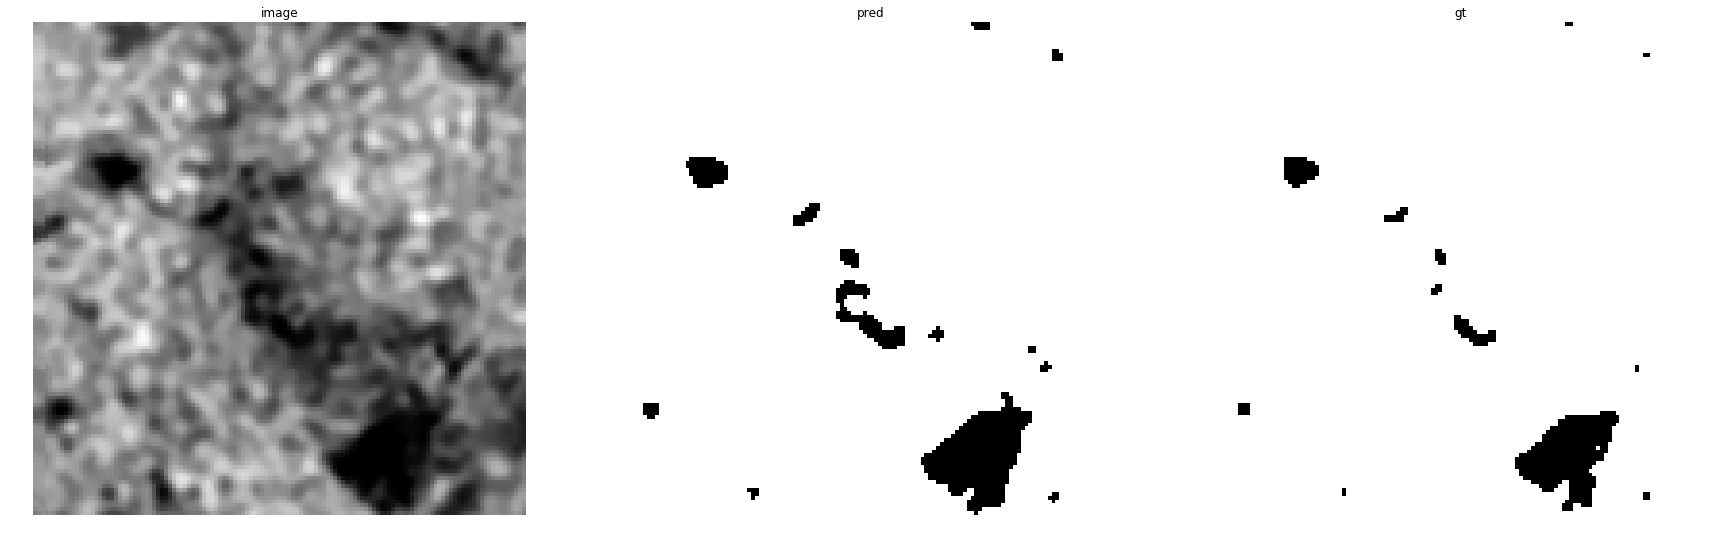

accuracy    : 0.98614501953125
precision   : 1.0
recall      : 0.9856782334384858
f1          : 0.9927874686238998
pr_auc      : 0.9999859897489606
iou         : 0.9856782334384858


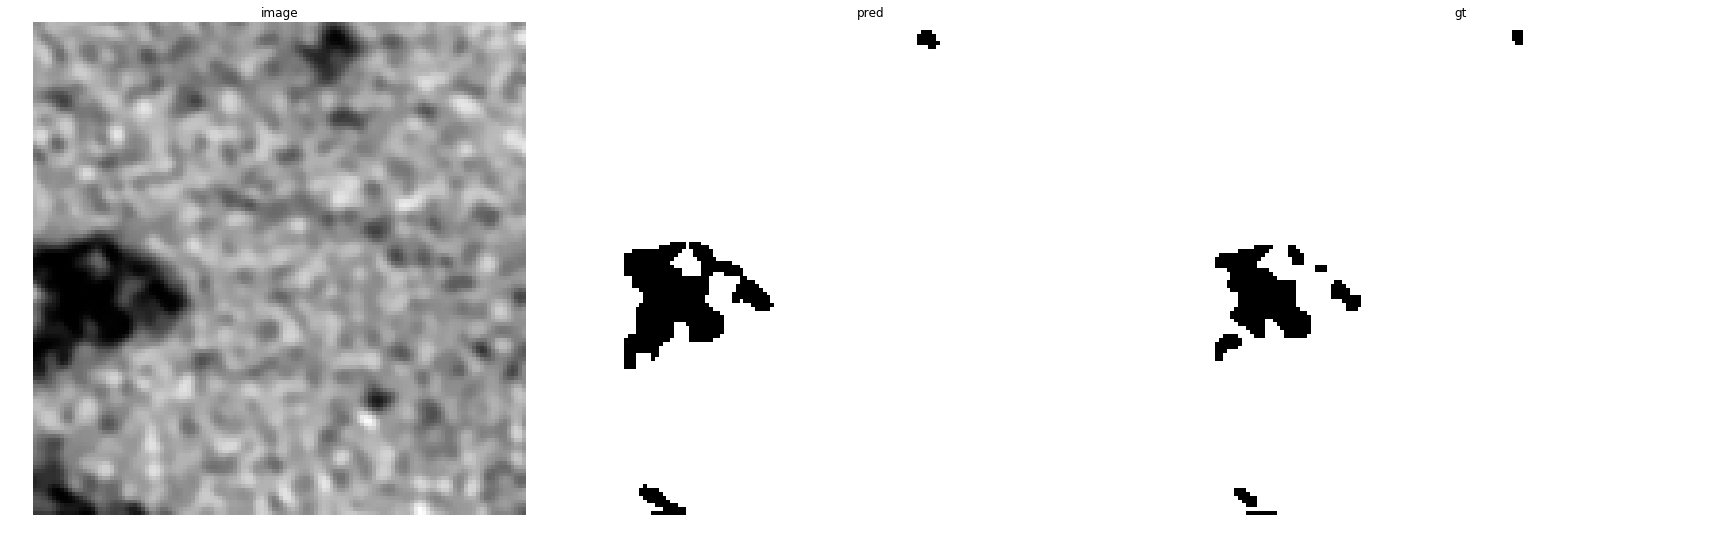

accuracy    : 0.98748779296875
precision   : 1.0
recall      : 0.9871295831240583
f1          : 0.9935231114340779
pr_auc      : 0.99998983033231
iou         : 0.9871295831240583


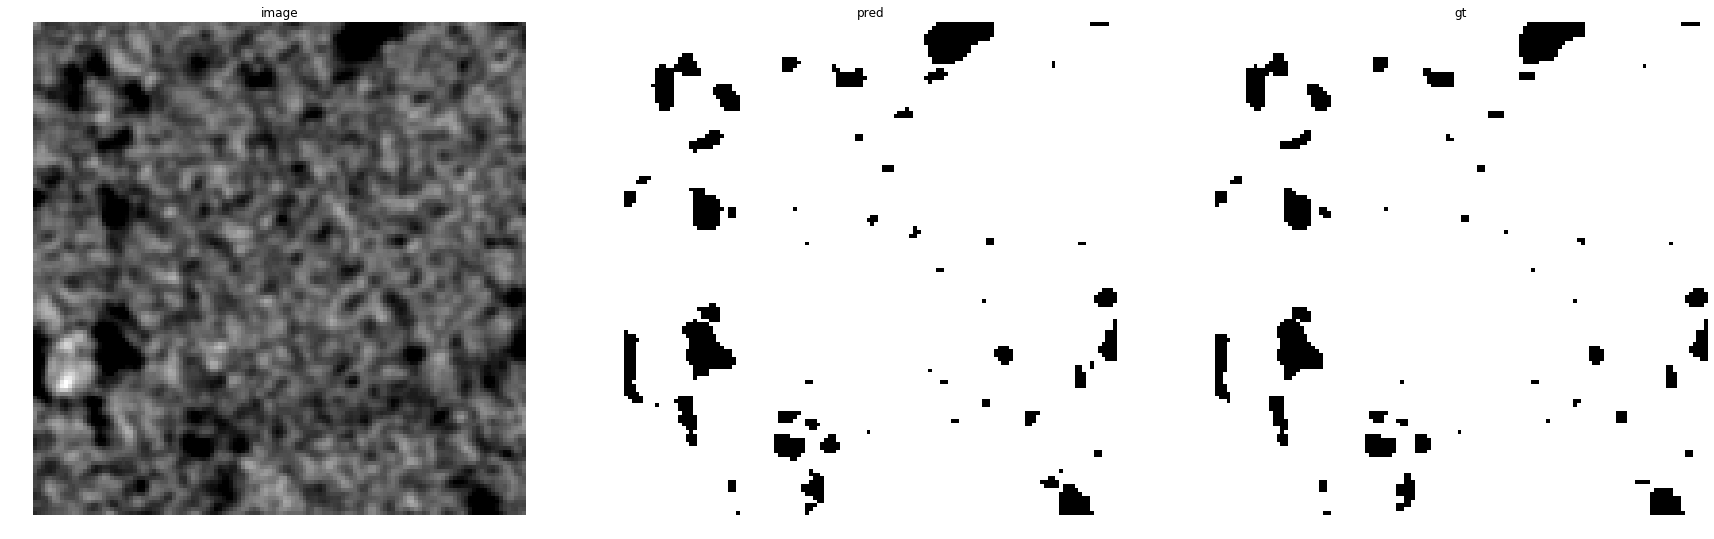

accuracy    : 0.99127197265625
precision   : 0.99908622152601
recall      : 0.9916429126716766
f1          : 0.9953506518841239
pr_auc      : 0.9999685050471996
iou         : 0.9907443365695793


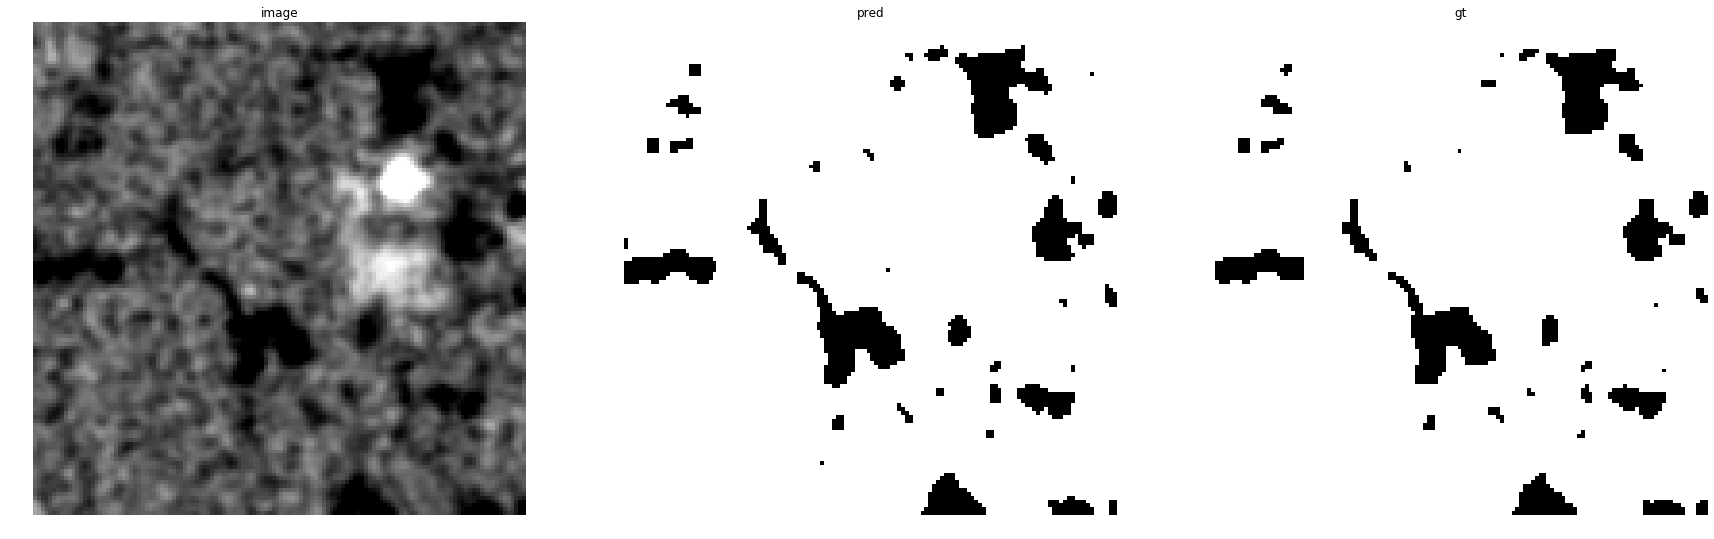

accuracy    : 0.9908447265625
precision   : 0.9993944694879903
recall      : 0.990596865621874
f1          : 0.9949762207783509
pr_auc      : 0.9999665893993269
iou         : 0.9900026659557452


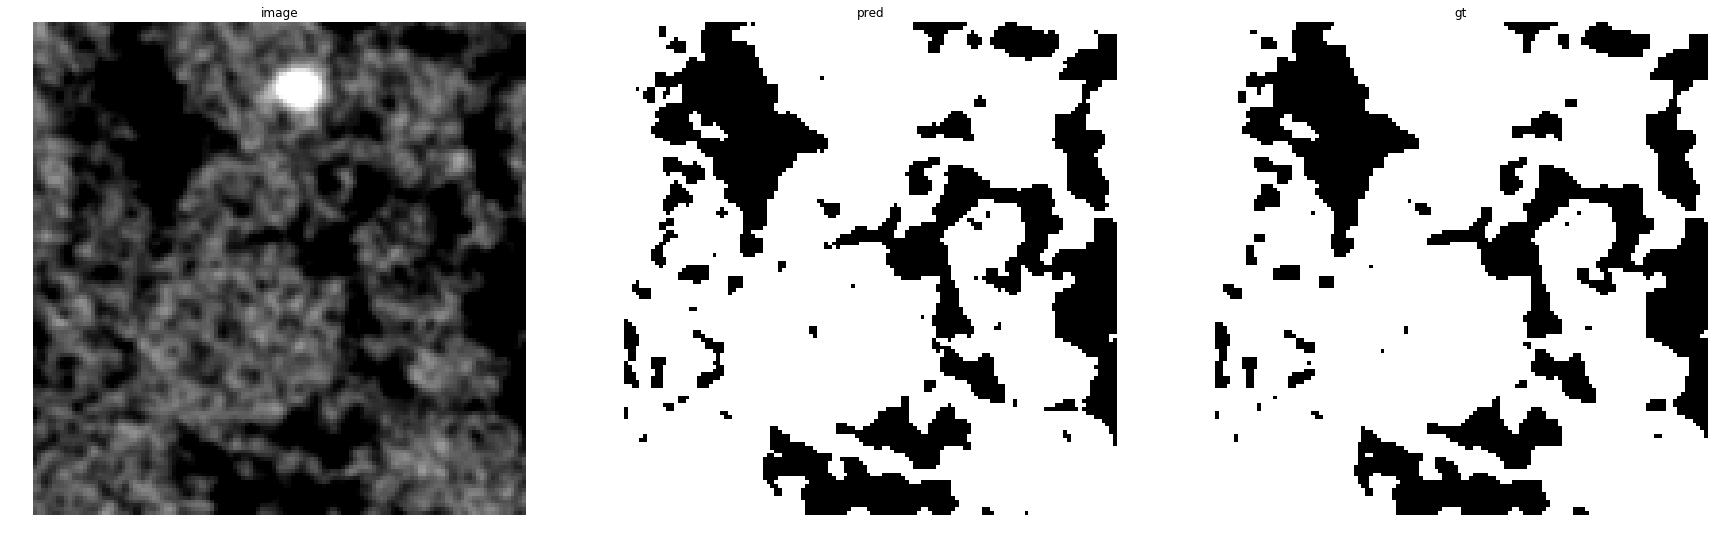

accuracy    : 0.97802734375
precision   : 0.9961737947453447
recall      : 0.9738176377690965
f1          : 0.9848688634835238
pr_auc      : 0.9996481581167155
iou         : 0.9701888042398145


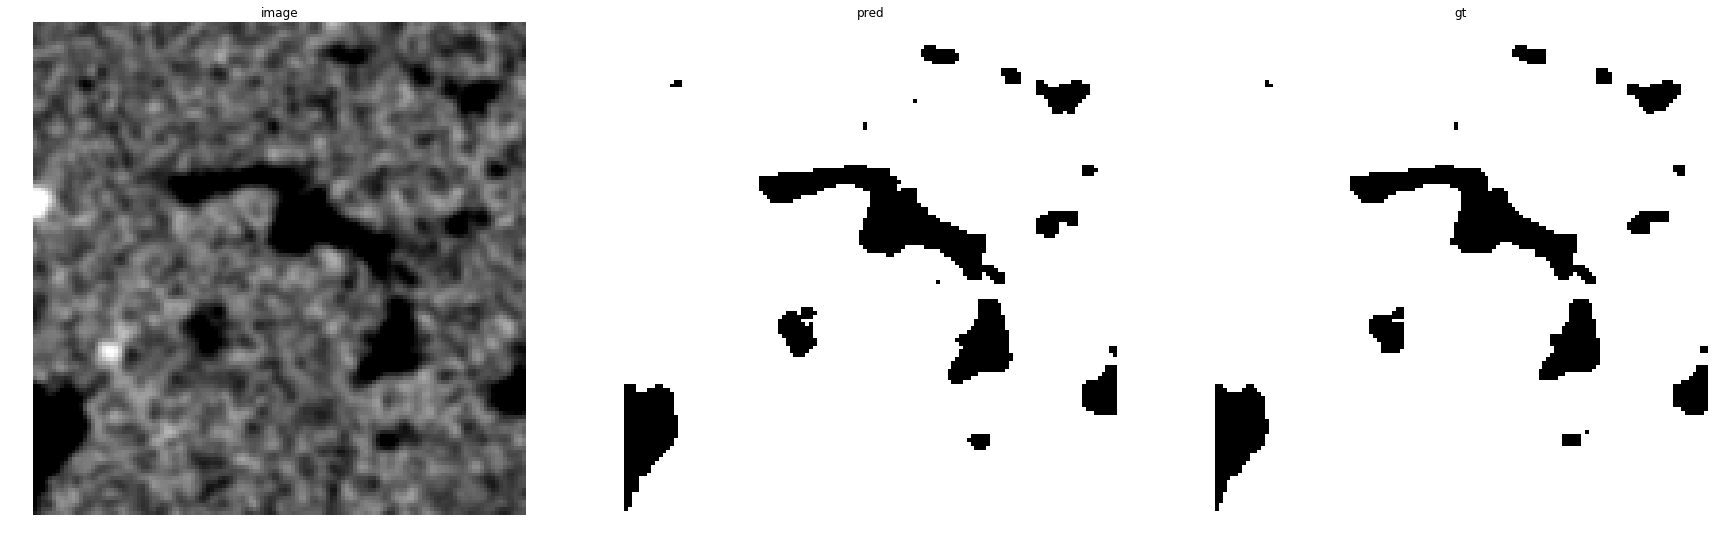

accuracy    : 0.99334716796875
precision   : 0.9997976664193701
recall      : 0.9929002009377094
f1          : 0.9963369963369965
pr_auc      : 0.9999914484594996
iou         : 0.9927007299270073


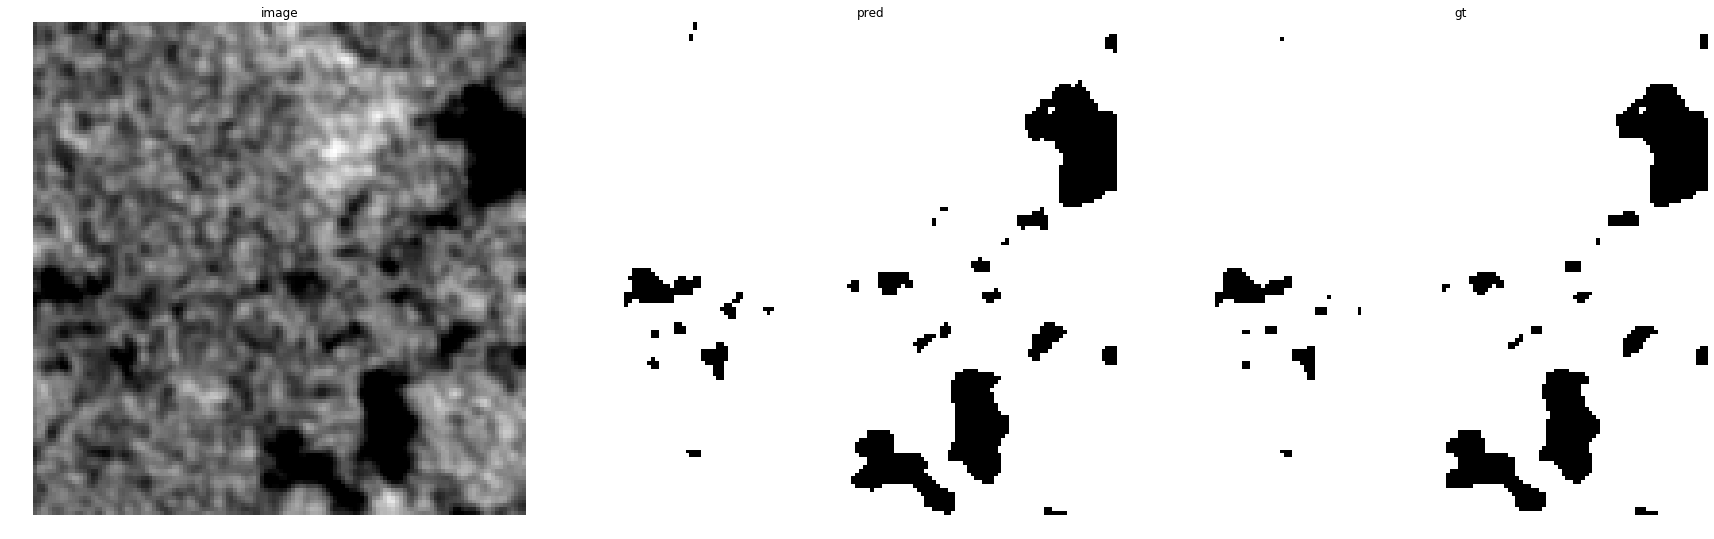

accuracy    : 0.99176025390625
precision   : 0.9997982786444325
recall      : 0.9912005866275582
f1          : 0.9954808690121514
pr_auc      : 0.9999853107973776
iou         : 0.9910023993601706


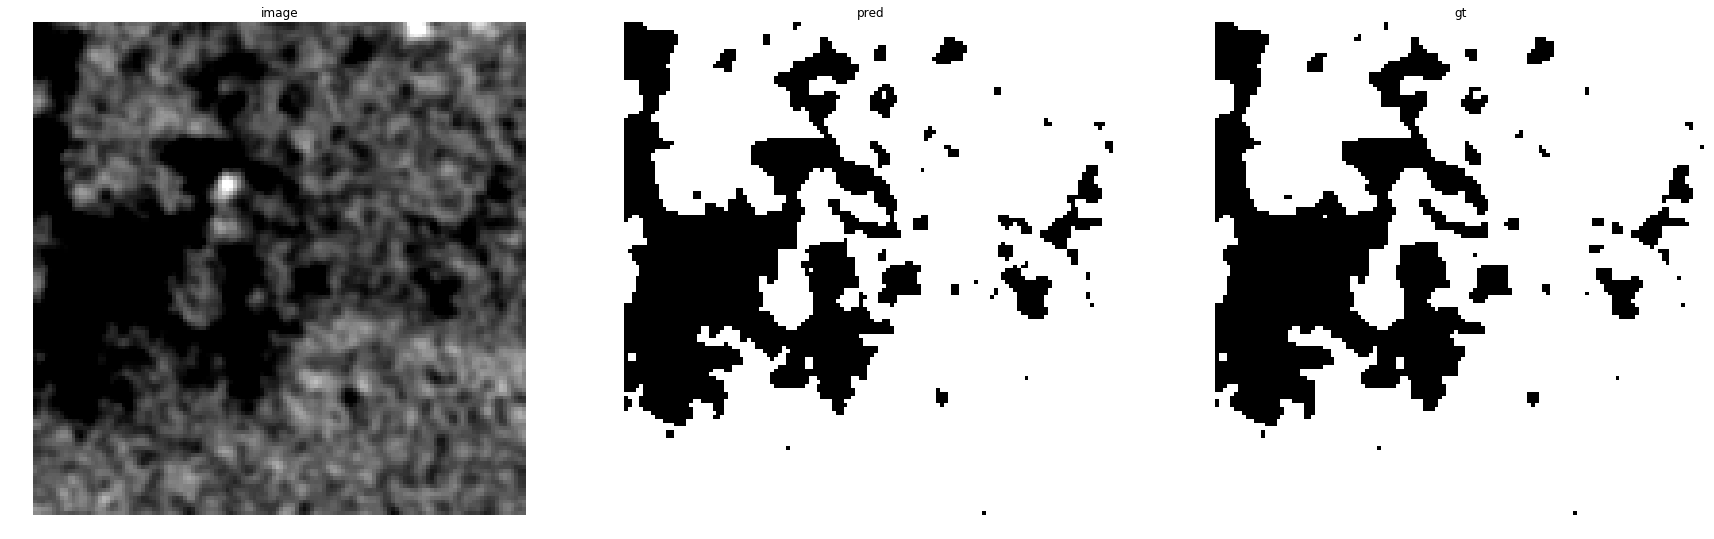

accuracy    : 0.9837646484375
precision   : 0.9983645432987162
recall      : 0.9802488960256925
f1          : 0.9892237886890294
pr_auc      : 0.9998383786093414
iou         : 0.9786773547094189


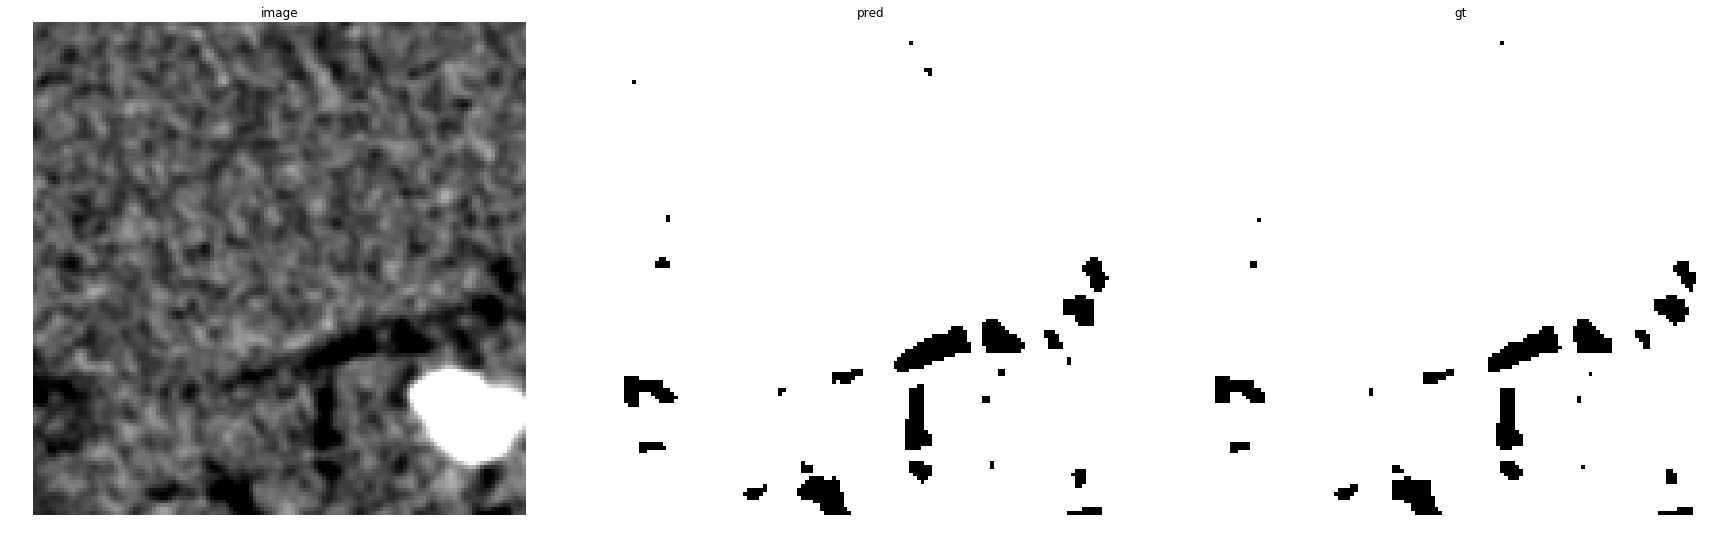

accuracy    : 0.9945068359375
precision   : 0.999681812396589
recall      : 0.9946182094466253
f1          : 0.9971435825822014
pr_auc      : 0.999991542771423
iou         : 0.9943034369263878


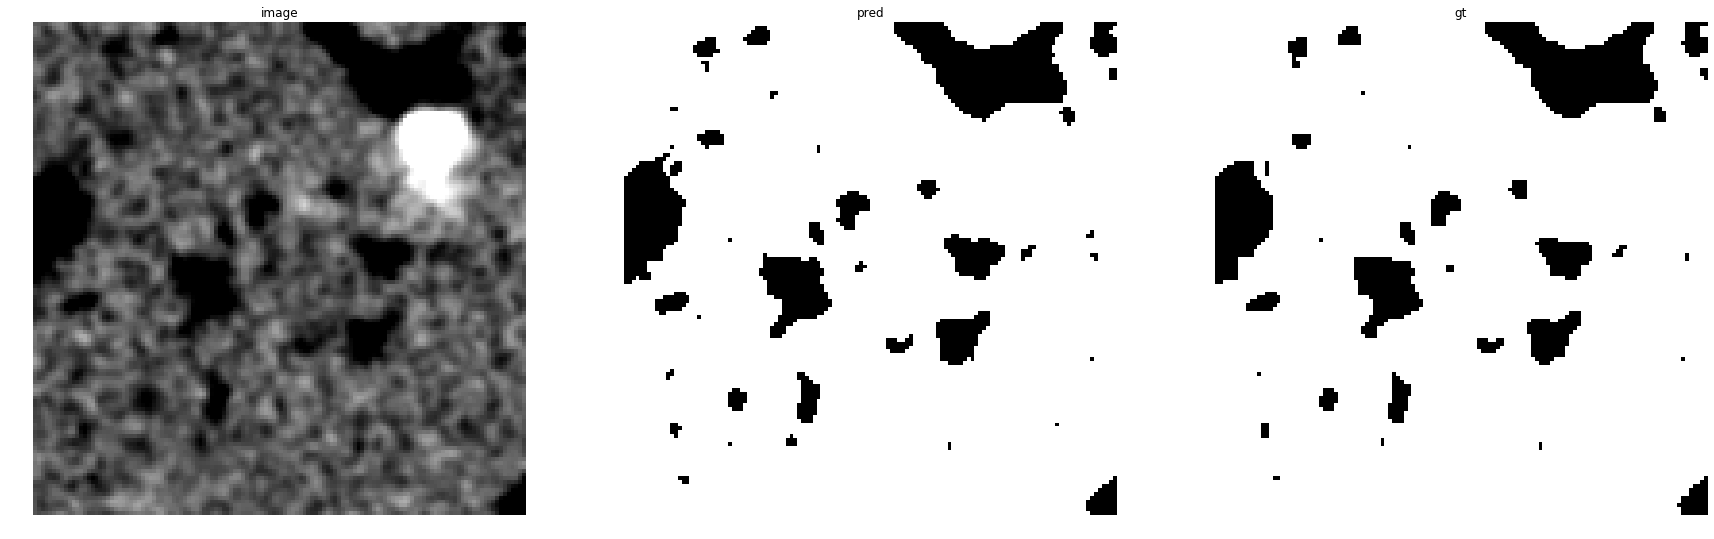

accuracy    : 0.9906005859375
precision   : 0.999163529903806
recall      : 0.9901906604034264
f1          : 0.9946568593435571
pr_auc      : 0.9999751058688017
iou         : 0.9893705135284373


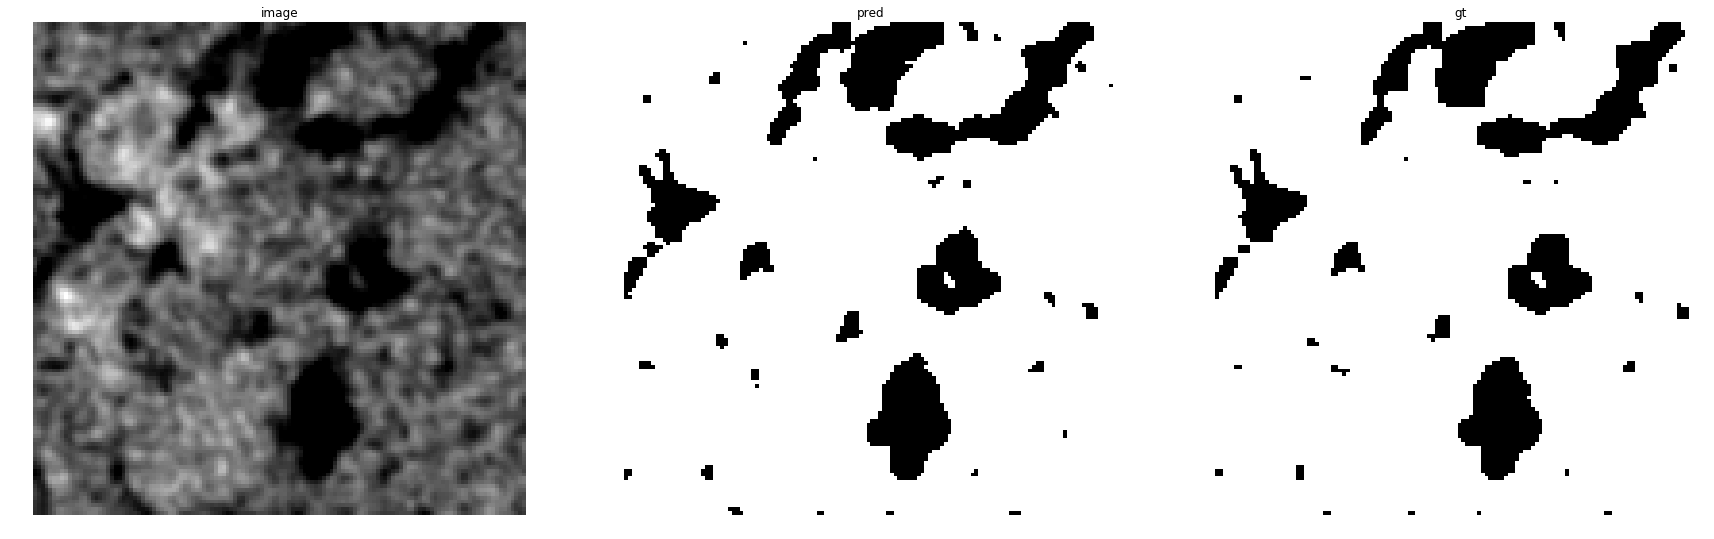

accuracy    : 0.98797607421875
precision   : 0.9991428571428571
recall      : 0.986947011924081
f1          : 0.9930074894402441
pr_auc      : 0.9999406925296678
iou         : 0.986112090236165


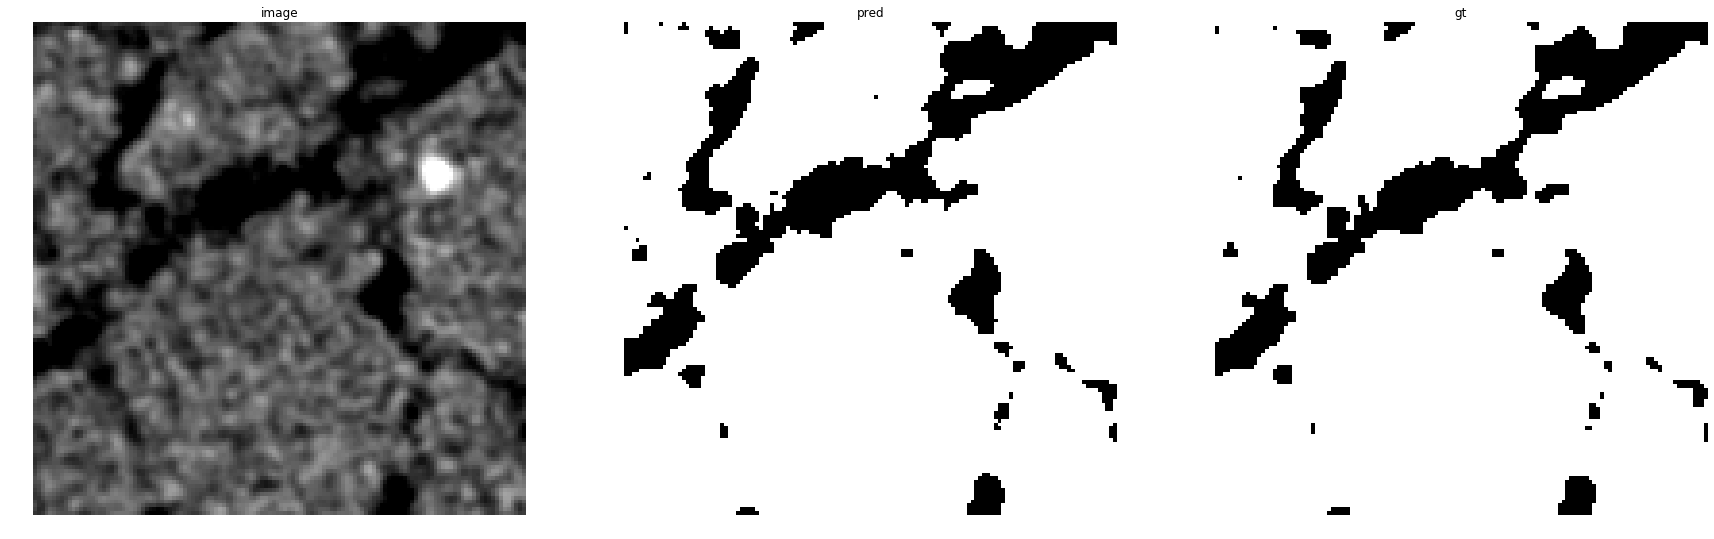

accuracy    : 0.98541259765625
precision   : 0.9986247828604516
recall      : 0.984304772775915
f1          : 0.9914130708152195
pr_auc      : 0.9999130754746955
iou         : 0.9829723567968082


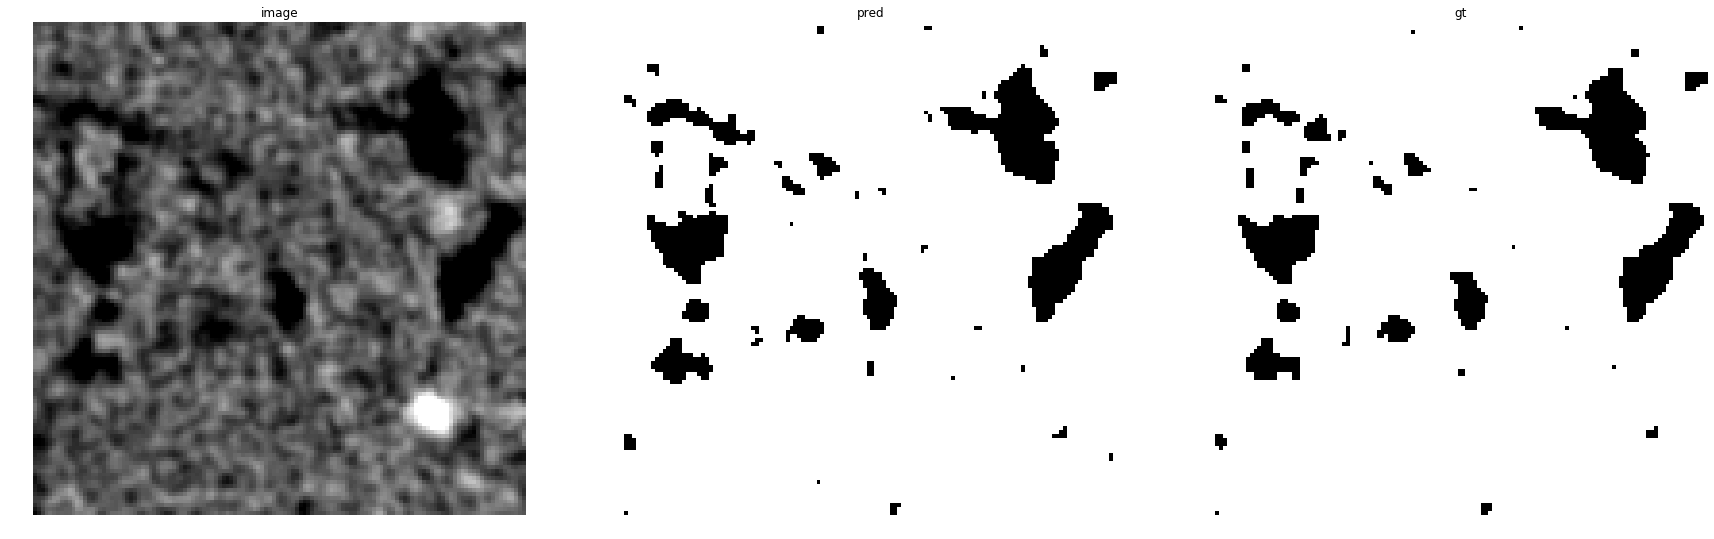

accuracy    : 0.990234375
precision   : 0.9992554487613375
recall      : 0.9900080472103004
f1          : 0.9946102539917807
pr_auc      : 0.9999722508241591
iou         : 0.9892782952489446


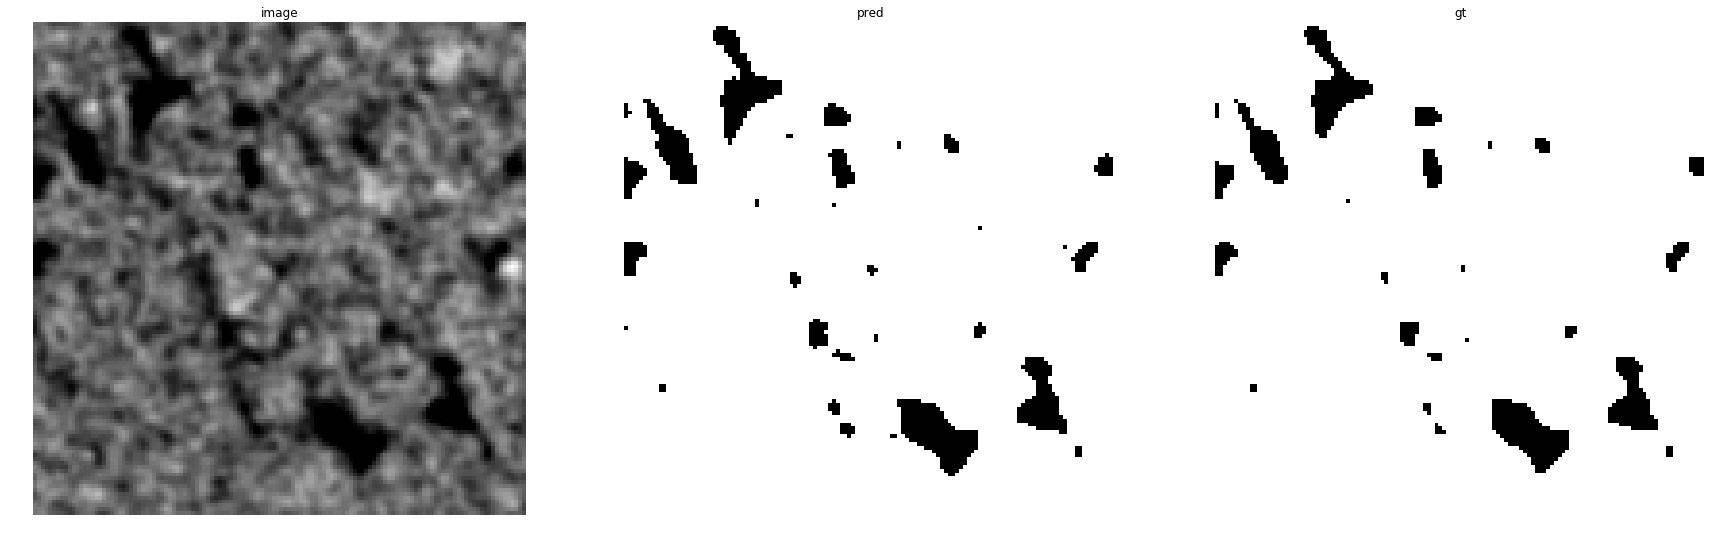

accuracy    : 0.99249267578125
precision   : 0.9997392268074842
recall      : 0.9922997282257021
f1          : 0.9960055856850583
pr_auc      : 0.9999876401554654
iou         : 0.9920429551041532


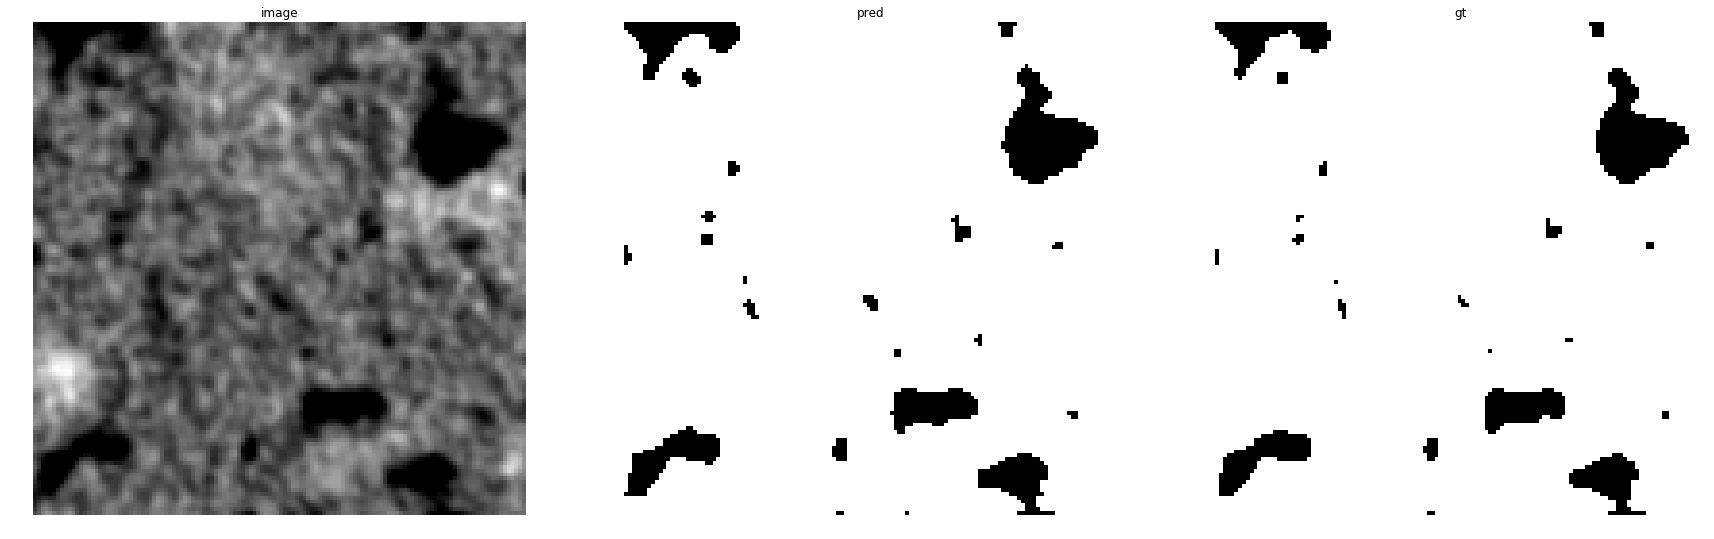

accuracy    : 0.9930419921875
precision   : 0.9998010741993236
recall      : 0.9926920797945882
f1          : 0.9962338949454905
pr_auc      : 0.9999903601664956
iou         : 0.9924960505529226


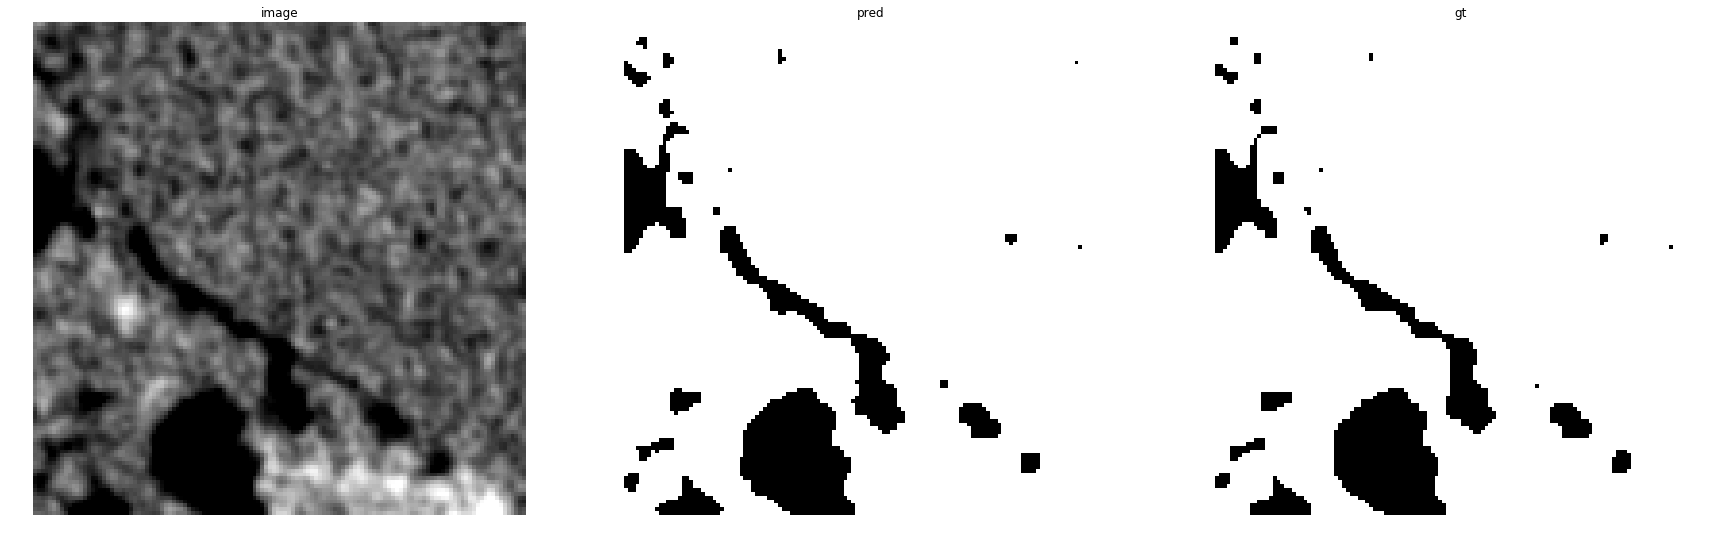

accuracy    : 0.992919921875
precision   : 0.9994526920708764
recall      : 0.9926615478698104
f1          : 0.996045544419445
pr_auc      : 0.9999788505380904
iou         : 0.9921222410865874


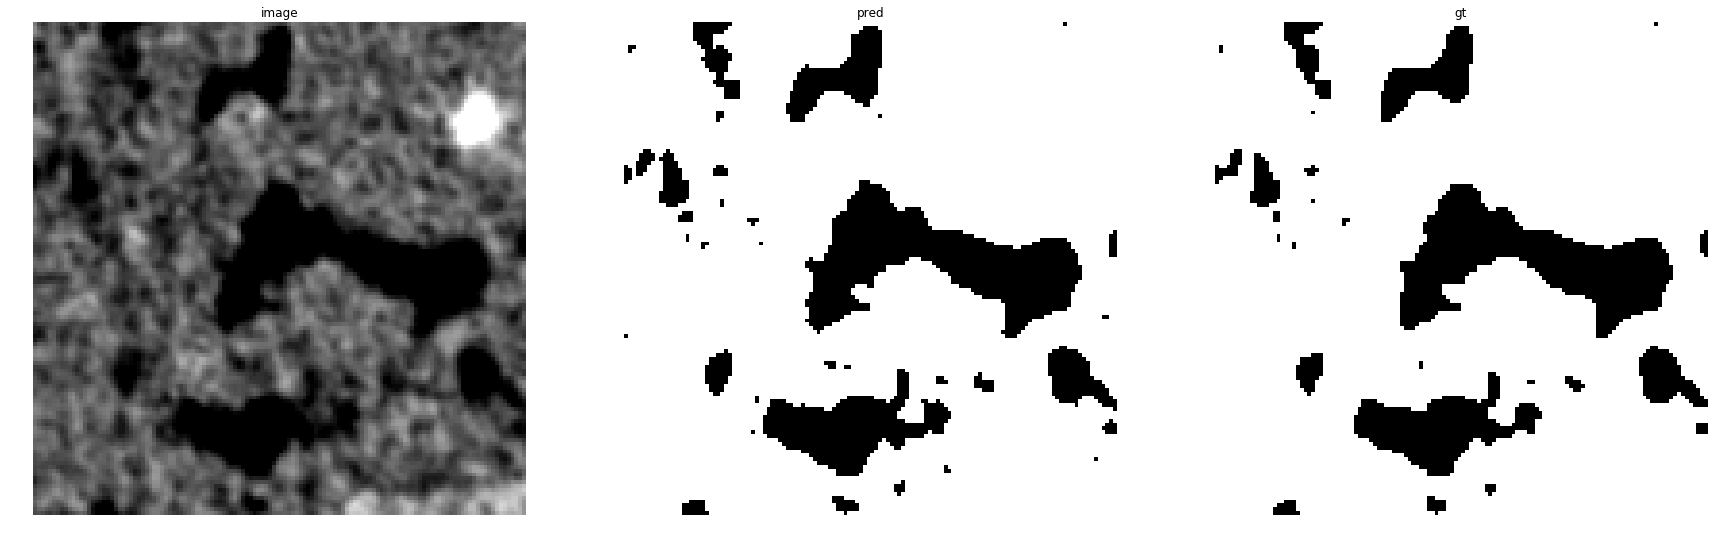

accuracy    : 0.99005126953125
precision   : 0.9995587261896006
recall      : 0.988580157113762
f1          : 0.9940391296397879
pr_auc      : 0.999957995056362
iou         : 0.98814890213756


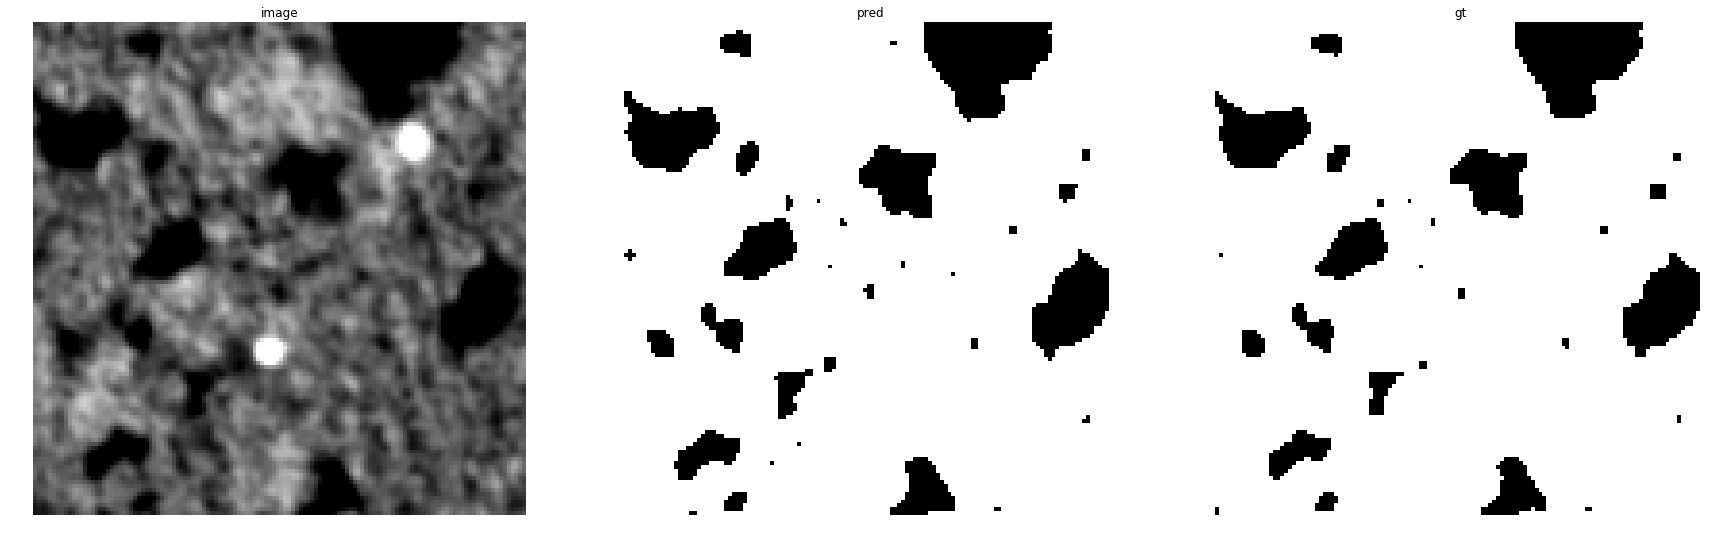

accuracy    : 0.98992919921875
precision   : 0.9998573975044563
recall      : 0.9885097983927816
f1          : 0.9941512176101521
pr_auc      : 0.999971883455161
iou         : 0.9883704539047082


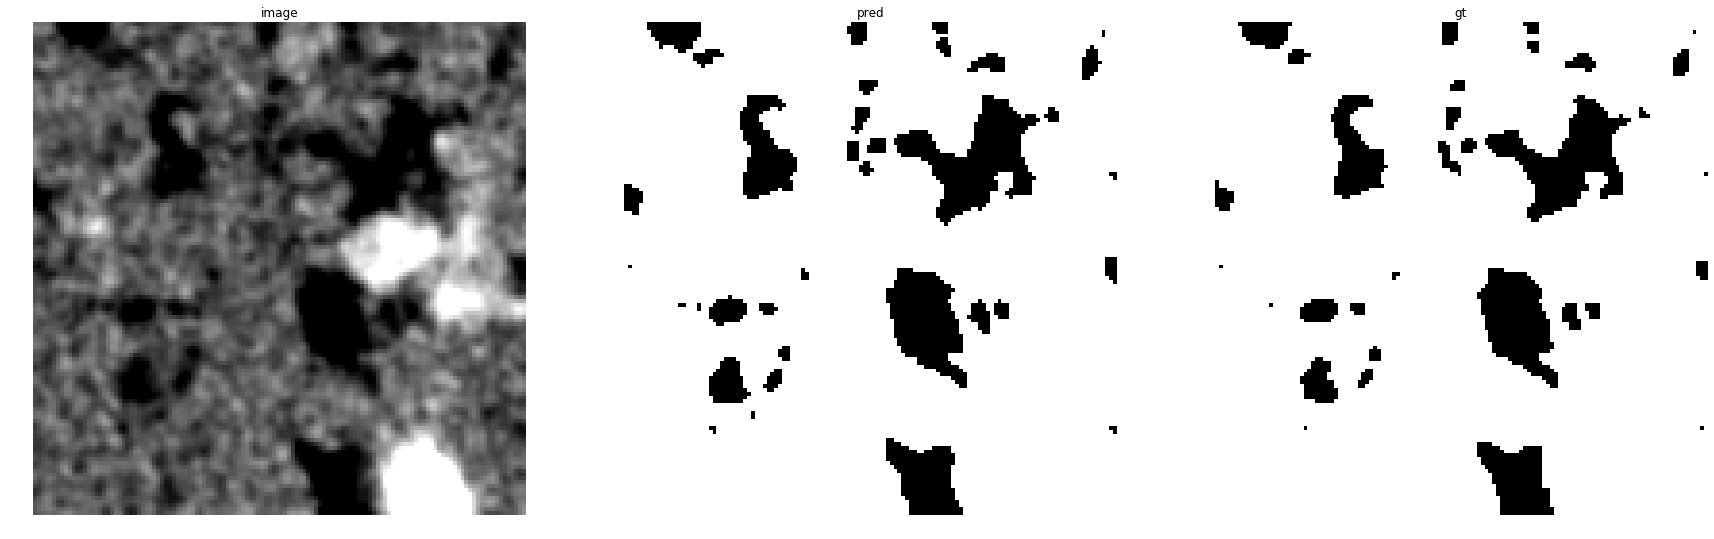

accuracy    : 0.987060546875
precision   : 0.9990222098058388
recall      : 0.9863467107985106
f1          : 0.9926439972241499
pr_auc      : 0.9999481928506027
iou         : 0.9853954257371177


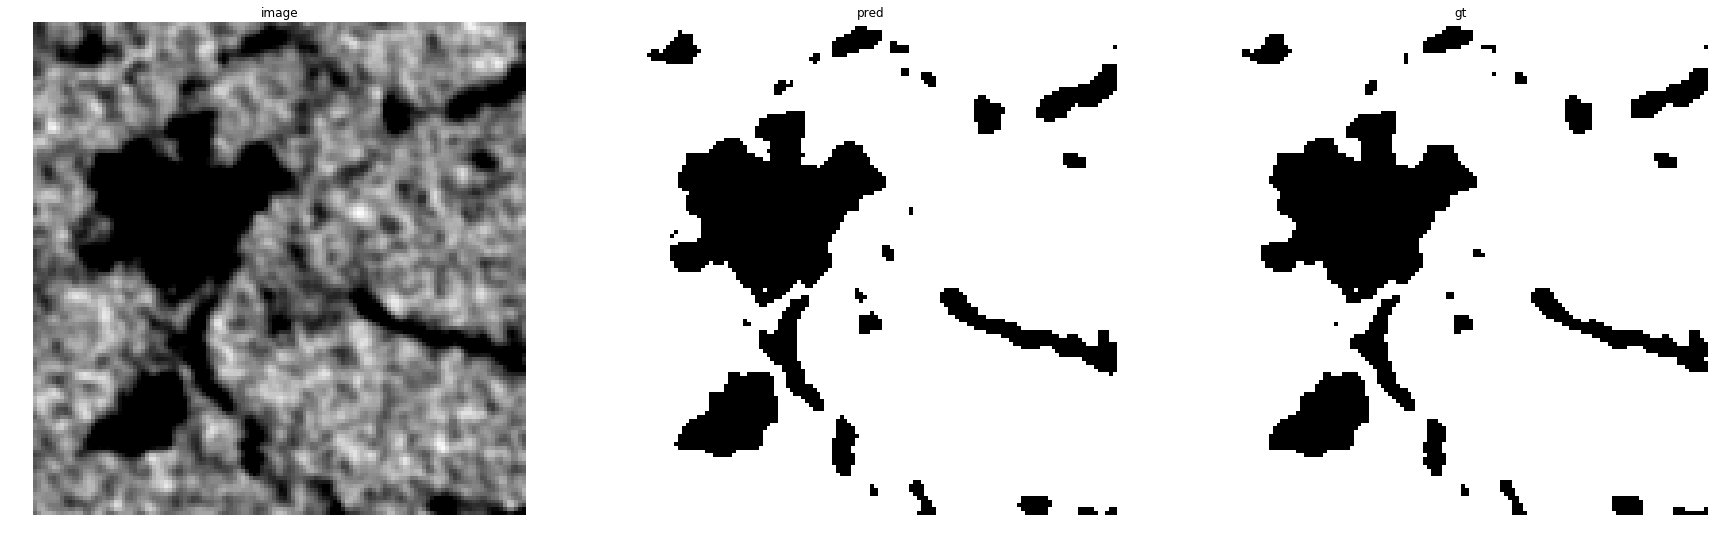

accuracy    : 0.9886474609375
precision   : 0.999251328891218
recall      : 0.9869851364342231
f1          : 0.9930803571428571
pr_auc      : 0.9999513604934188
iou         : 0.9862558191088451


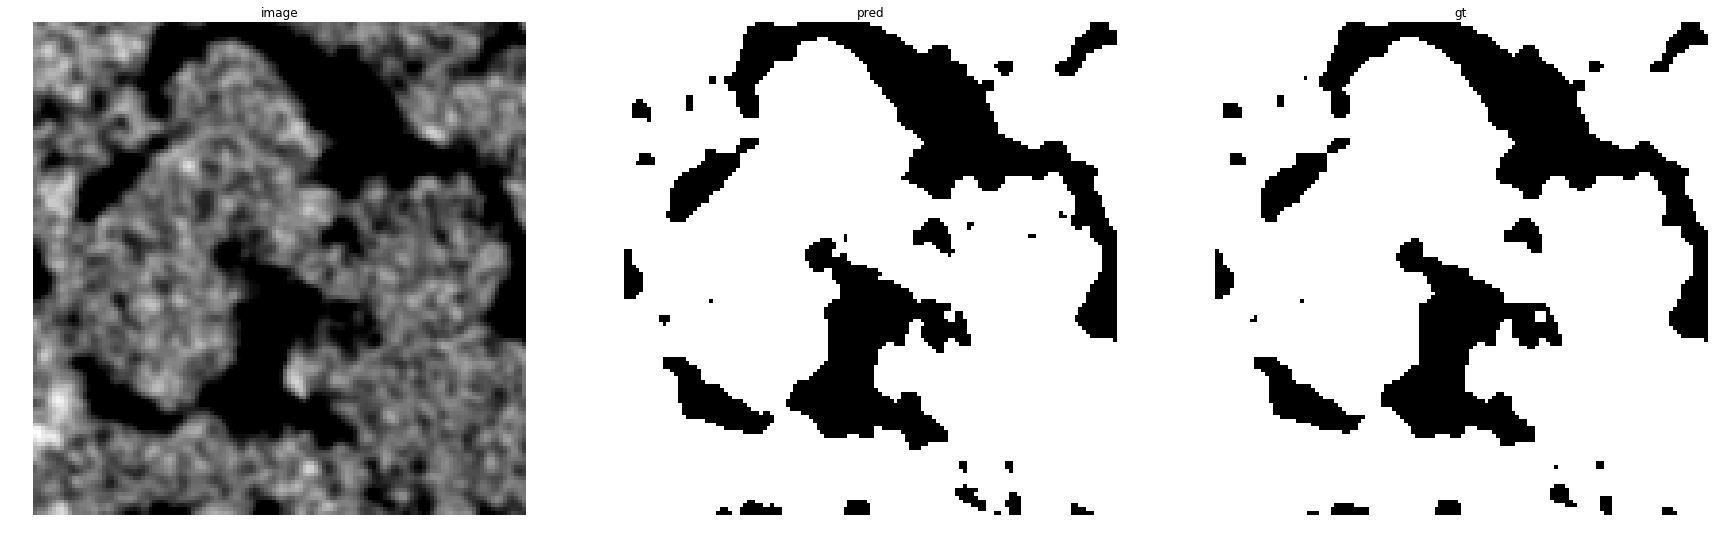

accuracy    : 0.98468017578125
precision   : 0.9988888006984681
recall      : 0.9815161441272813
f1          : 0.9901262735533615
pr_auc      : 0.9998999750590292
iou         : 0.9804456216889997


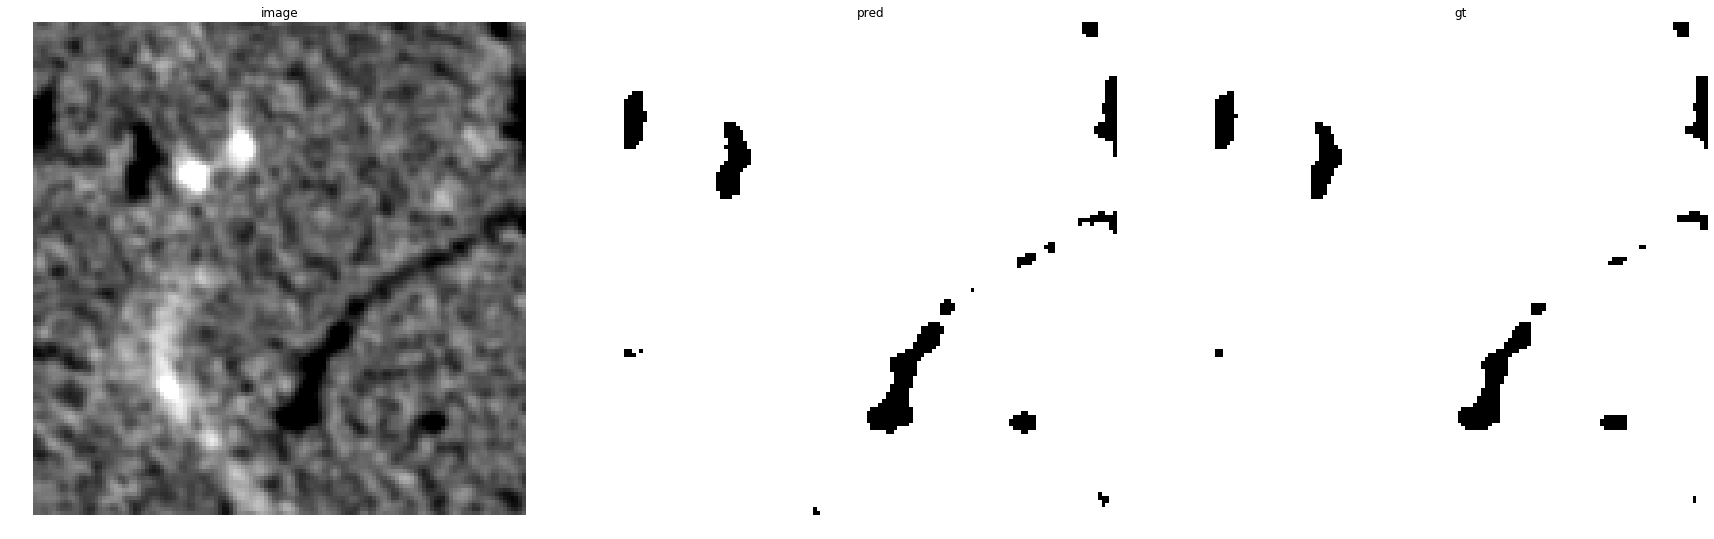

accuracy    : 0.99493408203125
precision   : 0.9997470275739945
recall      : 0.995027380877447
f1          : 0.9973816208713209
pr_auc      : 0.9999951436291155
iou         : 0.9947769177521868


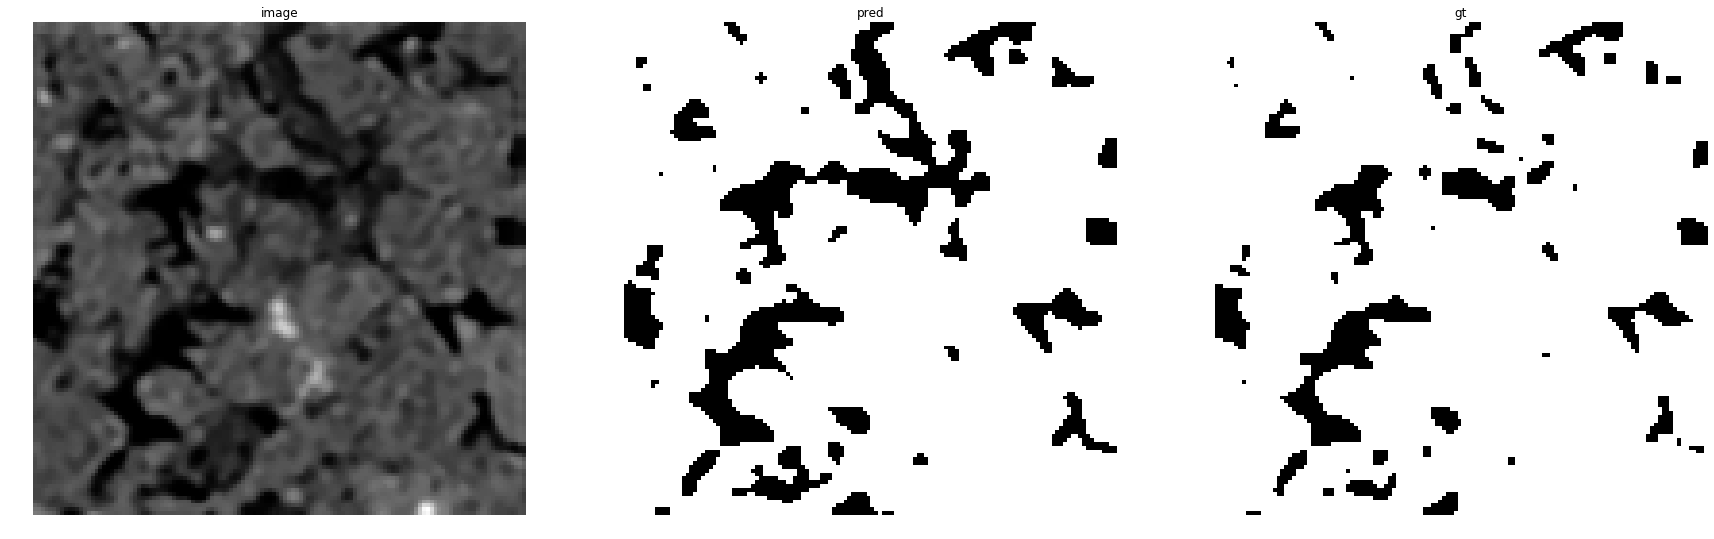

accuracy    : 0.94183349609375
precision   : 1.0
recall      : 0.935002046105579
f1          : 0.96640936167213
pr_auc      : 0.9997824950521805
iou         : 0.935002046105579


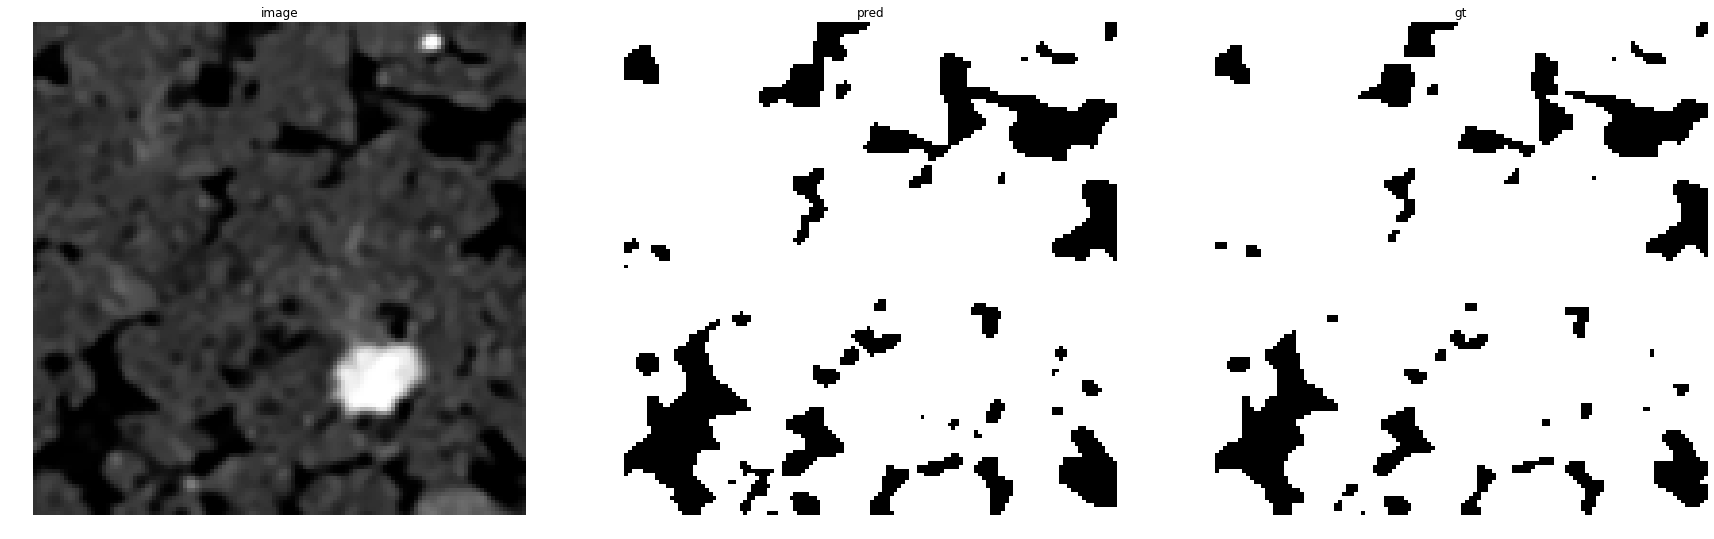

accuracy    : 0.96527099609375
precision   : 1.0
recall      : 0.9596425278388538
f1          : 0.9794056969126642
pr_auc      : 0.9999371200703902
iou         : 0.9596425278388538


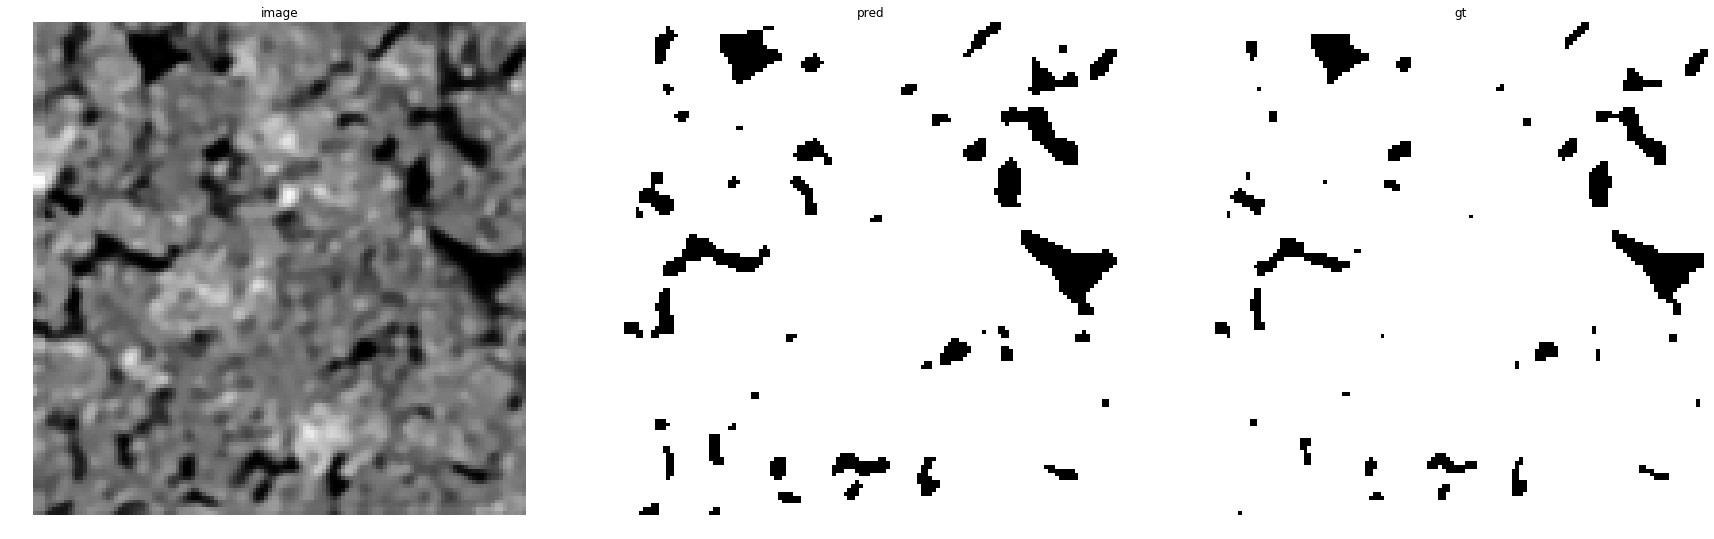

accuracy    : 0.970458984375
precision   : 1.0
recall      : 0.9686832740213523
f1          : 0.9840925524222705
pr_auc      : 0.9999612934779092
iou         : 0.9686832740213523


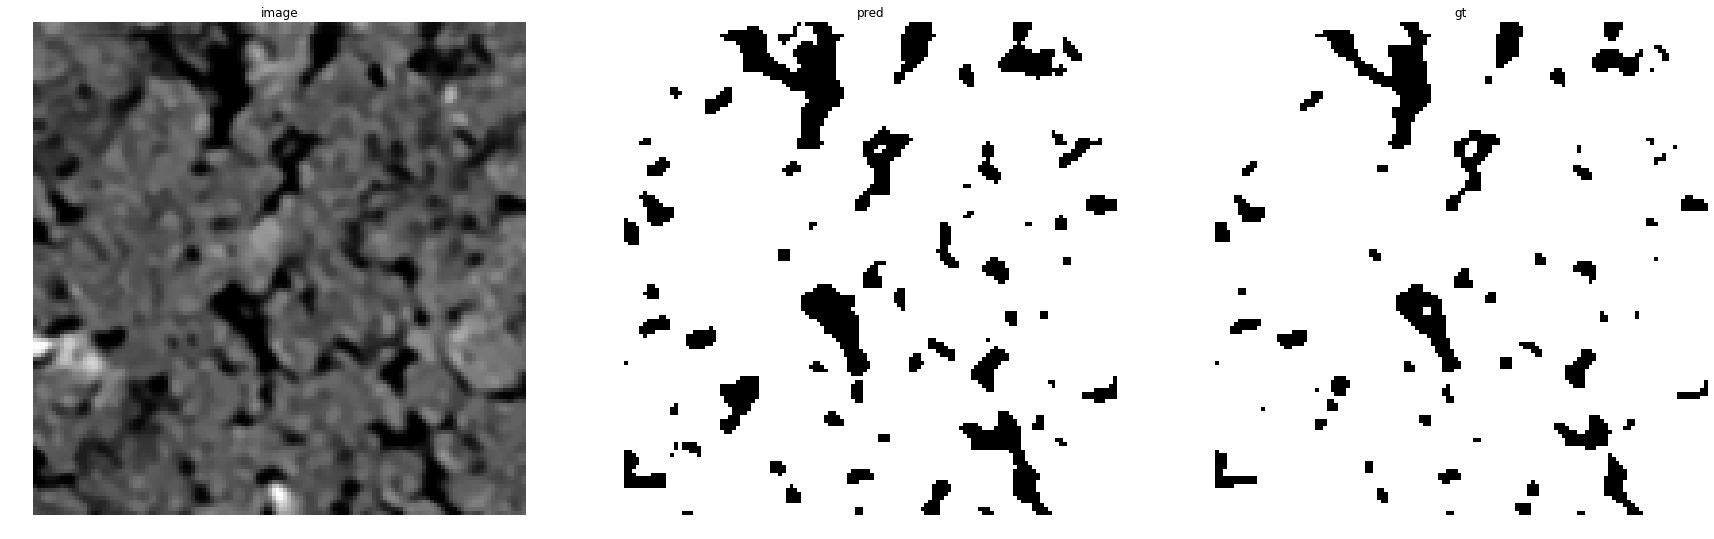

accuracy    : 0.957275390625
precision   : 1.0
recall      : 0.9532741472531874
f1          : 0.9760781901442144
pr_auc      : 0.9998997644673091
iou         : 0.9532741472531874


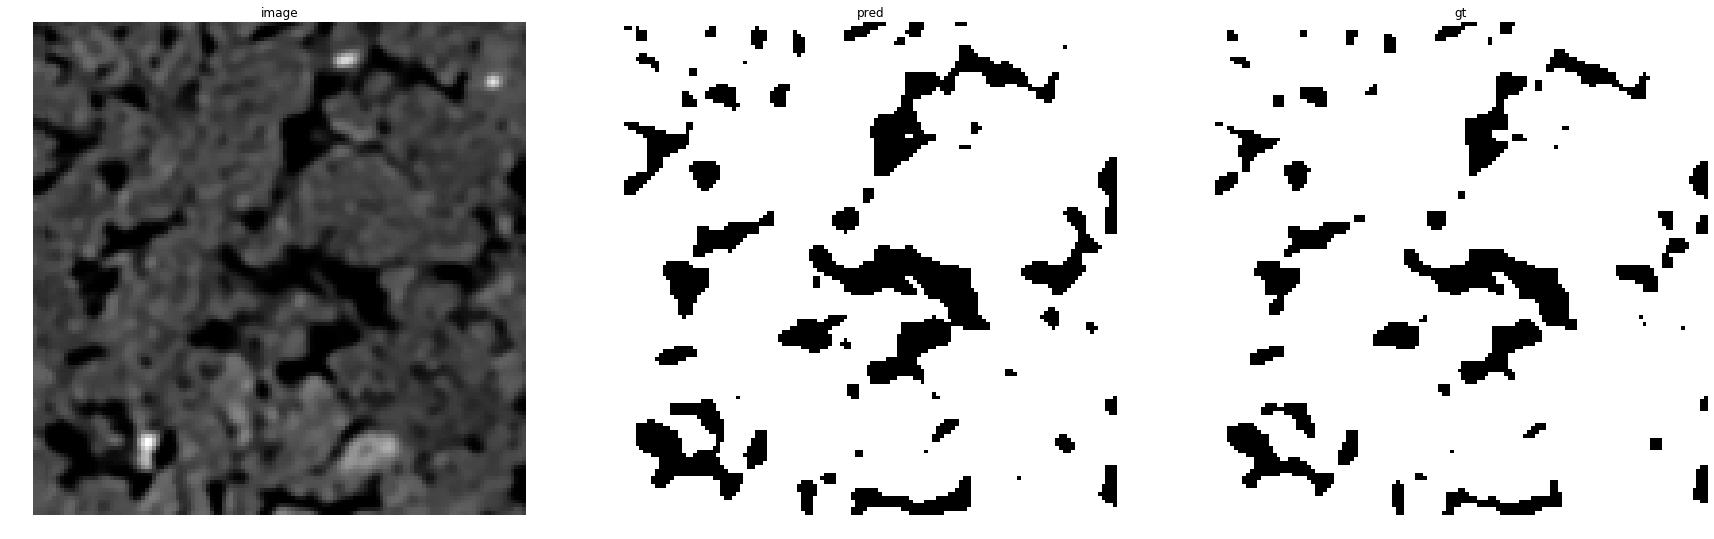

accuracy    : 0.95721435546875
precision   : 1.0
recall      : 0.9512110244988864
f1          : 0.9749955412876762
pr_auc      : 0.9998922395479611
iou         : 0.9512110244988864


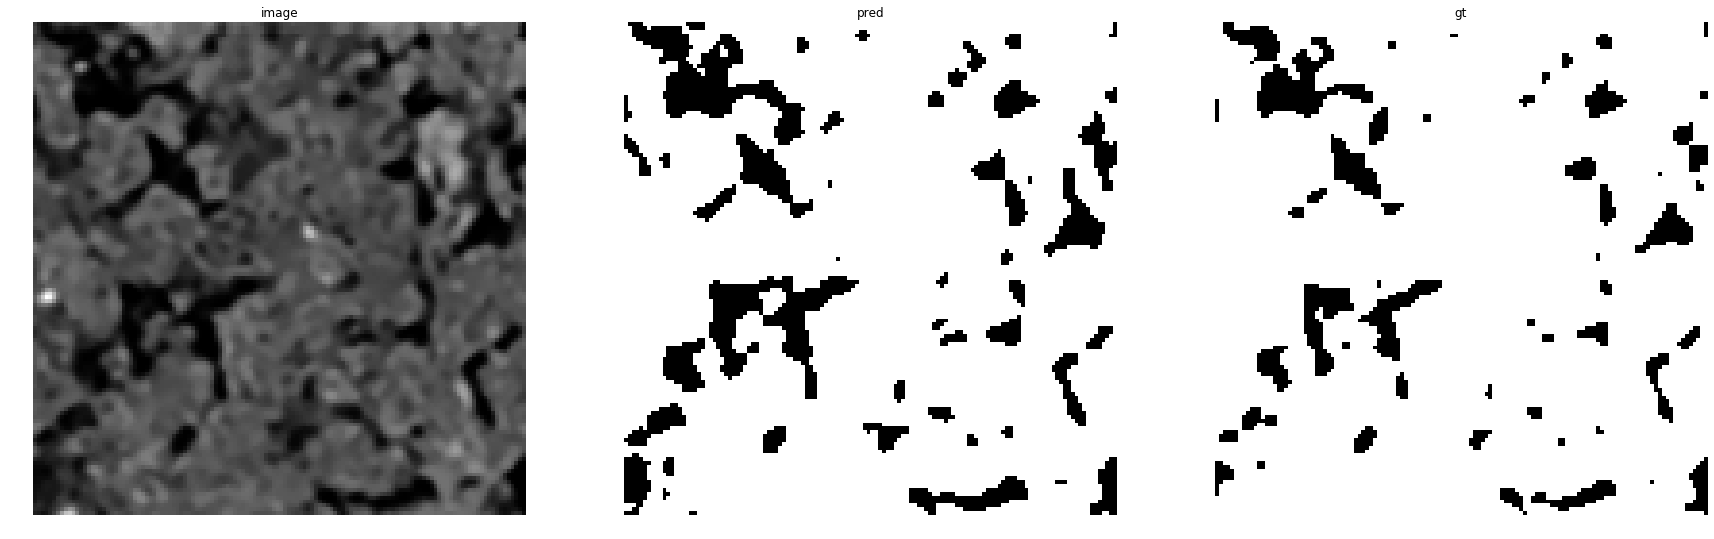

accuracy    : 0.94659423828125
precision   : 1.0
recall      : 0.940500475996192
f1          : 0.9693380523530856
pr_auc      : 0.9998579631776168
iou         : 0.940500475996192


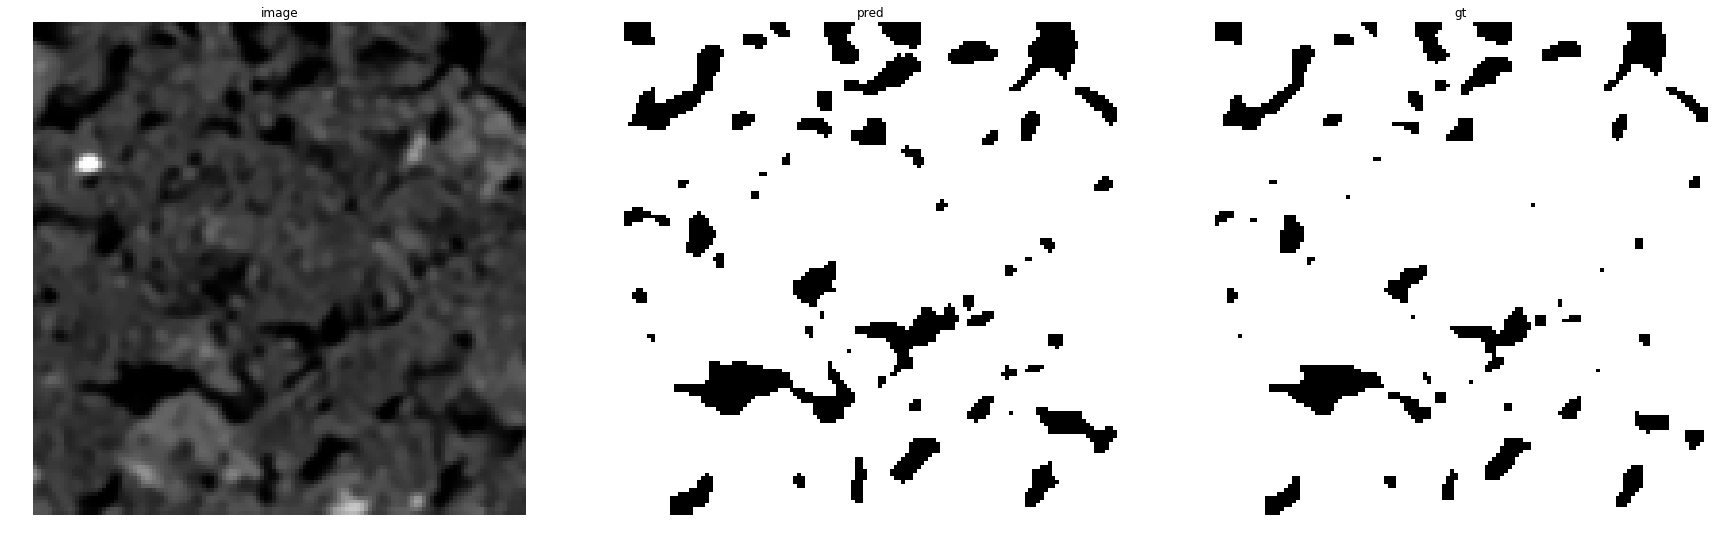

accuracy    : 0.96160888671875
precision   : 1.0
recall      : 0.957717128260285
f1          : 0.9784019503485217
pr_auc      : 0.9999001908437347
iou         : 0.957717128260285


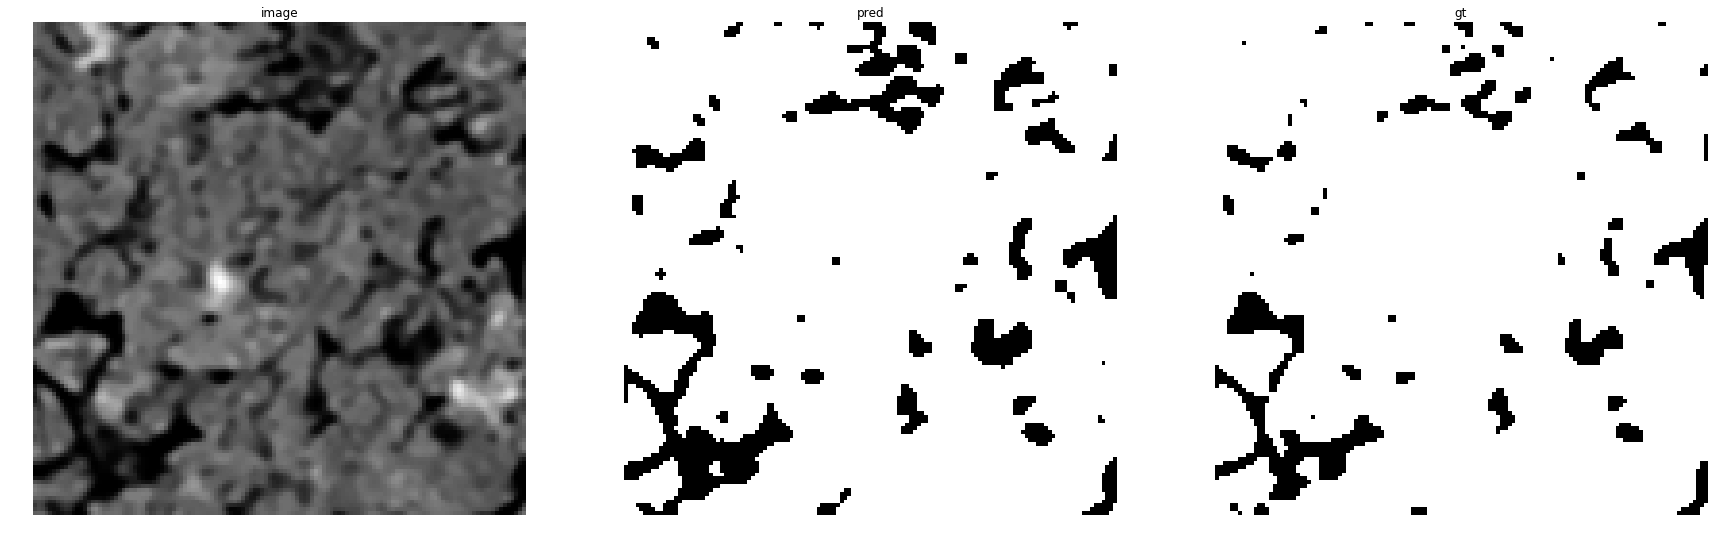

accuracy    : 0.95806884765625
precision   : 1.0
recall      : 0.953877139979859
f1          : 0.9763941861663745
pr_auc      : 0.9998462336946041
iou         : 0.953877139979859


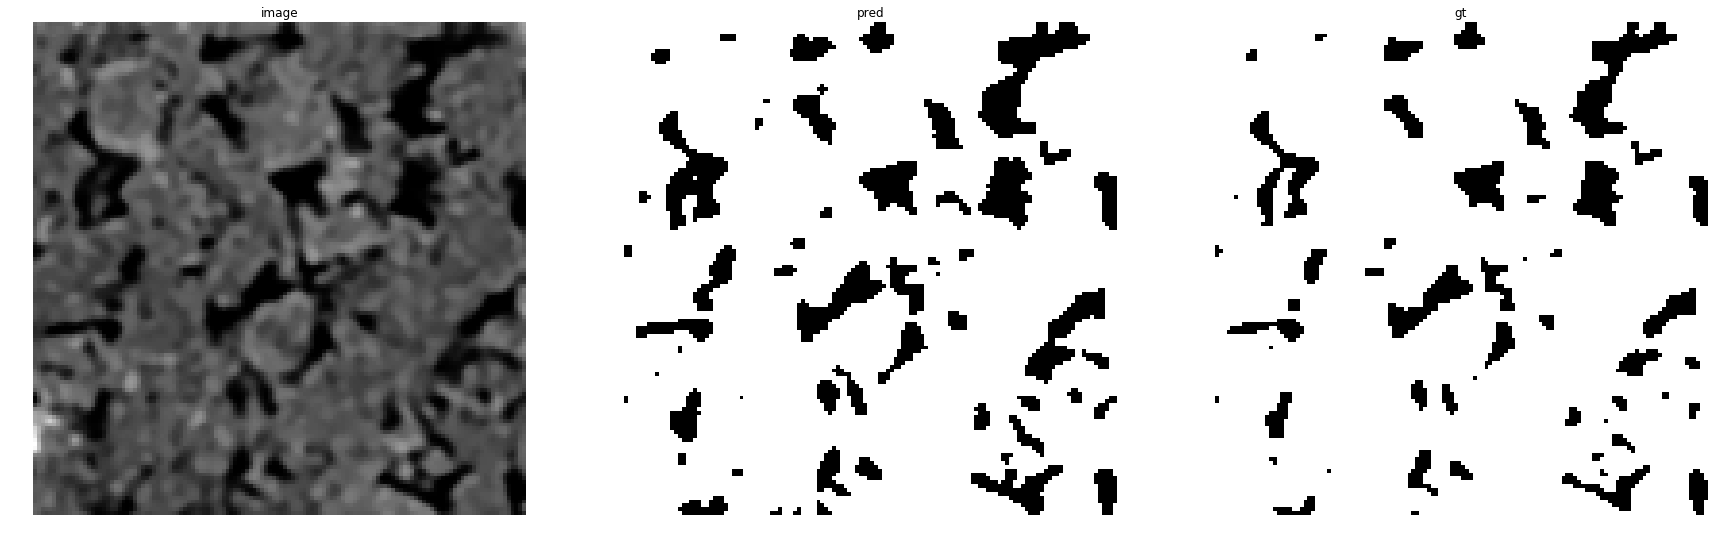

accuracy    : 0.9564208984375
precision   : 1.0
recall      : 0.9507416350465678
f1          : 0.9747489036638846
pr_auc      : 0.9998931222949297
iou         : 0.9507416350465678


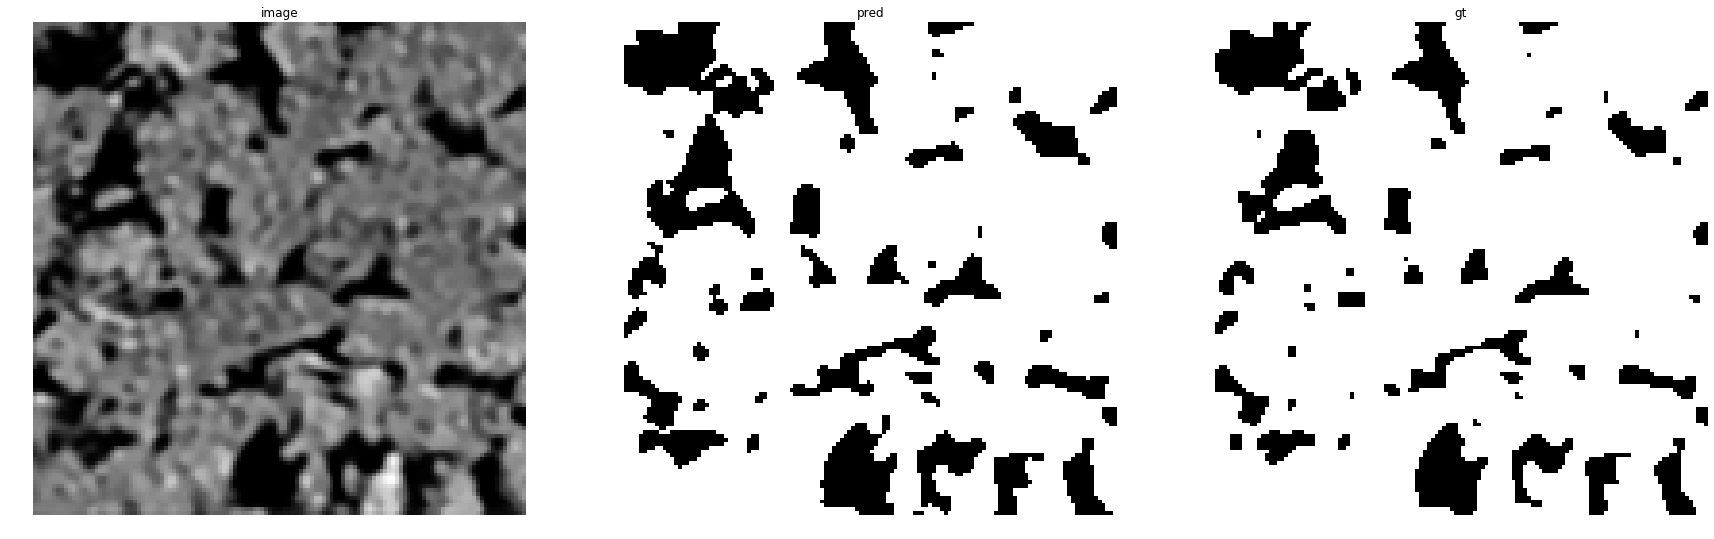

accuracy    : 0.95269775390625
precision   : 1.0
recall      : 0.9434554209835109
f1          : 0.9709051319593047
pr_auc      : 0.999855328415699
iou         : 0.9434554209835109


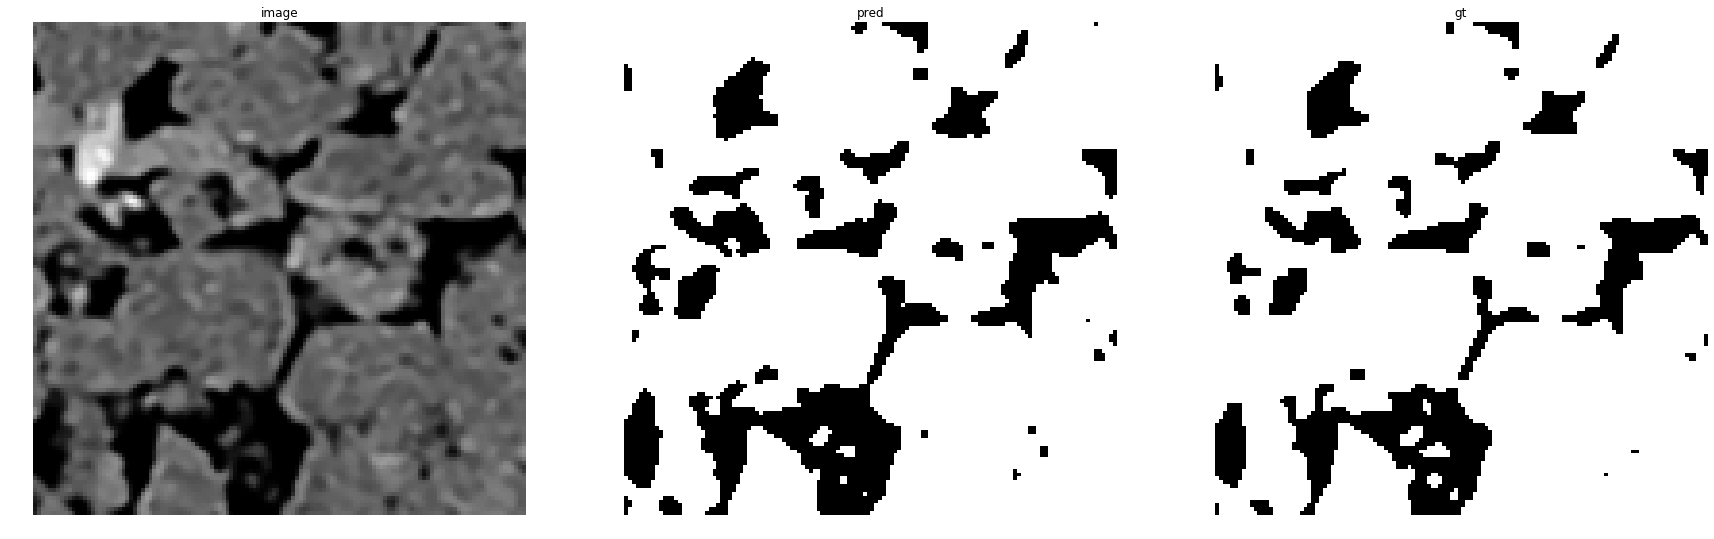

accuracy    : 0.9647216796875
precision   : 1.0
recall      : 0.9577361801696402
f1          : 0.97841189213416
pr_auc      : 0.9998943135840312
iou         : 0.9577361801696402


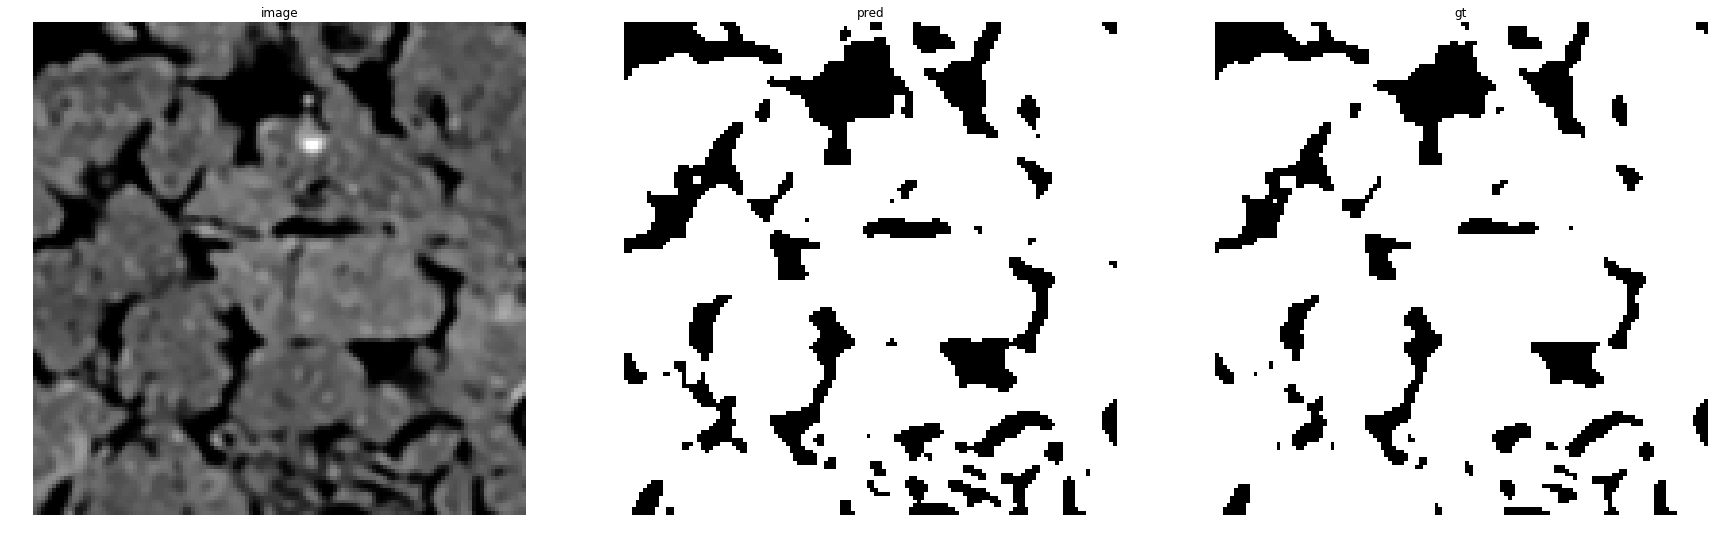

accuracy    : 0.95843505859375
precision   : 1.0
recall      : 0.9508409730744243
f1          : 0.9748011100832562
pr_auc      : 0.9998584158853585
iou         : 0.9508409730744243


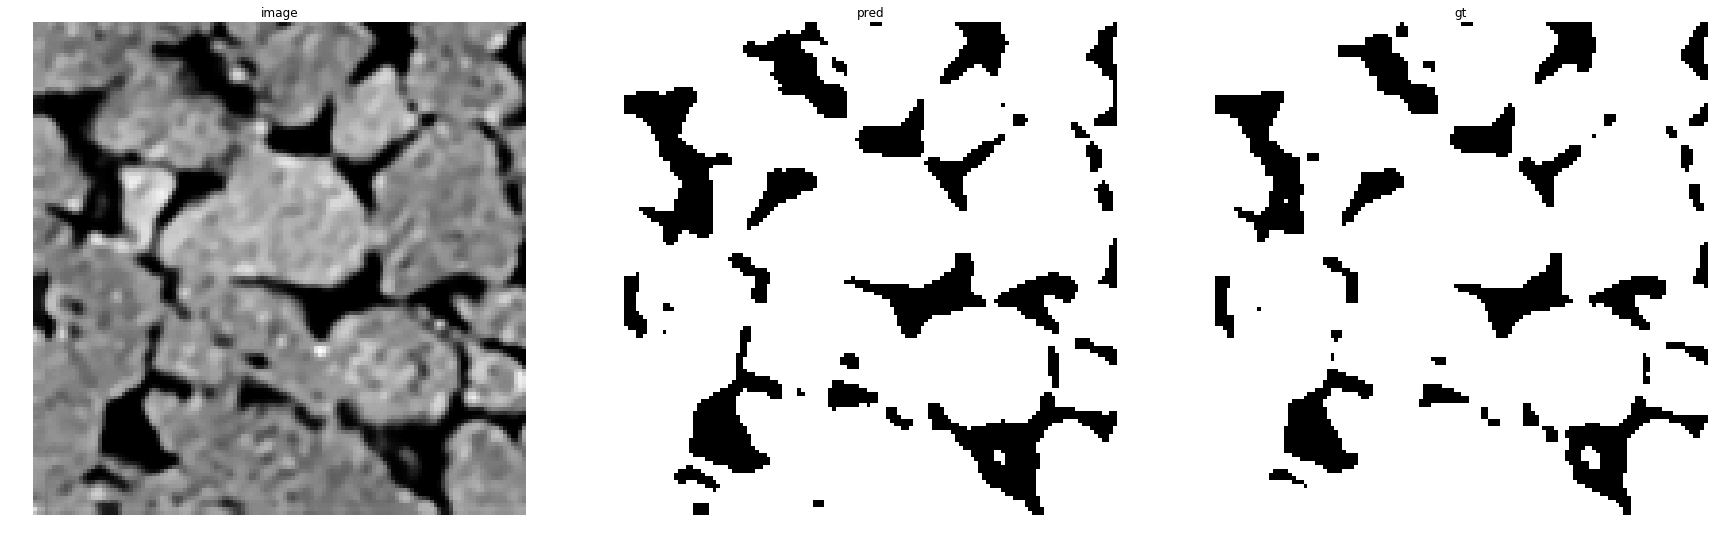

accuracy    : 0.96319580078125
precision   : 0.9999244142101285
recall      : 0.9564745860747595
f1          : 0.9777170097187834
pr_auc      : 0.9998772042830815
iou         : 0.9564054366685946


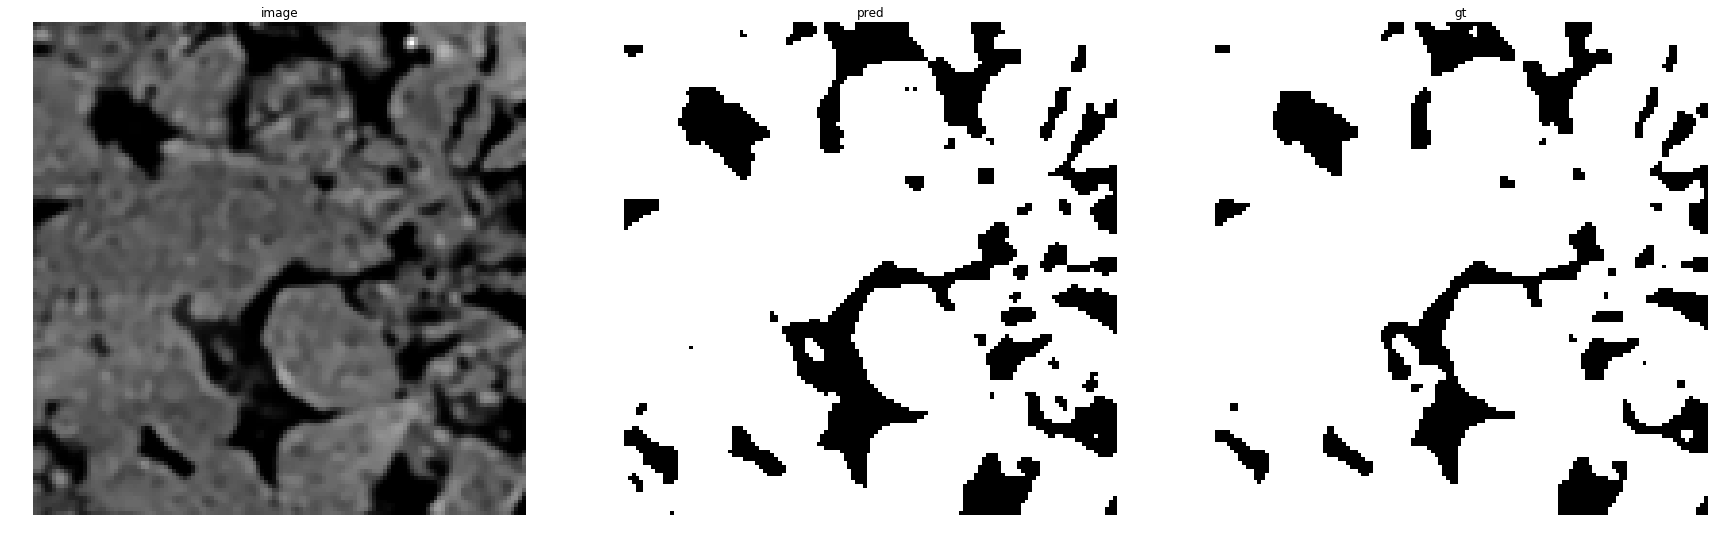

accuracy    : 0.95709228515625
precision   : 1.0
recall      : 0.949083798073441
f1          : 0.9738768533313515
pr_auc      : 0.9997691035926233
iou         : 0.949083798073441


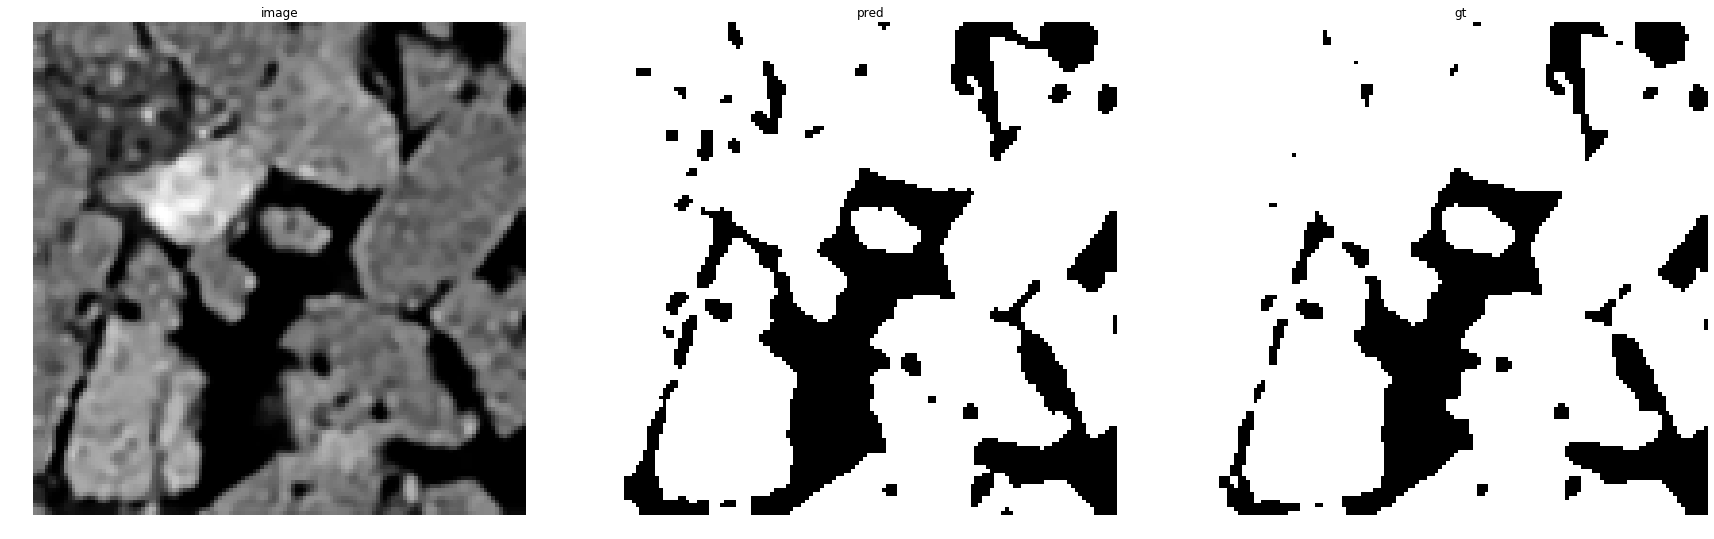

accuracy    : 0.9566650390625
precision   : 1.0
recall      : 0.9453383632304257
f1          : 0.9719012189330378
pr_auc      : 0.9998252107476799
iou         : 0.9453383632304257


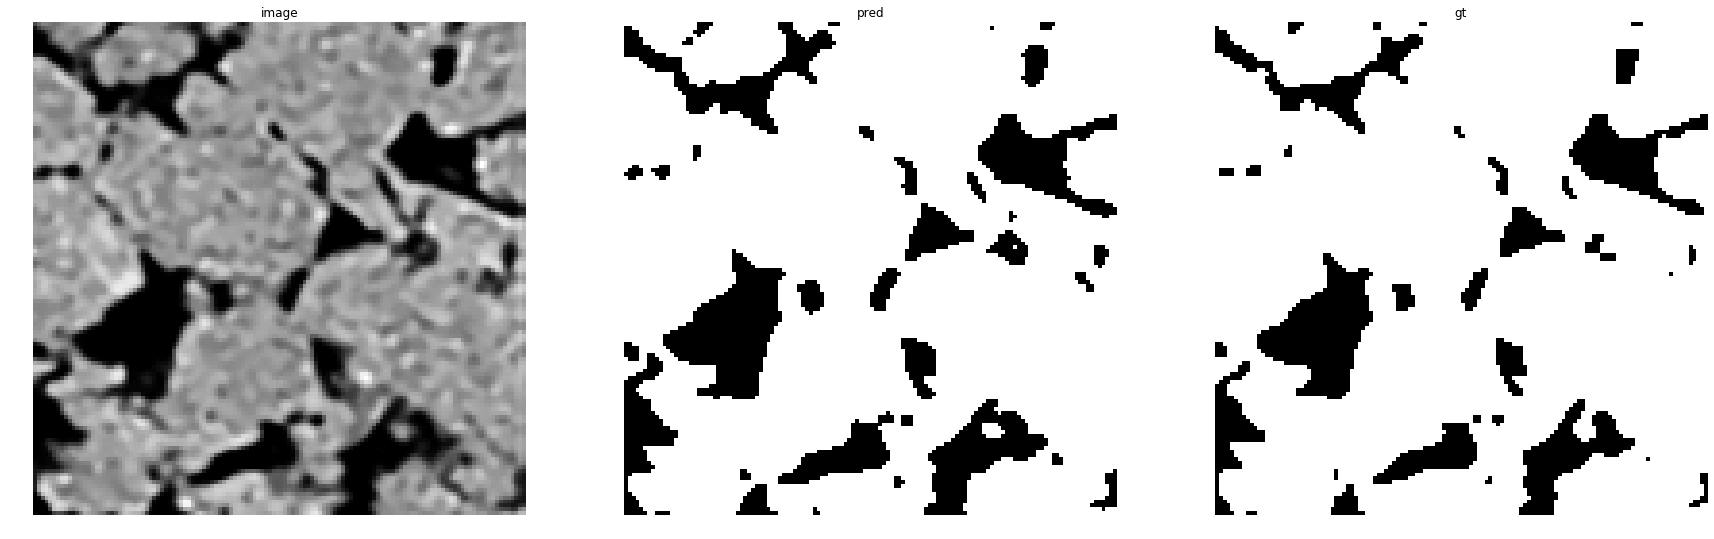

accuracy    : 0.96826171875
precision   : 1.0
recall      : 0.962291515591008
f1          : 0.9807834441980783
pr_auc      : 0.9999117712129085
iou         : 0.962291515591008


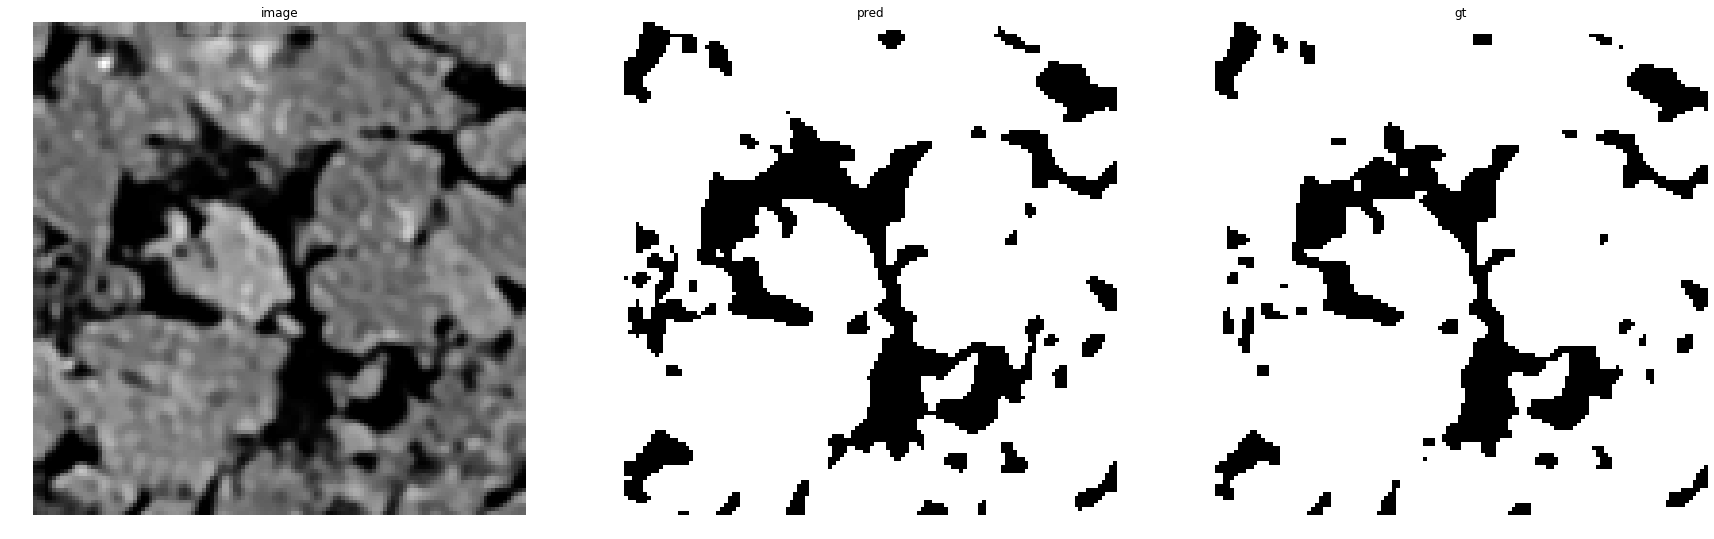

accuracy    : 0.95477294921875
precision   : 1.0
recall      : 0.9454103433033741
f1          : 0.9719392585299353
pr_auc      : 0.9997778438297886
iou         : 0.9454103433033741


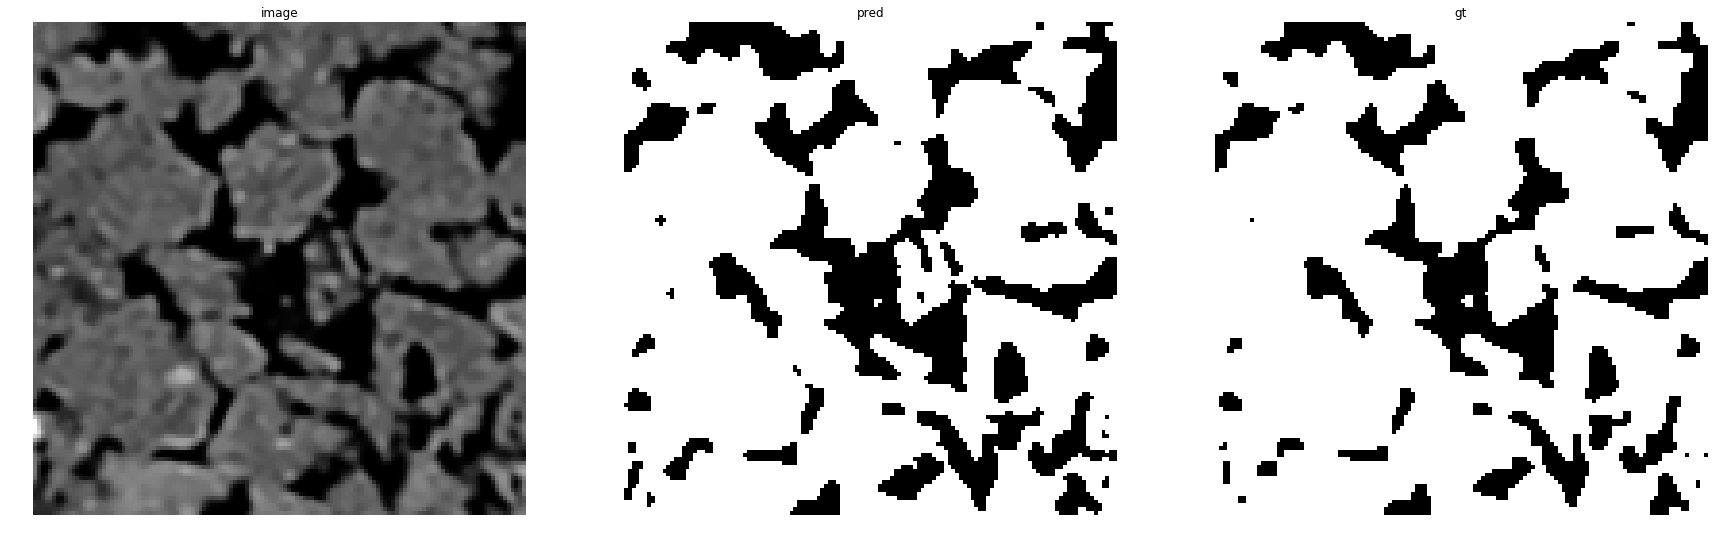

accuracy    : 0.95281982421875
precision   : 1.0
recall      : 0.9398677557370673
f1          : 0.9690018847495689
pr_auc      : 0.999800411809664
iou         : 0.9398677557370673


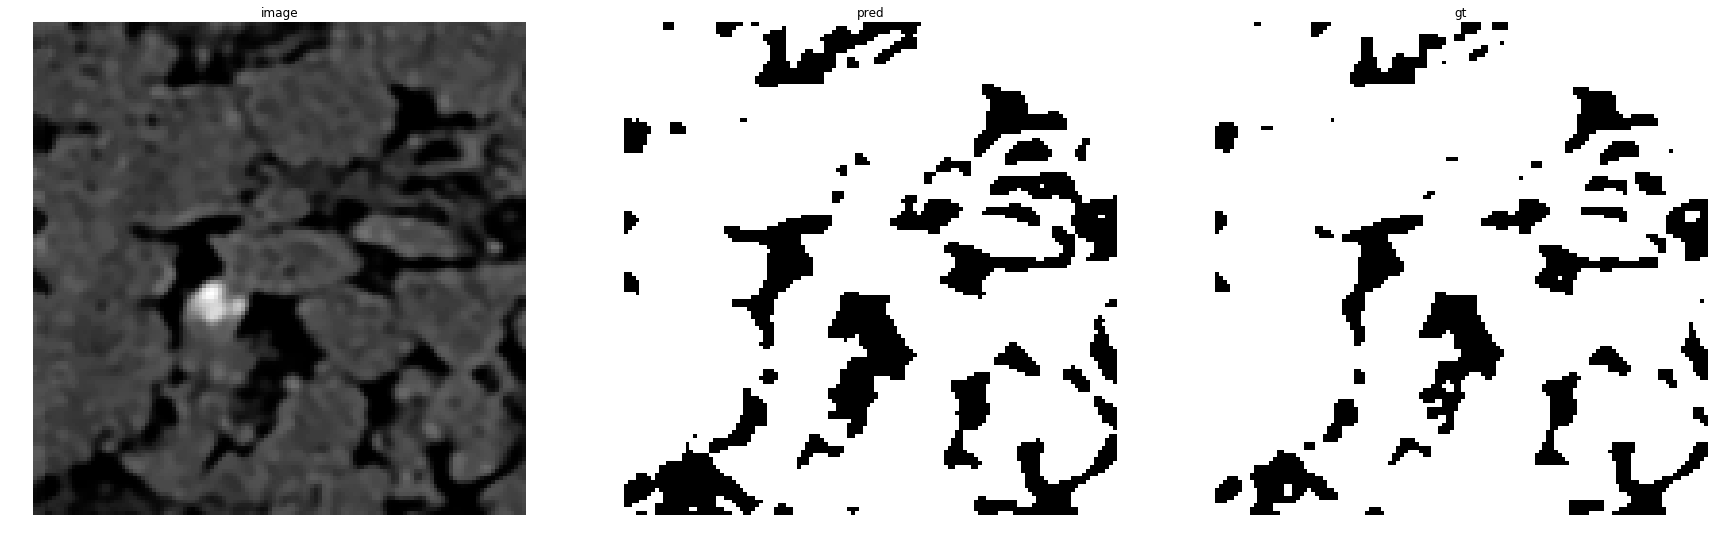

accuracy    : 0.94781494140625
precision   : 1.0
recall      : 0.9385775862068966
f1          : 0.9683157309616454
pr_auc      : 0.9996742164006247
iou         : 0.9385775862068966


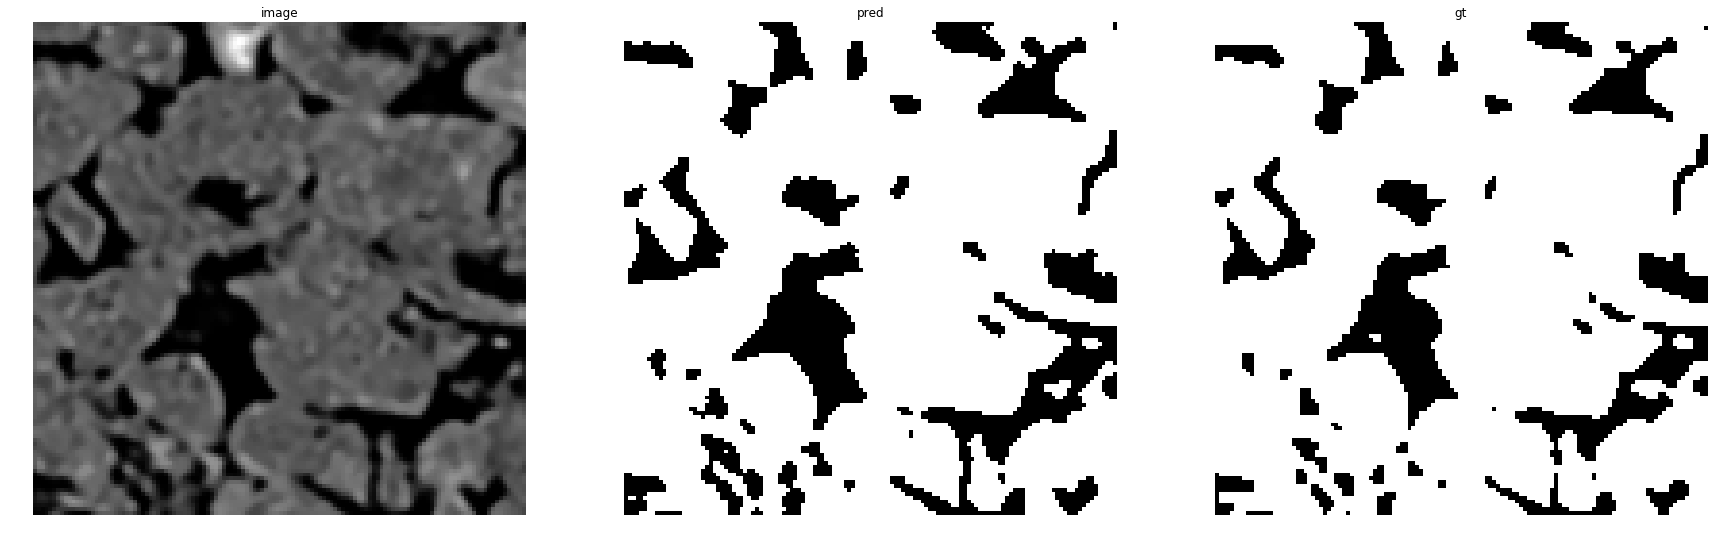

accuracy    : 0.9619140625
precision   : 1.0
recall      : 0.9535576064304853
f1          : 0.9762267601341054
pr_auc      : 0.9998775762792457
iou         : 0.9535576064304853


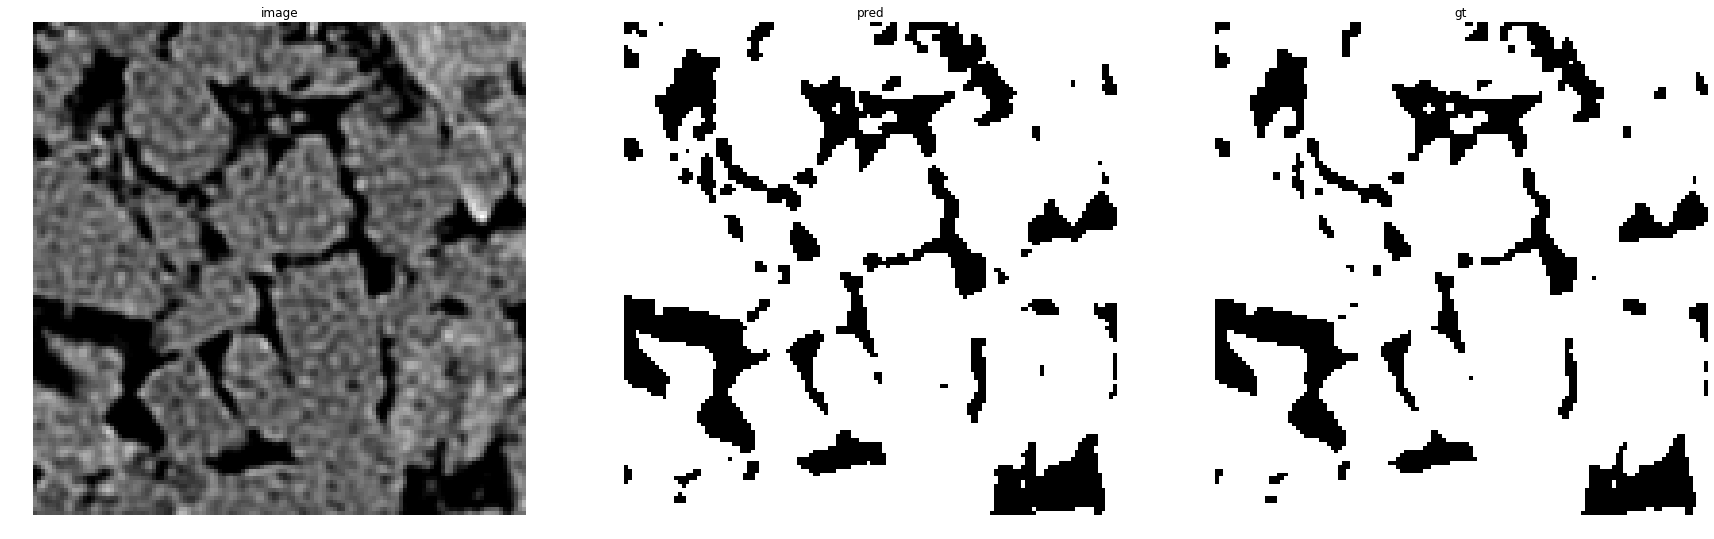

accuracy    : 0.9661865234375
precision   : 0.9987696093509689
recall      : 0.9602247523288482
f1          : 0.9791179796456841
pr_auc      : 0.9996338088609372
iou         : 0.9590902377787623


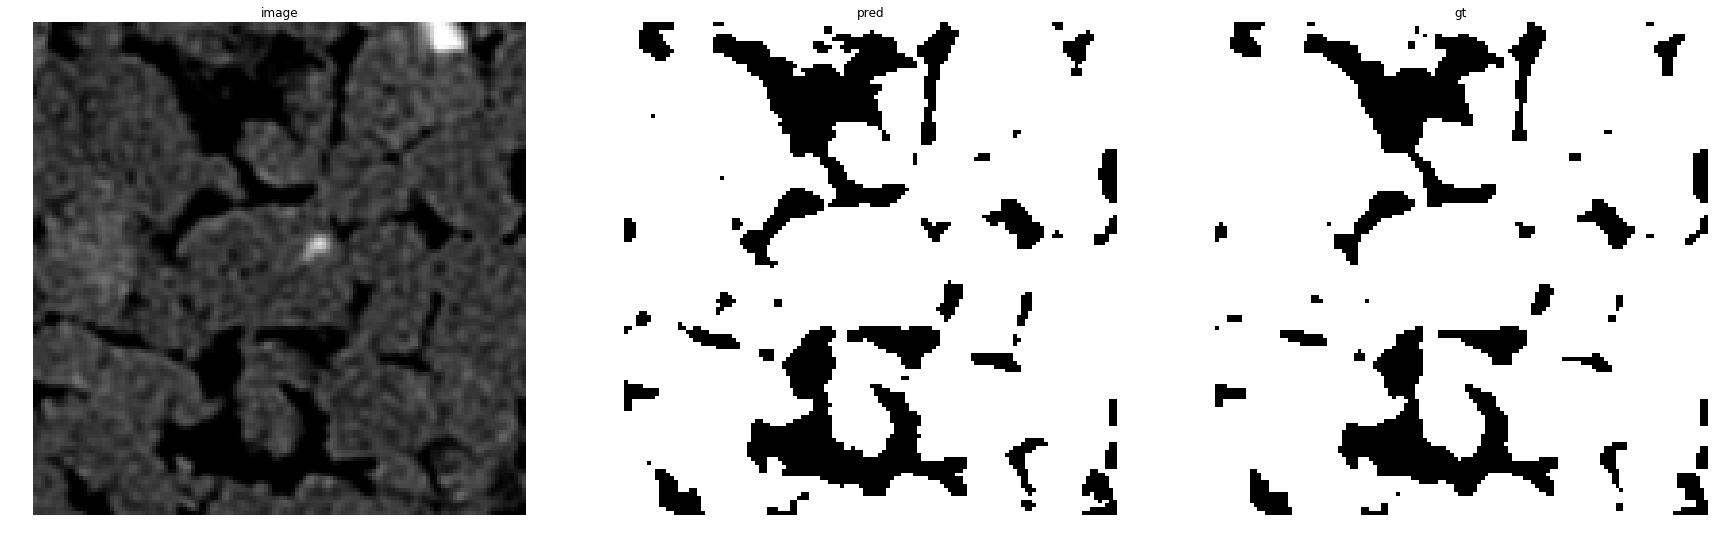

accuracy    : 0.97003173828125
precision   : 0.9990942712657559
recall      : 0.9650772820064158
f1          : 0.9817912108288521
pr_auc      : 0.9997775932433295
iou         : 0.964233682983683


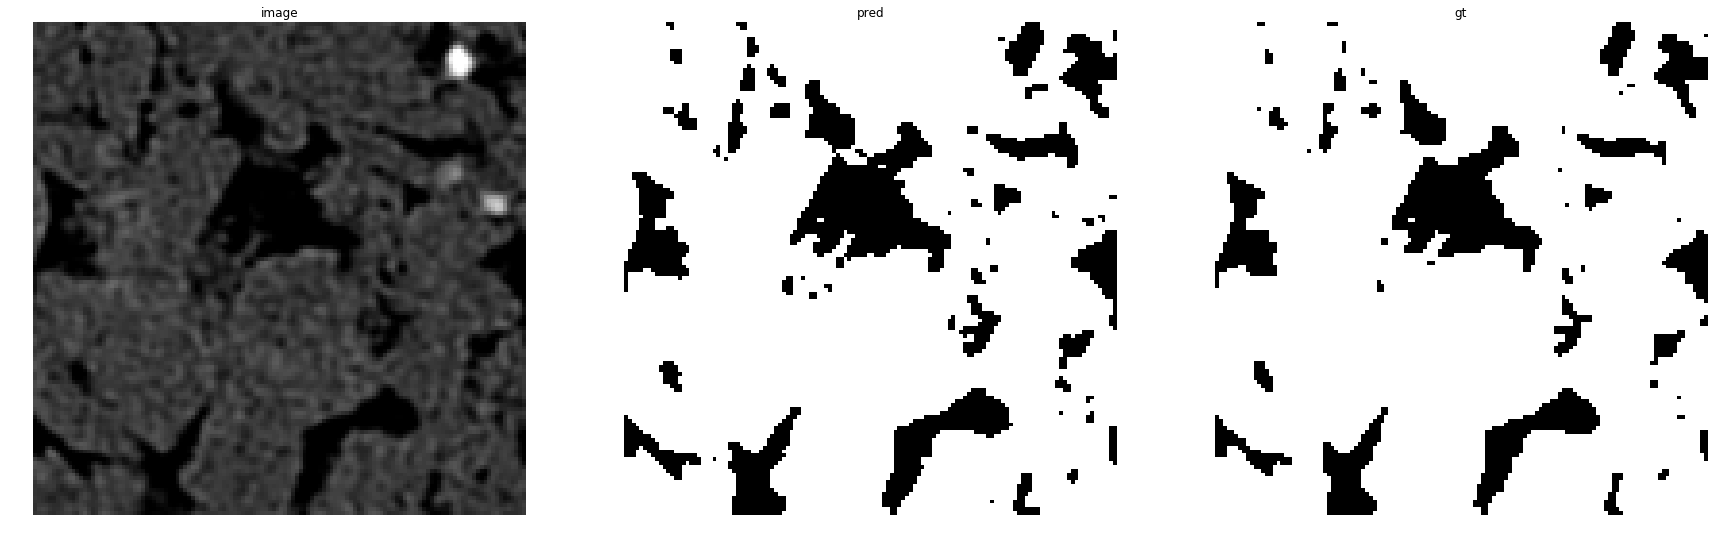

accuracy    : 0.97039794921875
precision   : 0.9996273384512186
recall      : 0.9654477397063058
f1          : 0.9822402870848438
pr_auc      : 0.9997960965716792
iou         : 0.9651003813772757


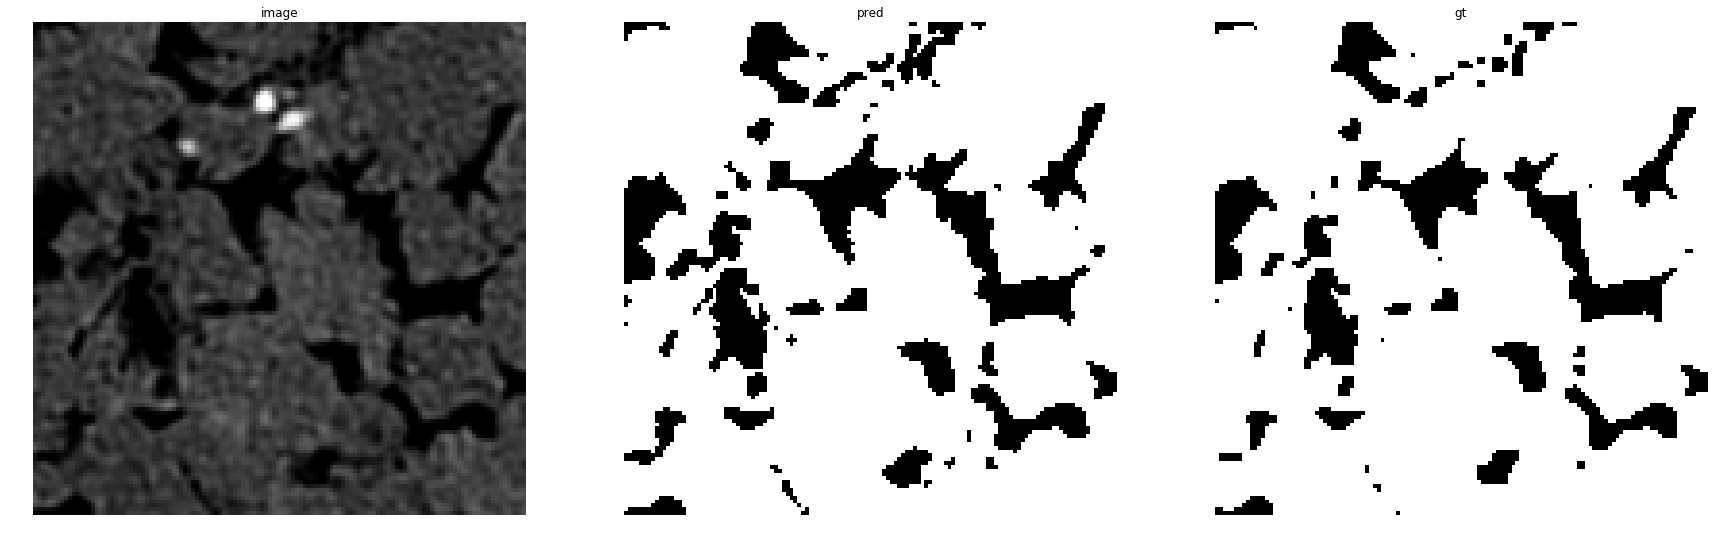

accuracy    : 0.964111328125
precision   : 0.9995472381527316
recall      : 0.9579114839456175
f1          : 0.9782865583456425
pr_auc      : 0.9997379271071649
iou         : 0.9574960242879861


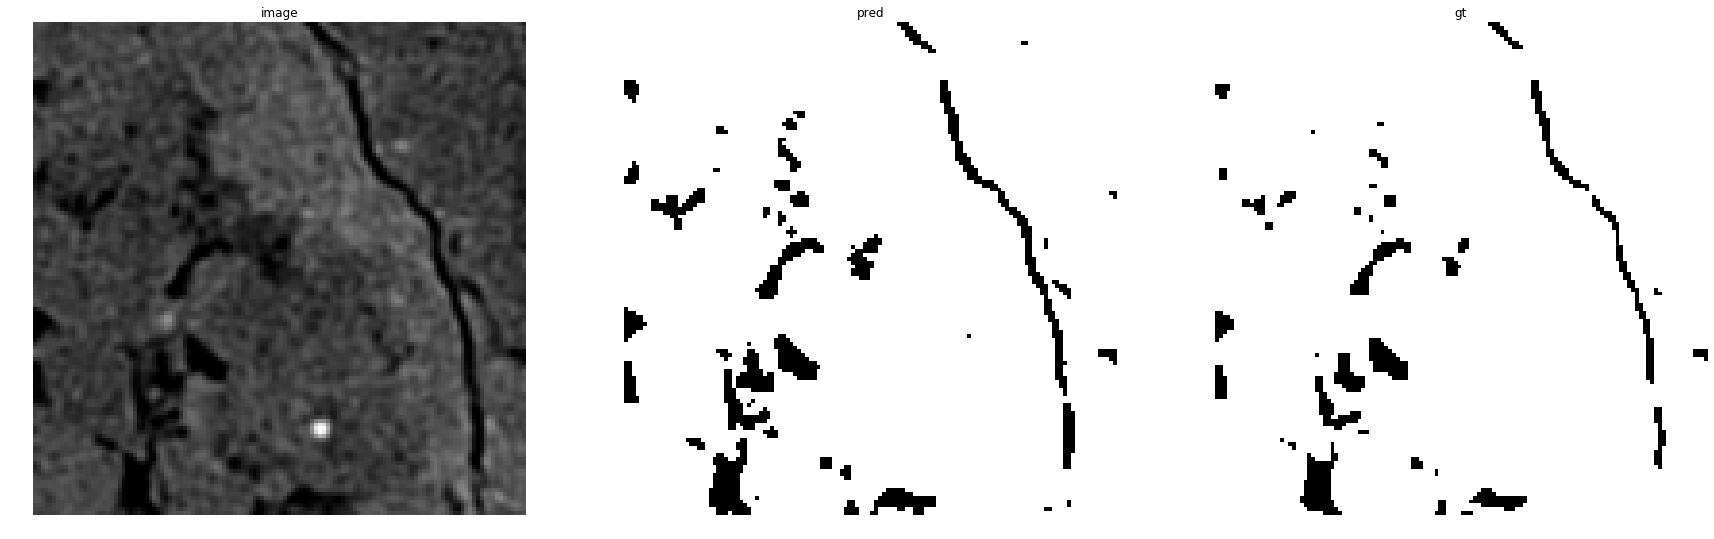

accuracy    : 0.97772216796875
precision   : 0.999802865028256
recall      : 0.9767606085895872
f1          : 0.9881474265302809
pr_auc      : 0.999942879106126
iou         : 0.9765725288831836


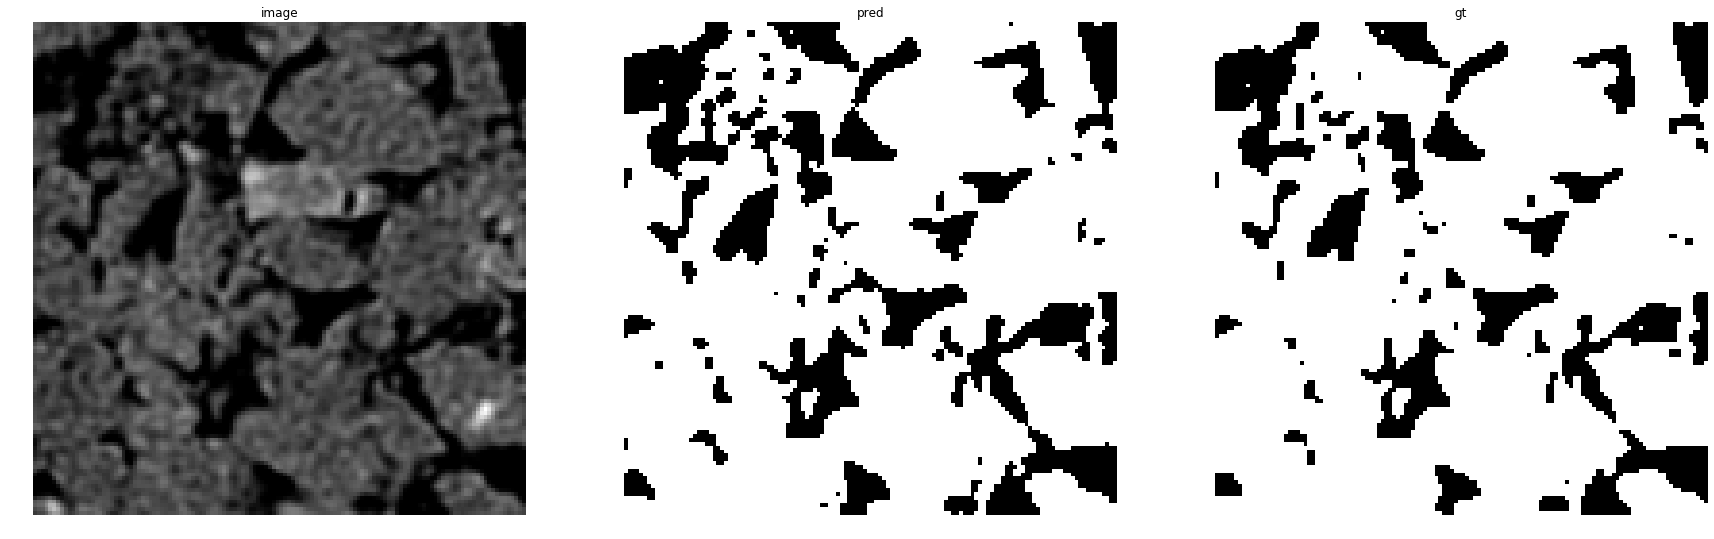

accuracy    : 0.95611572265625
precision   : 0.9992727272727273
recall      : 0.9457020495564393
f1          : 0.9717496365565205
pr_auc      : 0.9995365396794604
iou         : 0.9450515857852503


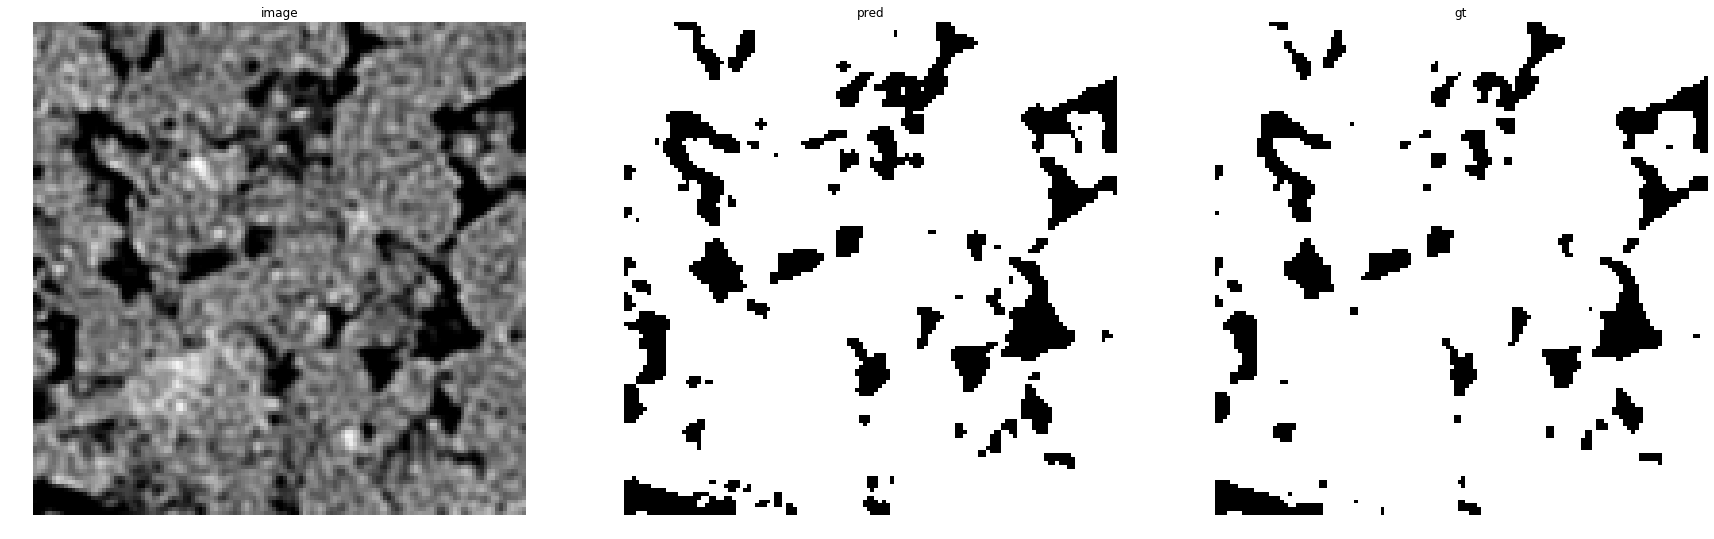

accuracy    : 0.9627685546875
precision   : 0.999563191613279
recall      : 0.9578624250034882
f1          : 0.9782686141788386
pr_auc      : 0.9997305985020146
iou         : 0.9574616457461645


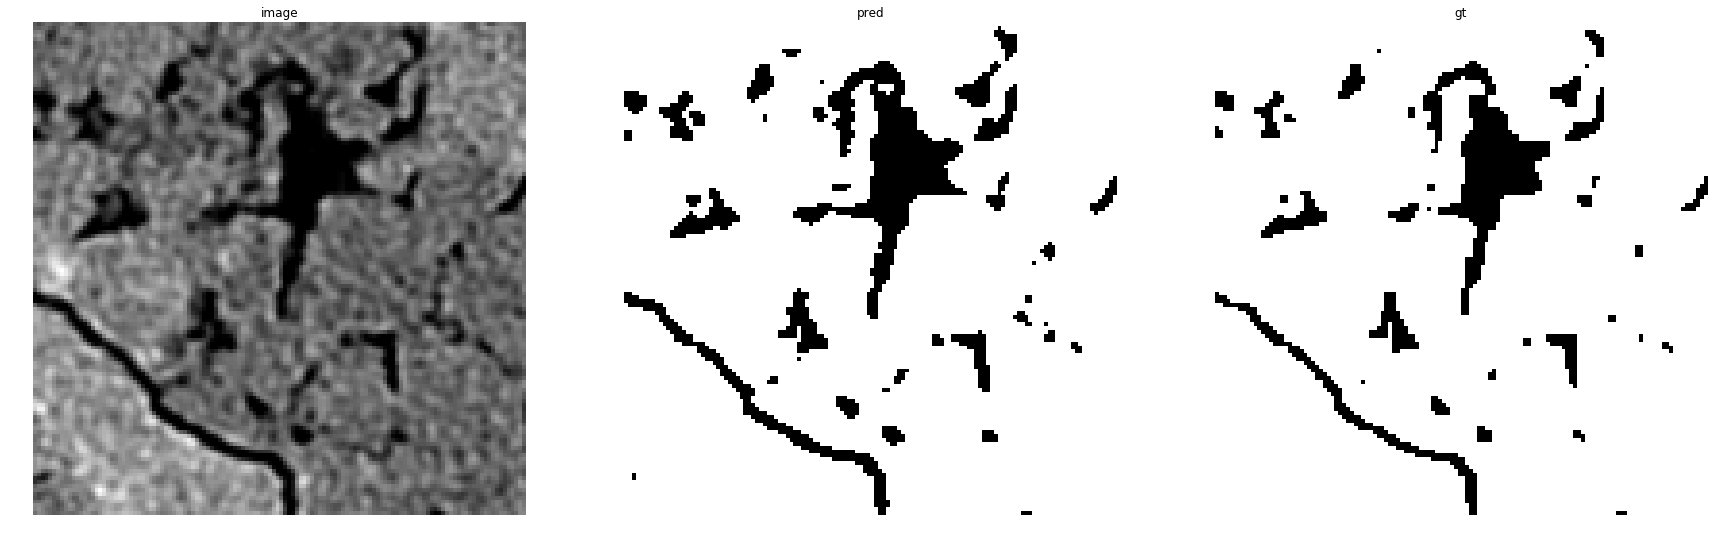

accuracy    : 0.9747314453125
precision   : 0.9998619737750173
recall      : 0.9723489932885906
f1          : 0.9859135760462743
pr_auc      : 0.9999228921598662
iou         : 0.9722184941618575


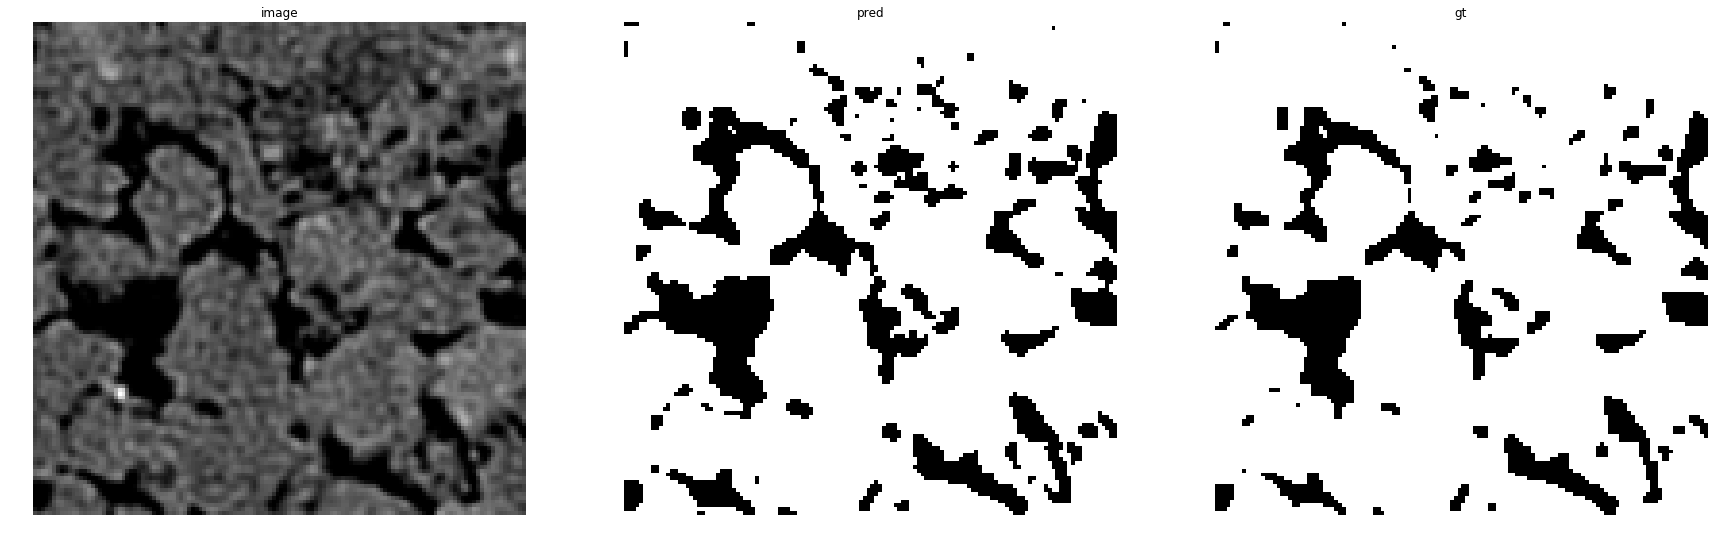

accuracy    : 0.95782470703125
precision   : 0.999923424458228
recall      : 0.9498108815827757
f1          : 0.9742231506696013
pr_auc      : 0.9997343870389124
iou         : 0.9497417994035929


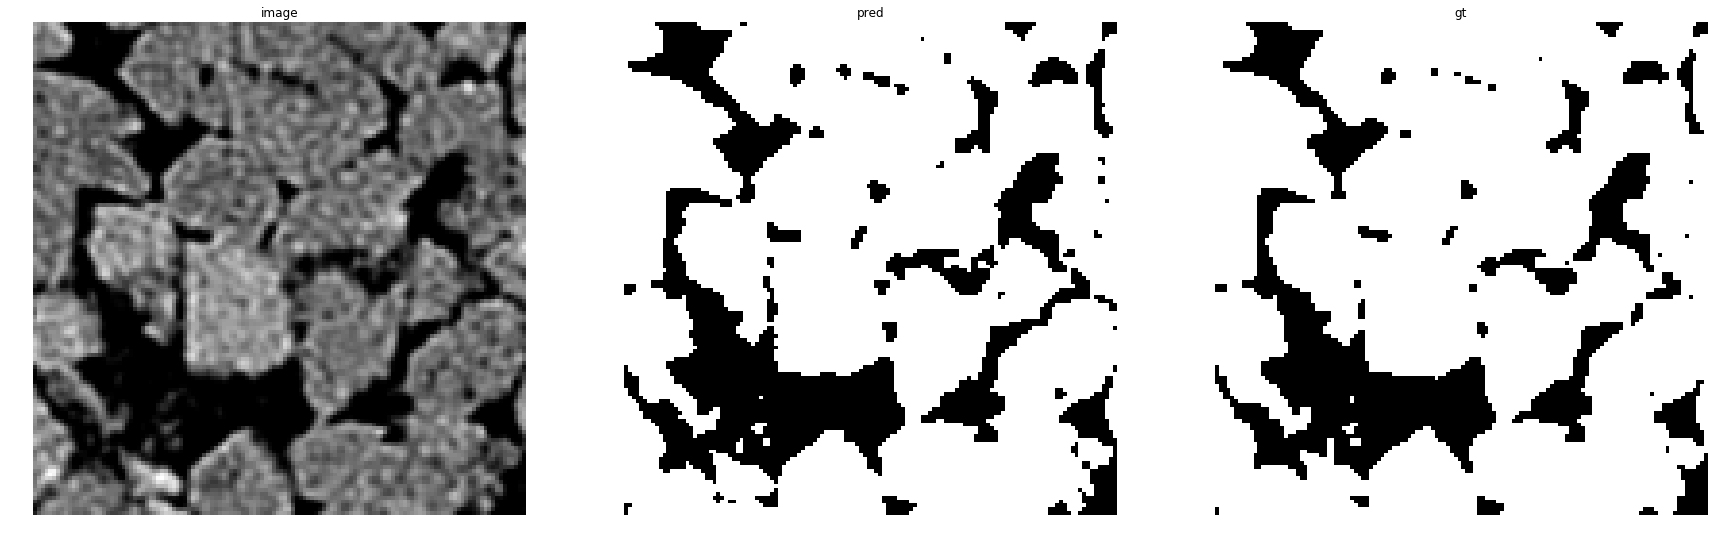

accuracy    : 0.96673583984375
precision   : 0.9986187845303868
recall      : 0.9588111397144863
f1          : 0.9783101842639392
pr_auc      : 0.9995803299693338
iou         : 0.9575412901215332


In [27]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Make prediction for particular stack

In [12]:
stack = Stack.read_from_source('../../data/Urna_34')

700it [00:00, 737.19it/s]
100%|██████████| 700/700 [00:07<00:00, 98.07it/s] 


In [13]:
predicted_stack = stack.apply(model, 
                              patch_sizes=(128, 128, 1), 
                              bs=32, num_workers=8, device='cuda:0',
                              threshold=None)

25200it [00:00, 239559.35it/s]
25200it [02:02, 205.44it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3392.50it/s]


In [14]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                              v((predicted_stack.targets / 255).astype(np.uint8), 
                                predicted_stack.preds, 
                                mode='stack')))

accuracy    : 0.967590
precision   : 0.999487
recall      : 0.962195
f1          : 0.980487
pr_auc      : 0.999774
iou         : 0.961720


In [15]:
predicted_stack.dump('./Urna_34_{}'.format(data_conf['conf_name']), features=False, targets=False, preds=True)

100%|██████████| 700/700 [00:04<00:00, 171.76it/s]
